In [1]:
# indir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/pseudotime_seurat"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/pseudotime_seurat/clones"
#group_branches = ["b1","b3","b4","b7"]

indir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04_no_ChA1/data/annotation/gff_A2/mergedSamples/pseudotime/"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04_no_ChA1/data/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/clone_lineage/figure4/pseudotime_seurat/clones"
group_branches = ["b1","b2","b3","b5","b6", "b7","b8", "b11","b12", "b14"]

## set group of branches

In [2]:
import pandas as pd
from os.path import join, dirname

import seaborn as sns
import matplotlib.pyplot as plt

import joypy
from matplotlib import cm

colormap=cm.autumn_r

In [3]:
import numpy as np
from scipy.stats import entropy

In [4]:
cells_meta = pd.read_csv(join(indir, "cells_meta_branchID.tsv"), sep="\t")
cells_meta

orig.ident  nCount_ATAC  nFeature_ATAC  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1      Flt3l       5127.0         5127.0   
cd34norm_Flt3l_AAACGAAAGCGATACG-1        NaN          NaN            NaN   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1        NaN          NaN            NaN   
cd34norm_Flt3l_AAACGAAAGTACAACA-1      Flt3l       1510.0         1510.0   
cd34norm_Flt3l_AAACGAACAACGTACT-1      Flt3l       3199.0         3199.0   
...                                      ...          ...            ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1       Input       6820.0         6820.0   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1       Input       1873.0         1873.0   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1       Input       2998.0         2998.0   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1       Input       8433.0         8433.0   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1         NaN          NaN            NaN   

                                     total  duplicate  chimeric  unmapped  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1  25798.0     3956.0     111.0      95.0   
cd34norm_Flt3l_AAACGAAAGCGATACG-1      NaN        NaN       NaN       NaN   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1      NaN        NaN       NaN       NaN   
cd34norm_Flt3l_AAACGAAAGTACAACA-1  12018.0     1524.0      60.0      45.0   
cd34norm_Flt3l_AAACGAACAACGTACT-1  37690.0     3034.0      82.0     125.0   
...                                    ...        ...       ...       ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1   35511.0     7946.0     148.0     118.0   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1   14217.0     2190.0      42.0      40.0   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1   15165.0     2707.0      67.0      52.0   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1   48687.0    14365.0     242.0     206.0   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1       NaN        NaN       NaN       NaN   

                                   lowmapq  mitochondrial  passed_filters  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1   1643.0         4740.0         15253.0   
cd34norm_Flt3l_AAACGAAAGCGATACG-1      NaN            NaN             NaN   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1      NaN            NaN             NaN   
cd34norm_Flt3l_AAACGAAAGTACAACA-1    585.0         5688.0          4116.0   
cd34norm_Flt3l_AAACGAACAACGTACT-1   1680.0        24974.0          7795.0   
...                                    ...            ...             ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1    1467.0        14501.0         11331.0   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1     420.0         8229.0          3296.0   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1     475.0         7195.0          4669.0   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1    2591.0         7487.0         23796.0   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1       NaN            NaN             NaN   

                                   ...     b5     b6     b7     b8     b9  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1  ...  False  False  False  False  False   
cd34norm_Flt3l_AAACGAAAGCGATACG-1  ...   True  False  False  False   True   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1  ...  False  False  False  False  False   
cd34norm_Flt3l_AAACGAAAGTACAACA-1  ...  False  False  False  False  False   
cd34norm_Flt3l_AAACGAACAACGTACT-1  ...  False  False  False  False  False   
...                                ...    ...    ...    ...    ...    ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1   ...  False  False   True   True  False   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1   ...  False  False  False  False  False   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1   ...  False  False  False  False  False   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1   ...   True  False  False  False   True   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1   ...   True  False  False  False   True   

                                     b10    b11    b12    b13    b14  
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1  False  False  False  False  False  
cd34norm_Flt3l_AAACGAAAGCGATACG-1  False  False  False  False  False  
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1  False   True  False  False  False  
cd34norm_Flt3l_AAACGAAAGTACAACA-1  False  False  False  False 

In [5]:
cells_meta

orig.ident  nCount_ATAC  nFeature_ATAC  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1      Flt3l       5127.0         5127.0   
cd34norm_Flt3l_AAACGAAAGCGATACG-1        NaN          NaN            NaN   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1        NaN          NaN            NaN   
cd34norm_Flt3l_AAACGAAAGTACAACA-1      Flt3l       1510.0         1510.0   
cd34norm_Flt3l_AAACGAACAACGTACT-1      Flt3l       3199.0         3199.0   
...                                      ...          ...            ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1       Input       6820.0         6820.0   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1       Input       1873.0         1873.0   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1       Input       2998.0         2998.0   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1       Input       8433.0         8433.0   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1         NaN          NaN            NaN   

                                     total  duplicate  chimeric  unmapped  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1  25798.0     3956.0     111.0      95.0   
cd34norm_Flt3l_AAACGAAAGCGATACG-1      NaN        NaN       NaN       NaN   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1      NaN        NaN       NaN       NaN   
cd34norm_Flt3l_AAACGAAAGTACAACA-1  12018.0     1524.0      60.0      45.0   
cd34norm_Flt3l_AAACGAACAACGTACT-1  37690.0     3034.0      82.0     125.0   
...                                    ...        ...       ...       ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1   35511.0     7946.0     148.0     118.0   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1   14217.0     2190.0      42.0      40.0   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1   15165.0     2707.0      67.0      52.0   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1   48687.0    14365.0     242.0     206.0   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1       NaN        NaN       NaN       NaN   

                                   lowmapq  mitochondrial  passed_filters  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1   1643.0         4740.0         15253.0   
cd34norm_Flt3l_AAACGAAAGCGATACG-1      NaN            NaN             NaN   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1      NaN            NaN             NaN   
cd34norm_Flt3l_AAACGAAAGTACAACA-1    585.0         5688.0          4116.0   
cd34norm_Flt3l_AAACGAACAACGTACT-1   1680.0        24974.0          7795.0   
...                                    ...            ...             ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1    1467.0        14501.0         11331.0   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1     420.0         8229.0          3296.0   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1     475.0         7195.0          4669.0   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1    2591.0         7487.0         23796.0   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1       NaN            NaN             NaN   

                                   ...     b5     b6     b7     b8     b9  \
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1  ...  False  False  False  False  False   
cd34norm_Flt3l_AAACGAAAGCGATACG-1  ...   True  False  False  False   True   
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1  ...  False  False  False  False  False   
cd34norm_Flt3l_AAACGAAAGTACAACA-1  ...  False  False  False  False  False   
cd34norm_Flt3l_AAACGAACAACGTACT-1  ...  False  False  False  False  False   
...                                ...    ...    ...    ...    ...    ...   
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1   ...  False  False   True   True  False   
CHIP_b2_Input_TTTGTGTGTGGACAGT-1   ...  False  False  False  False  False   
CHIP_b2_Input_TTTGTGTTCAGTACAC-1   ...  False  False  False  False  False   
CHIP_b2_Input_TTTGTGTTCTATAGGC-1   ...   True  False  False  False   True   
CHIP_b2_Input_TTTGTGTTCTATGAGC-1   ...   True  False  False  False   True   

                                     b10    b11    b12    b13    b14  
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1  False  False  False  False  False  
cd34norm_Flt3l_AAACGAAAGCGATACG-1  False  False  False  False  False  
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1  False   True  False  False  False  
cd34norm_Flt3l_AAACGAAAGTACAACA-1  False  False  False  False 

In [6]:

if group_branches is not None:
    branches = group_branches
else:
    branches = [x for x in val.columns if x[0]=="b" and x[1:].isnumeric()]
branches



['b1', 'b2', 'b3', 'b5', 'b6', 'b7', 'b8', 'b11', 'b12', 'b14']

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


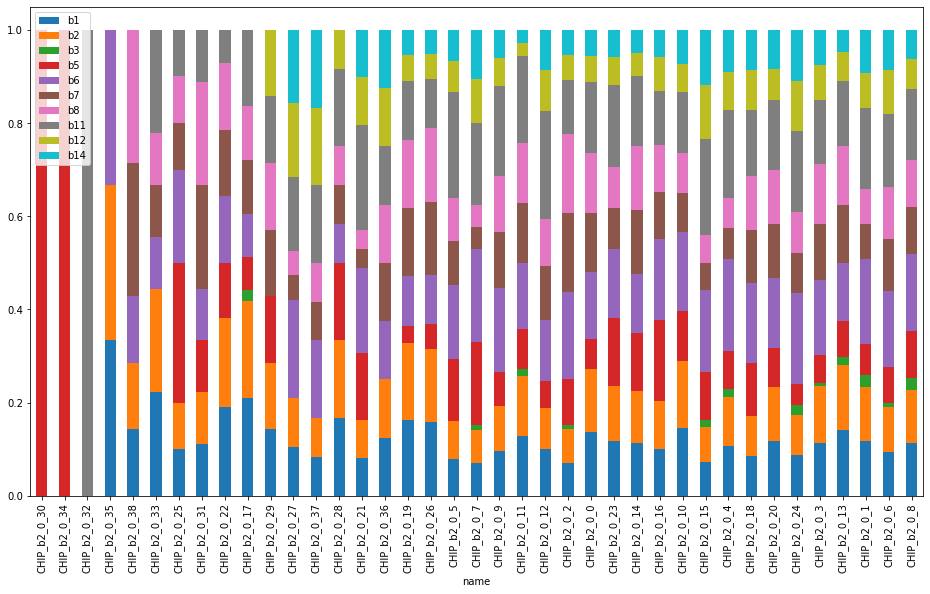

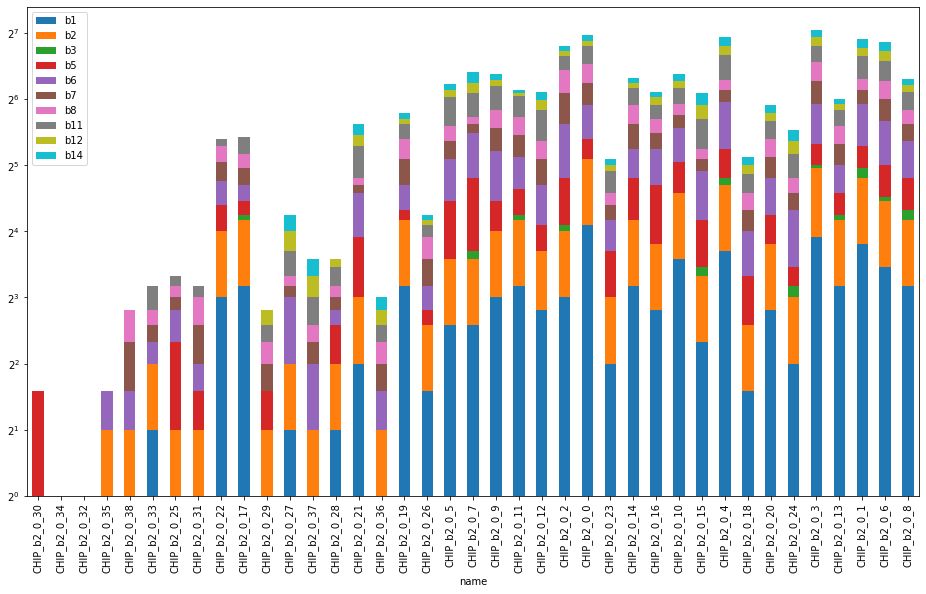

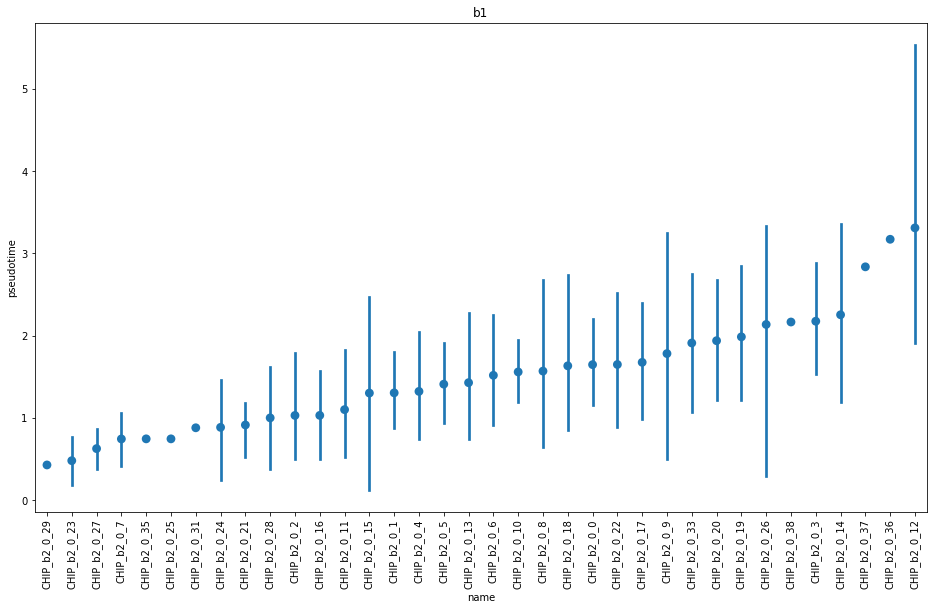

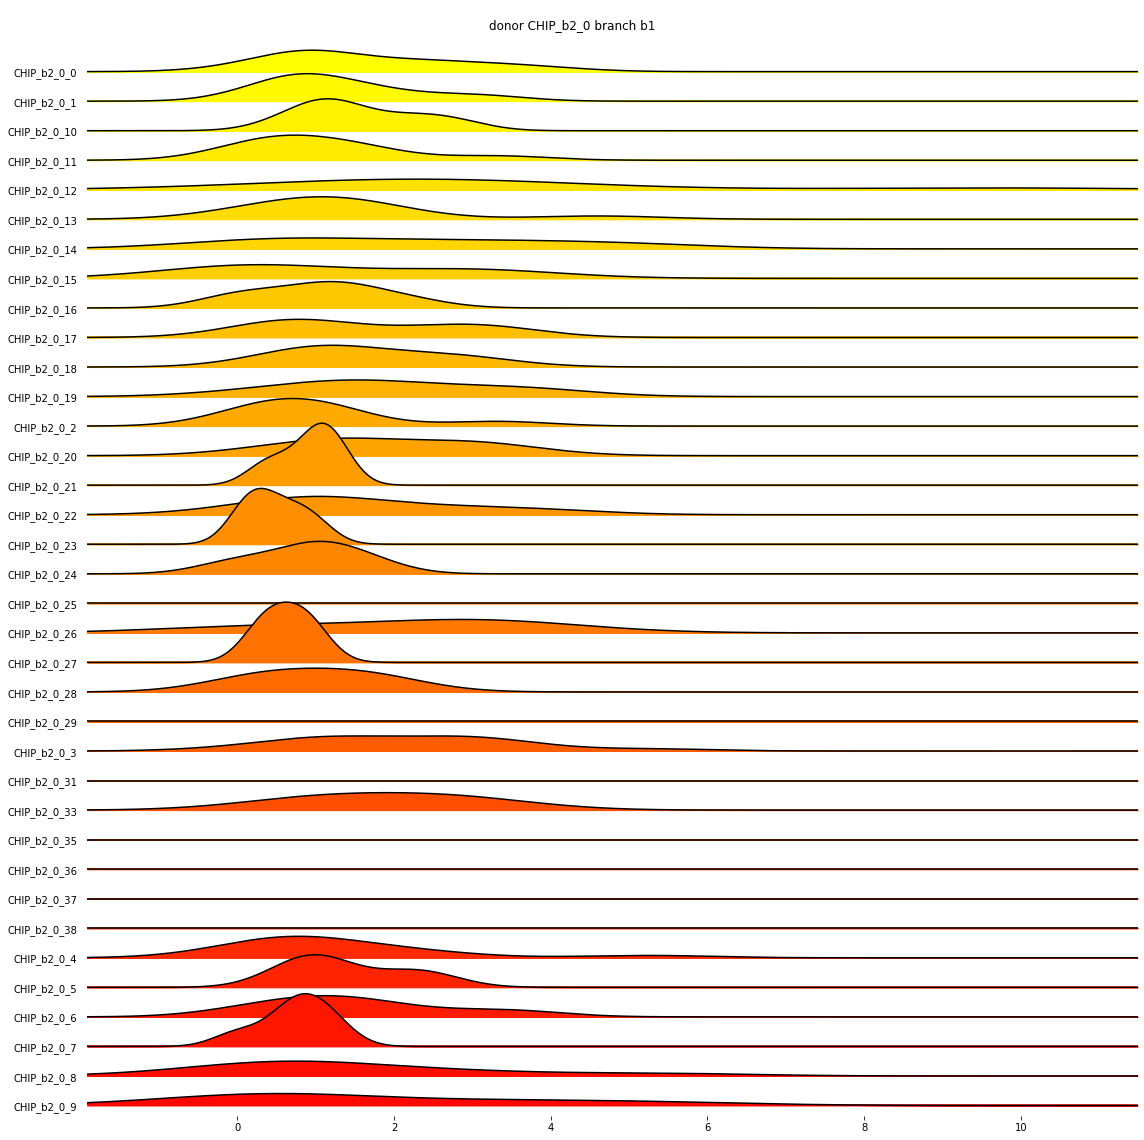

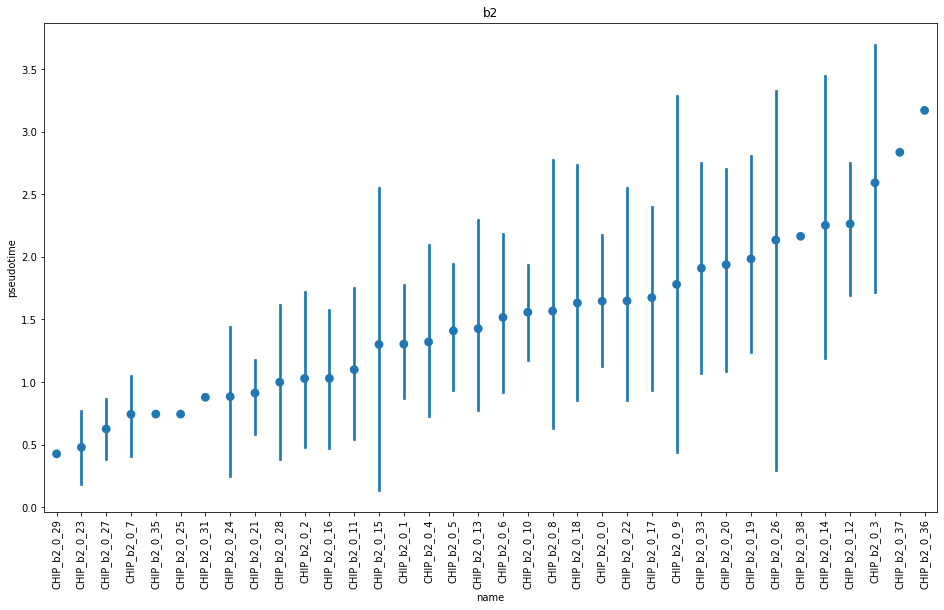

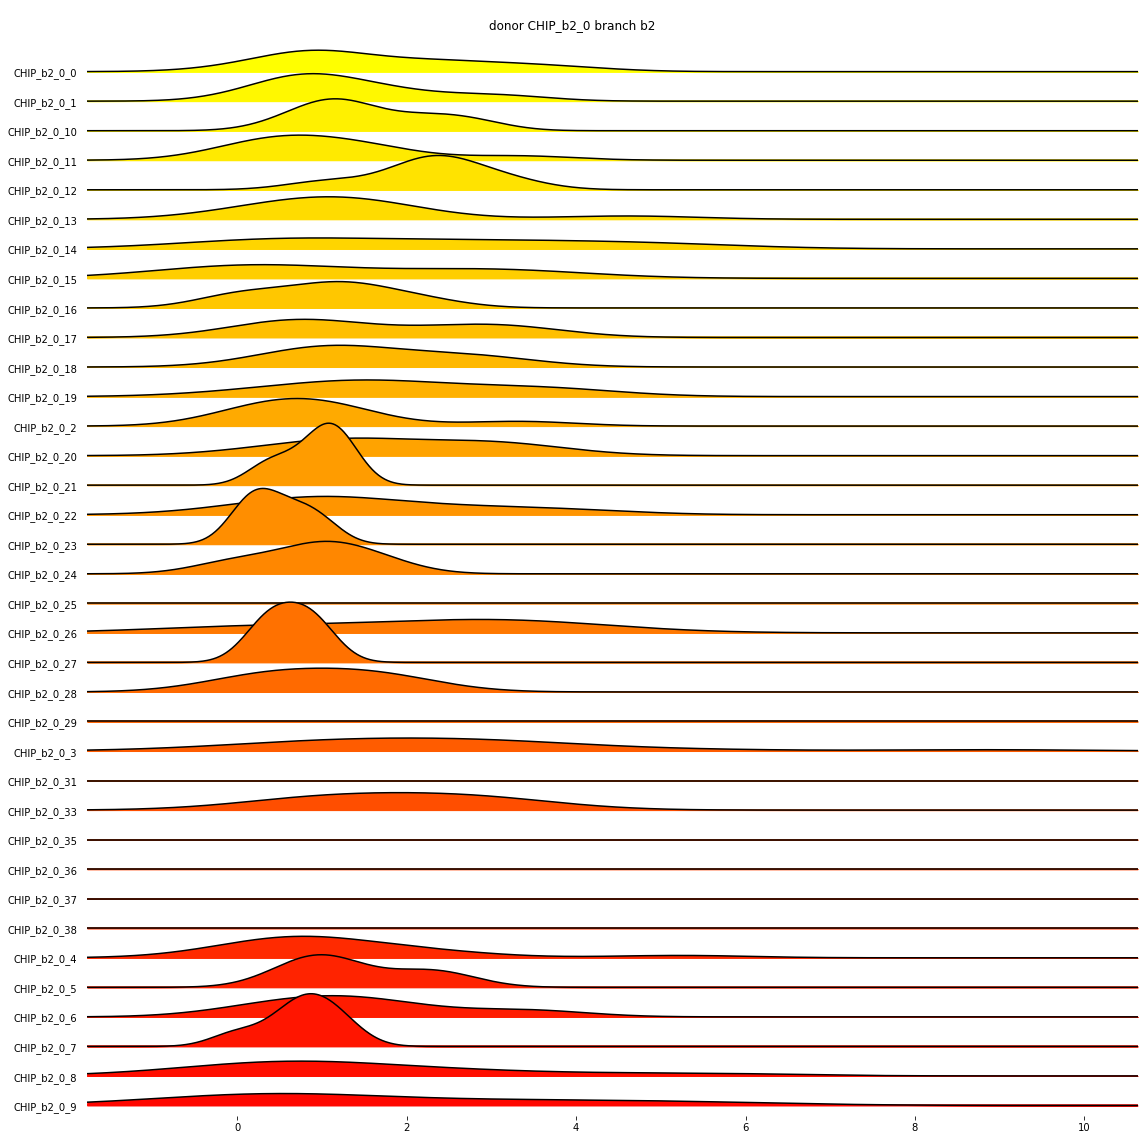

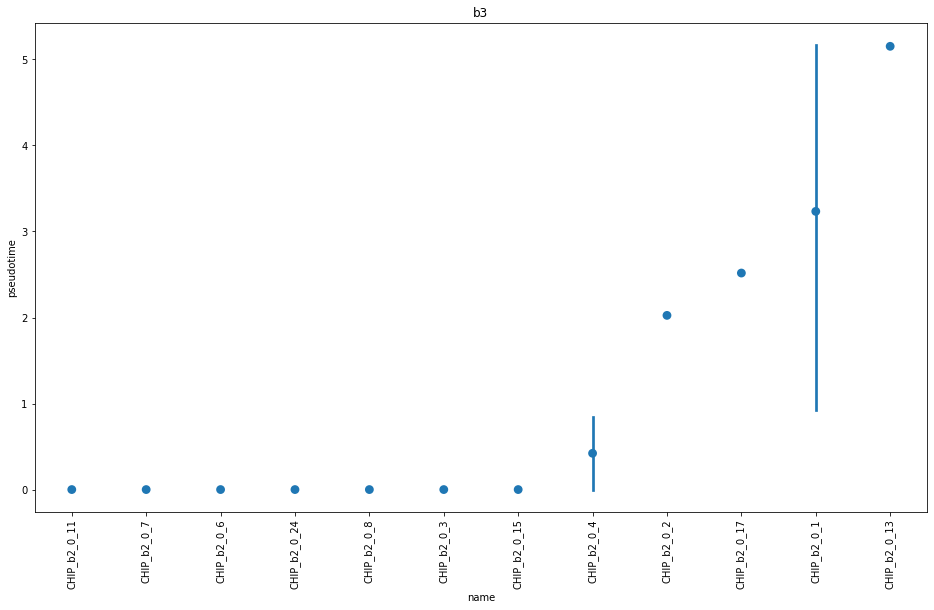

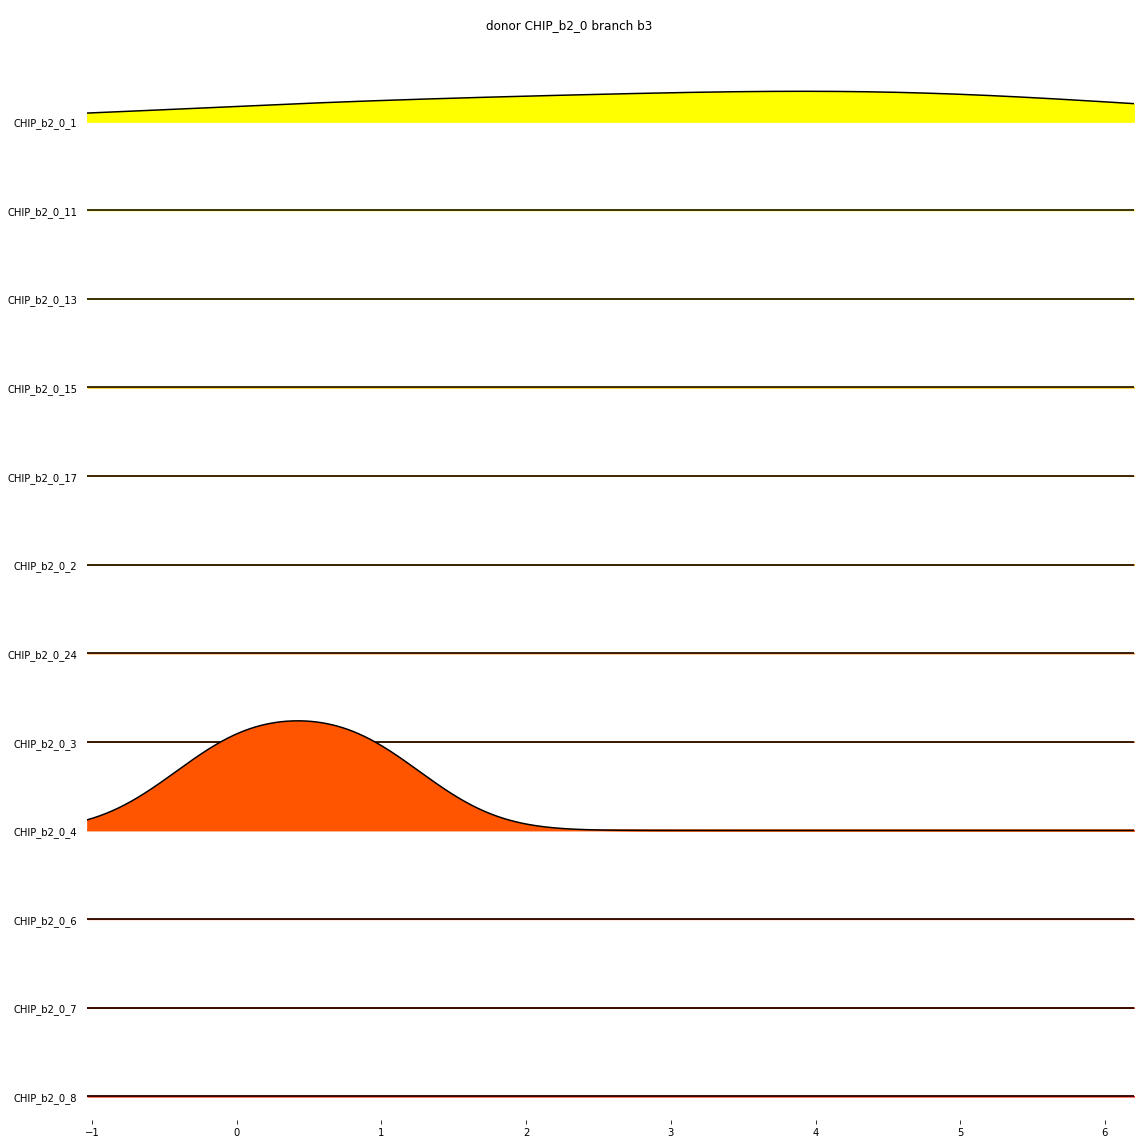

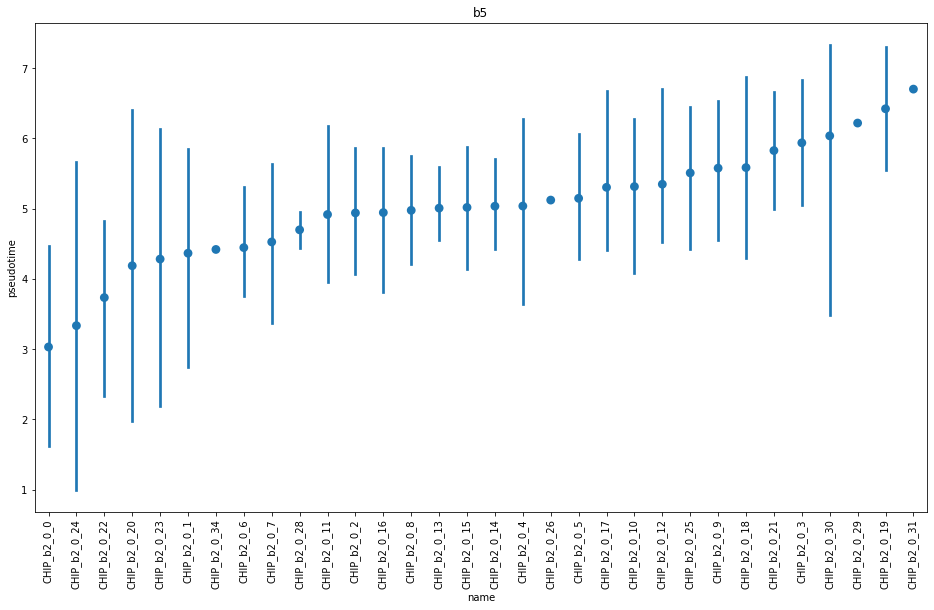

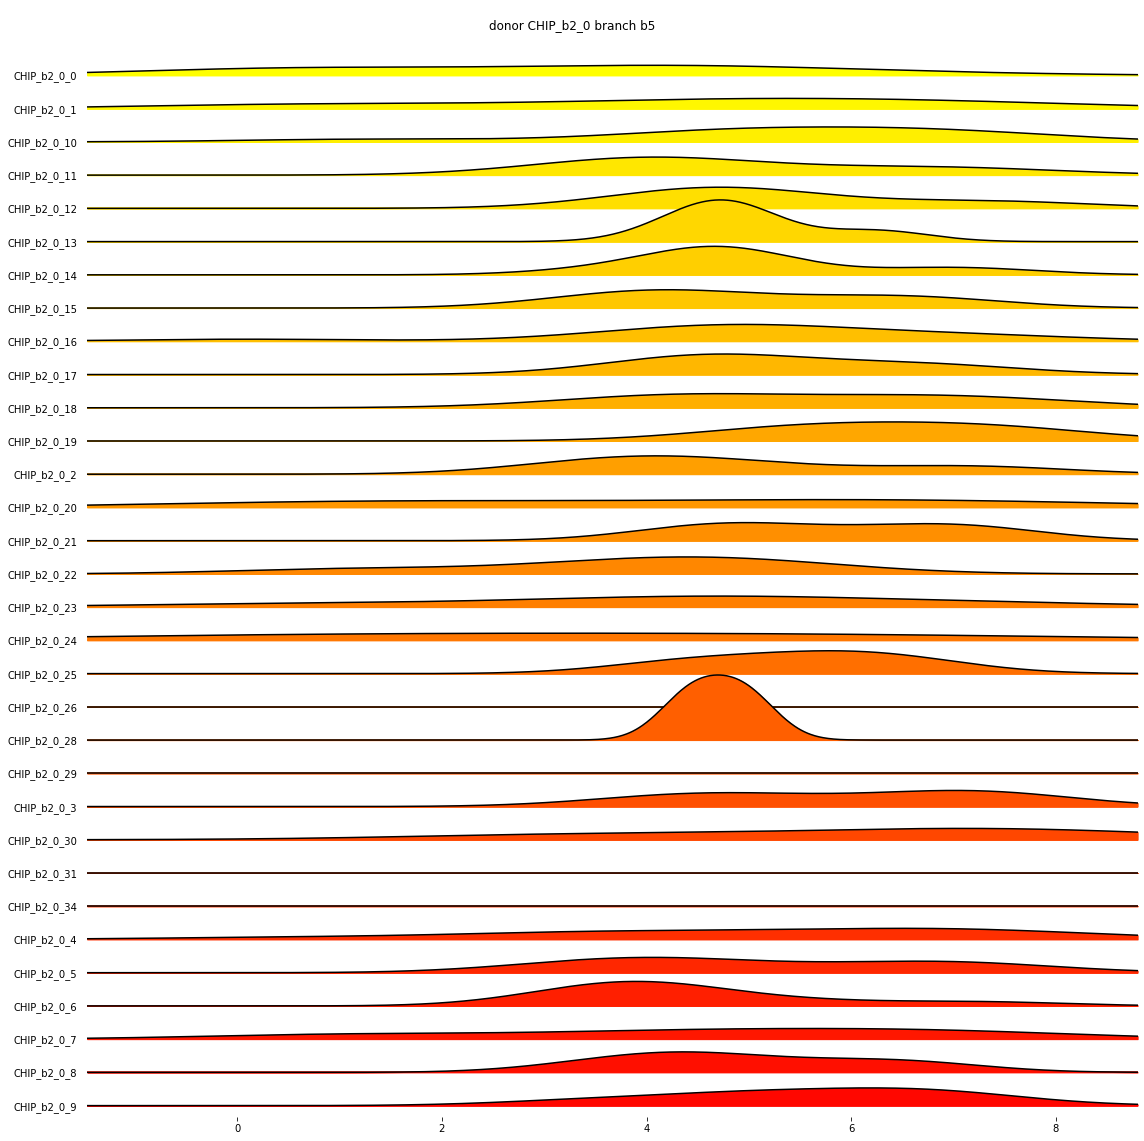

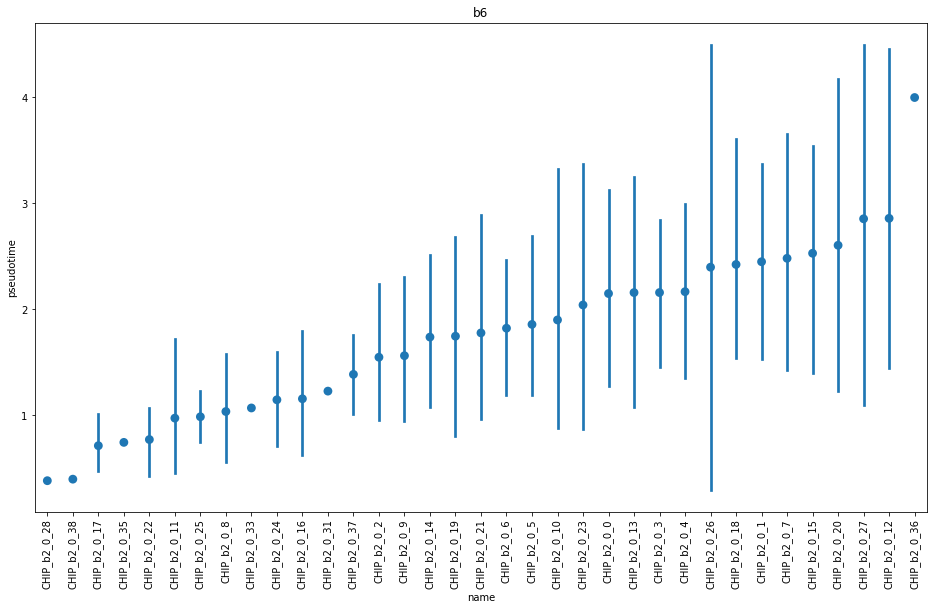

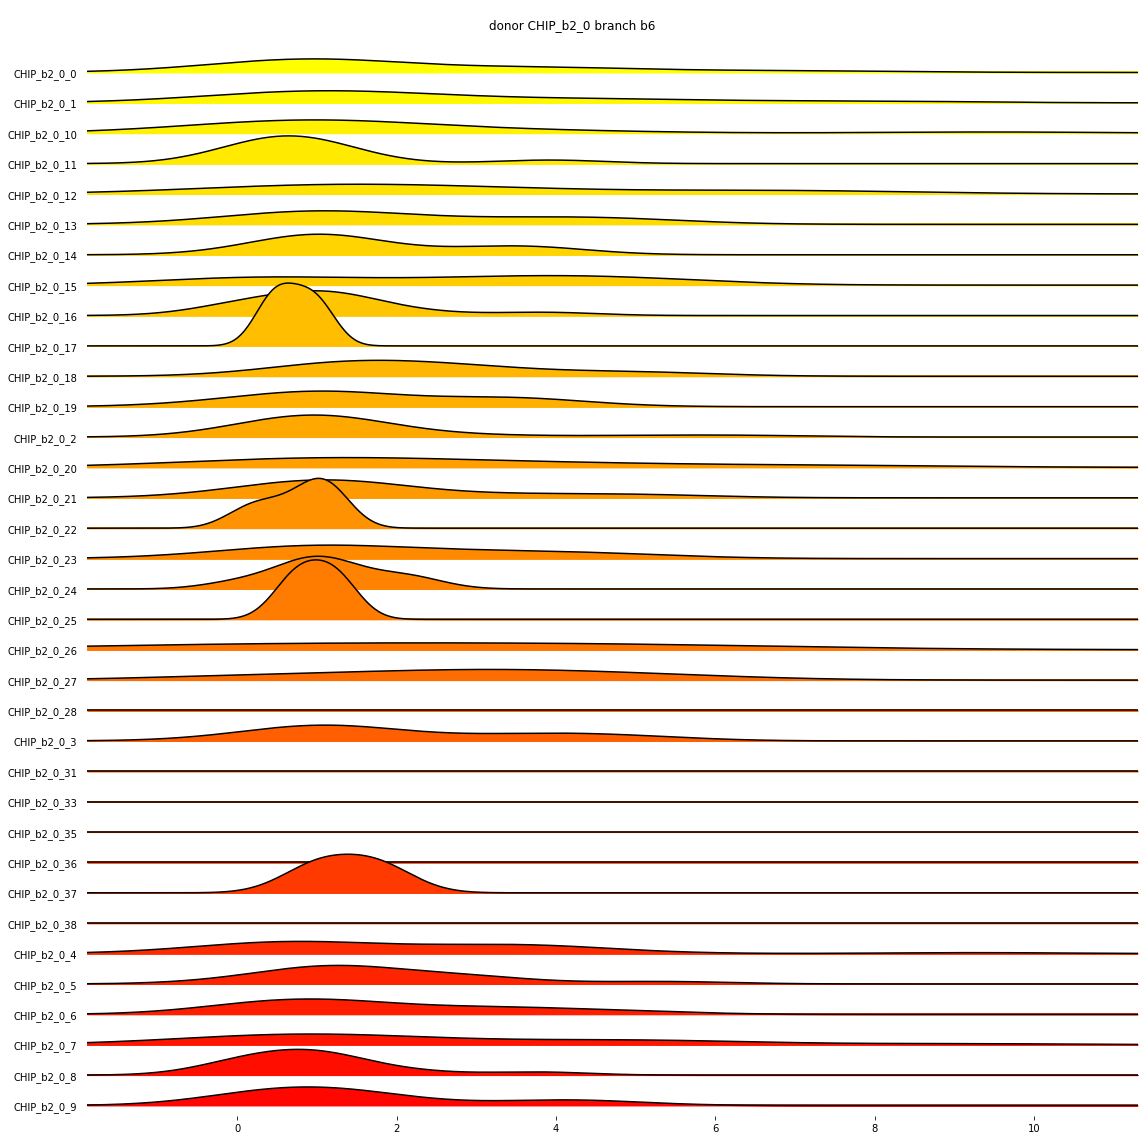

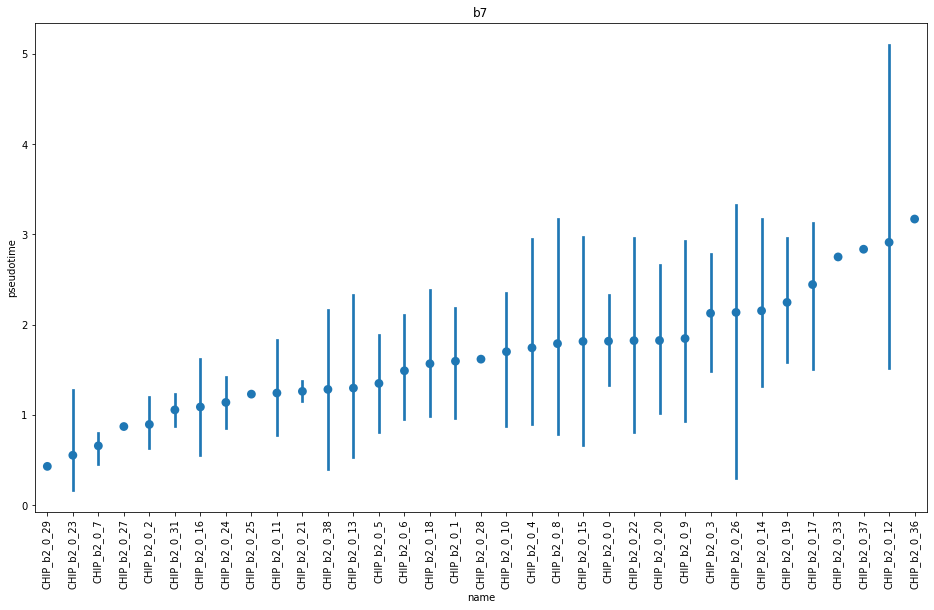

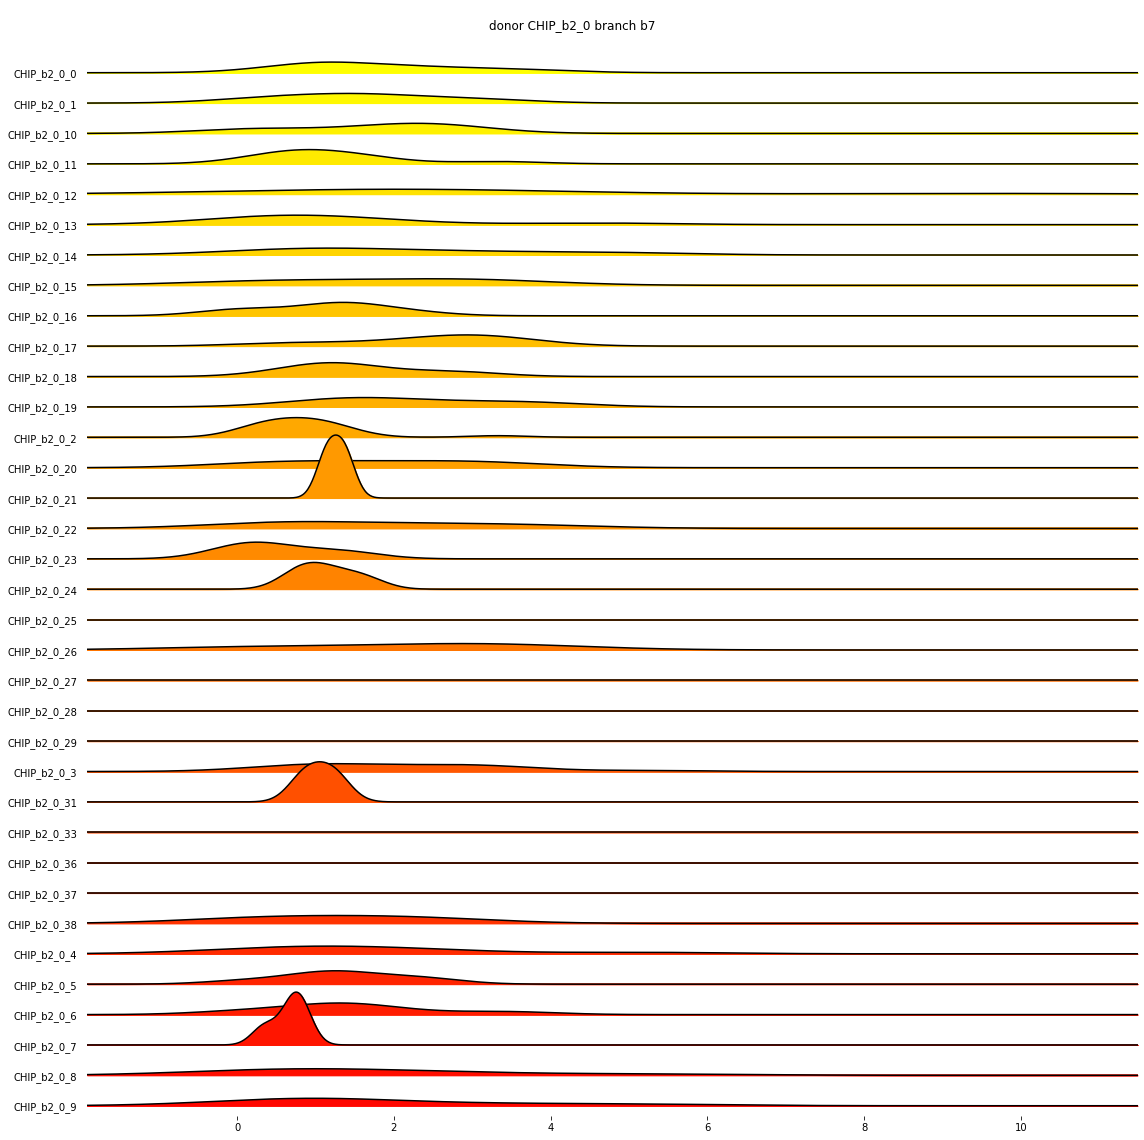

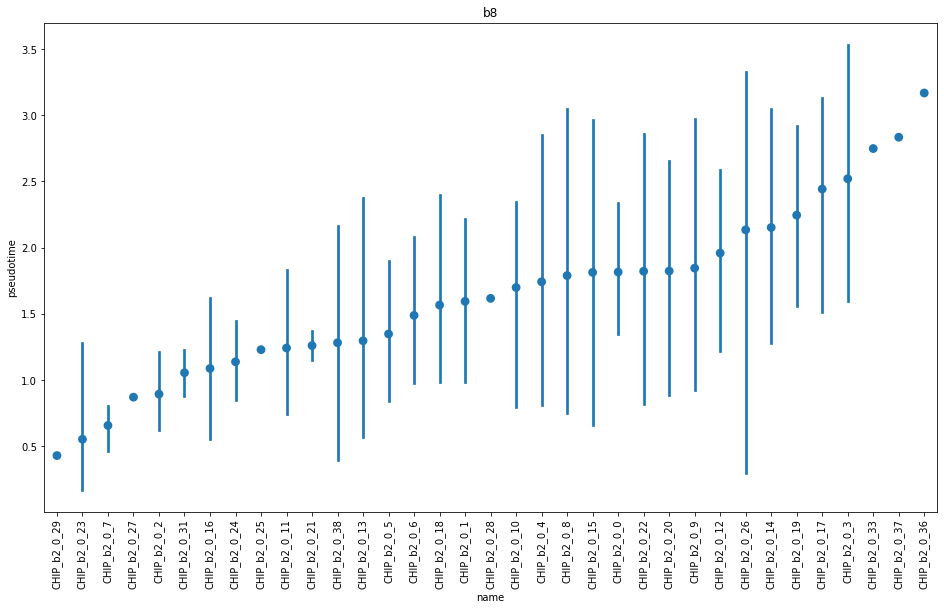

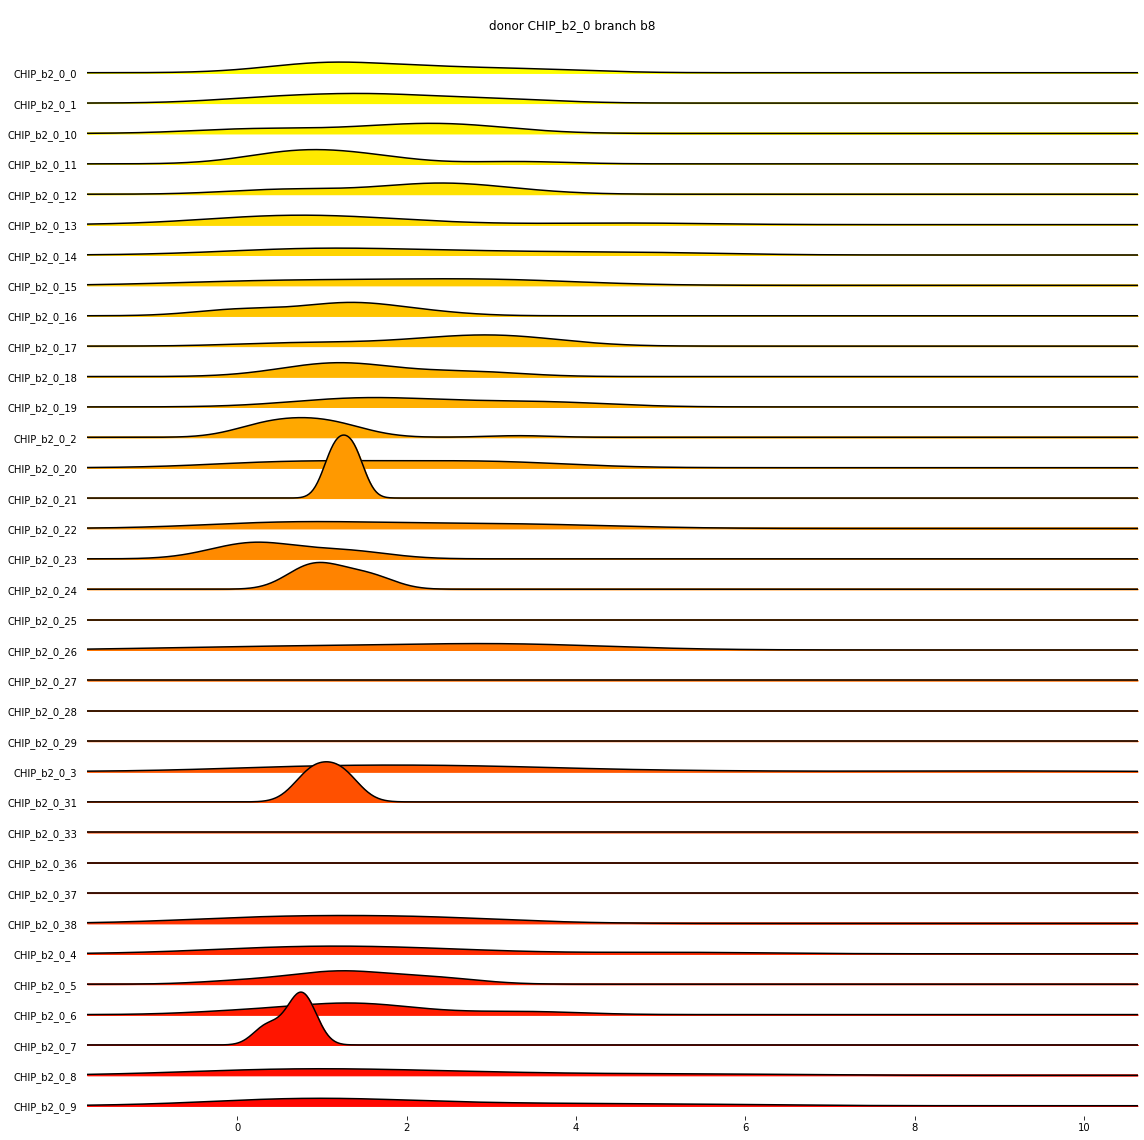

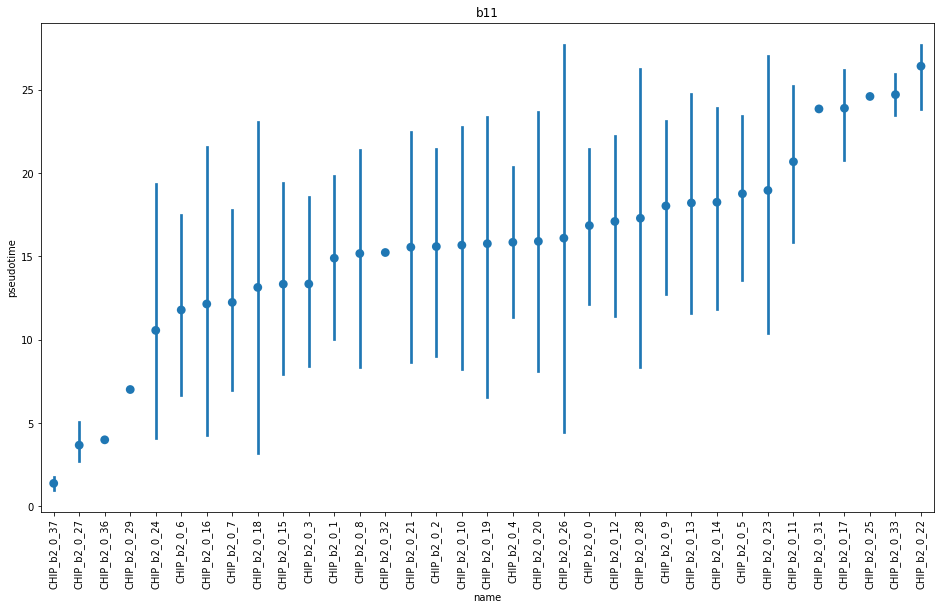

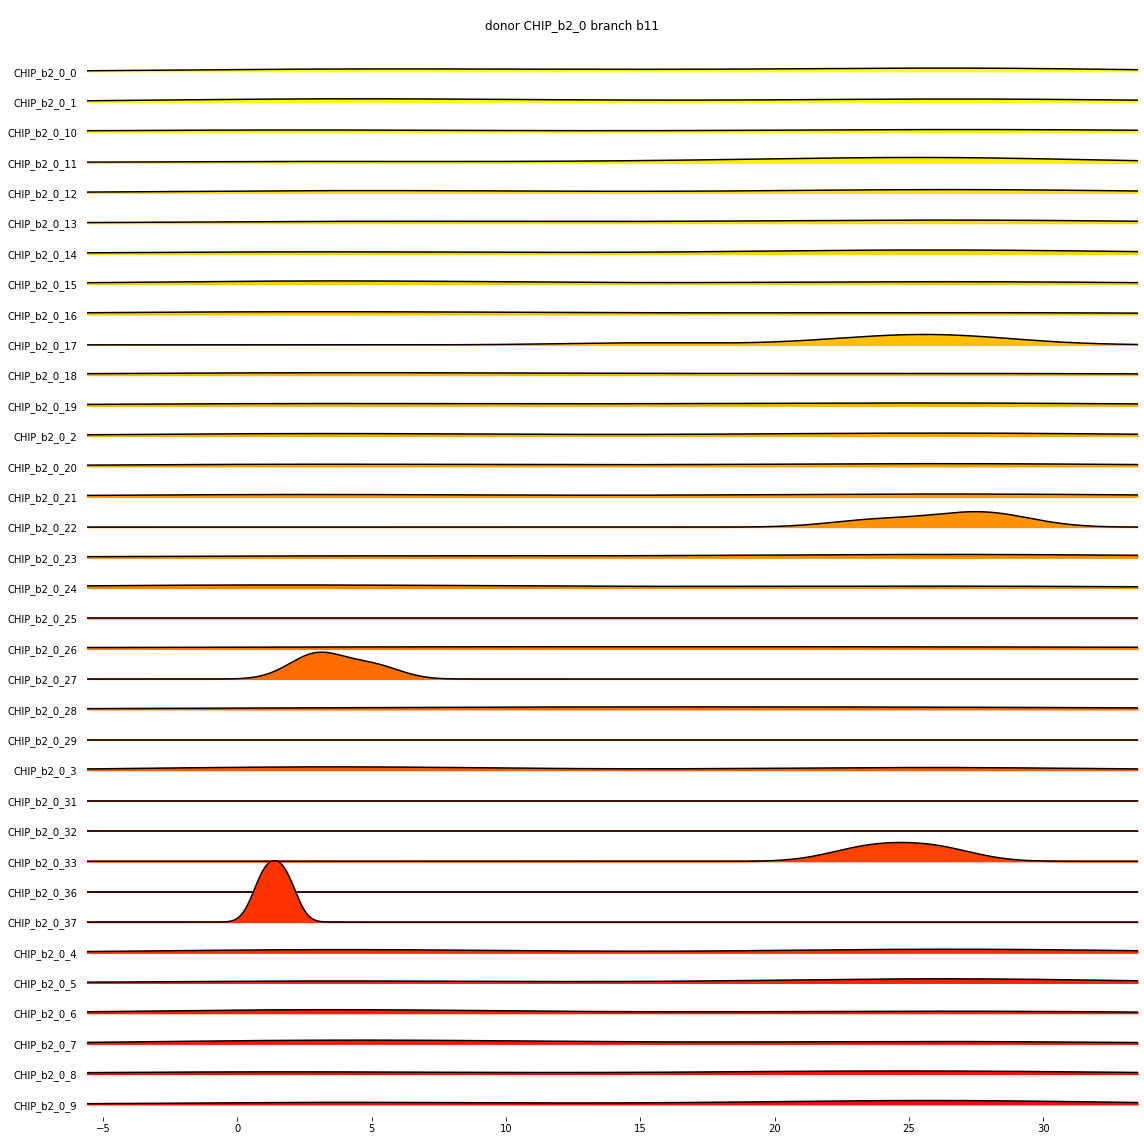

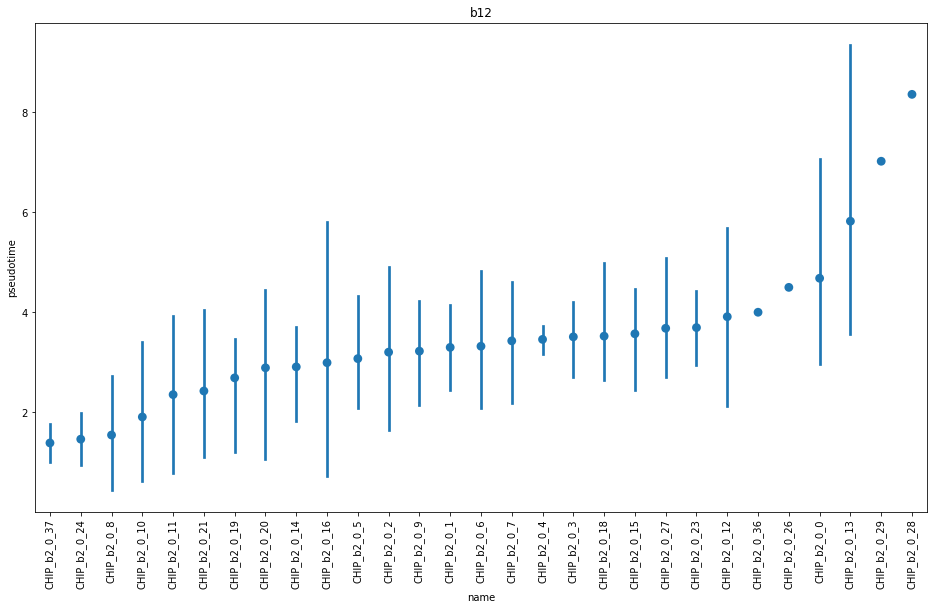

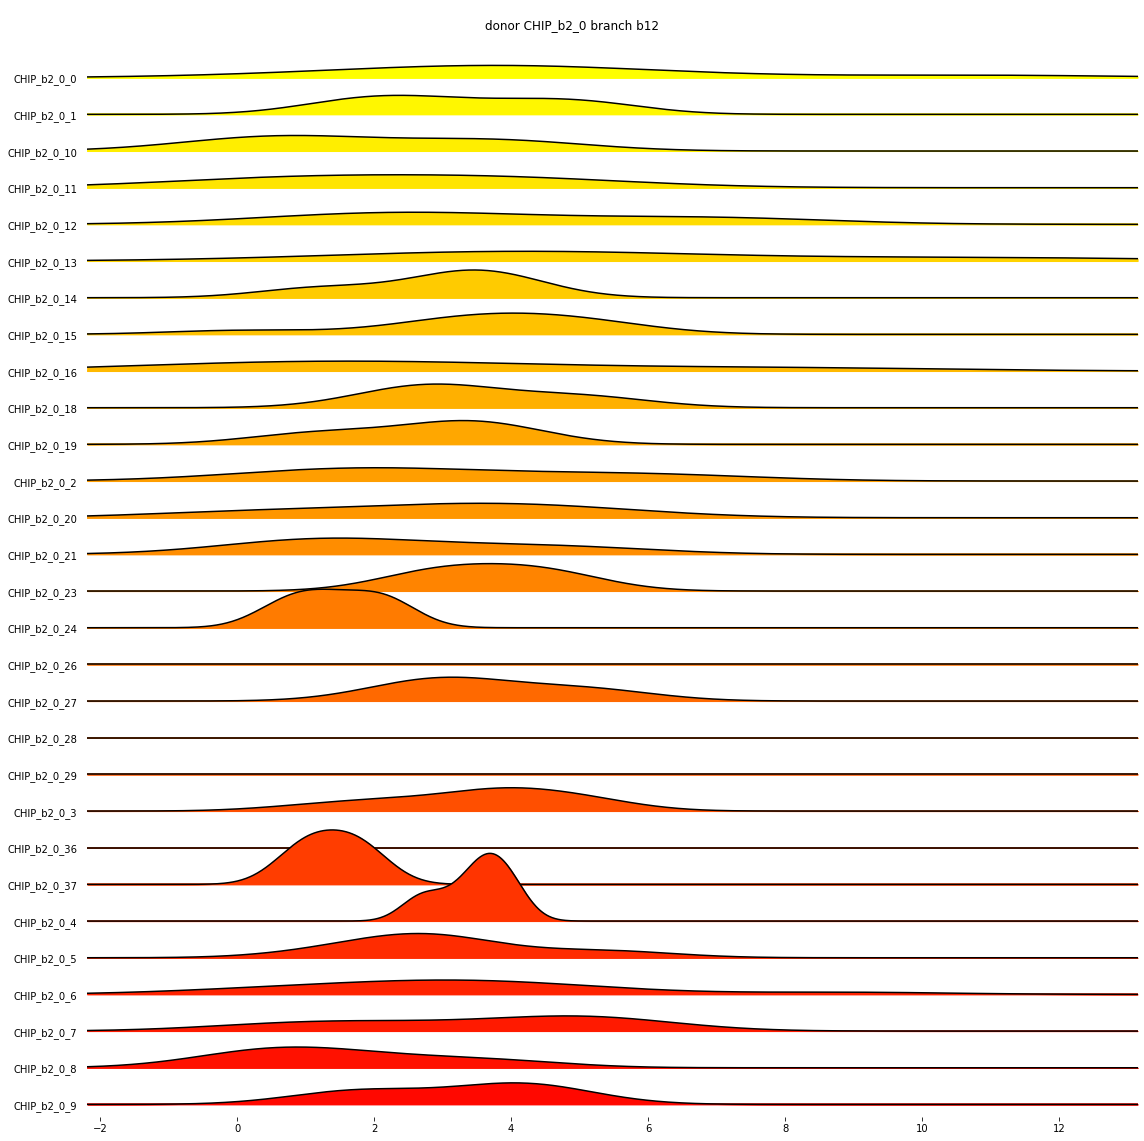

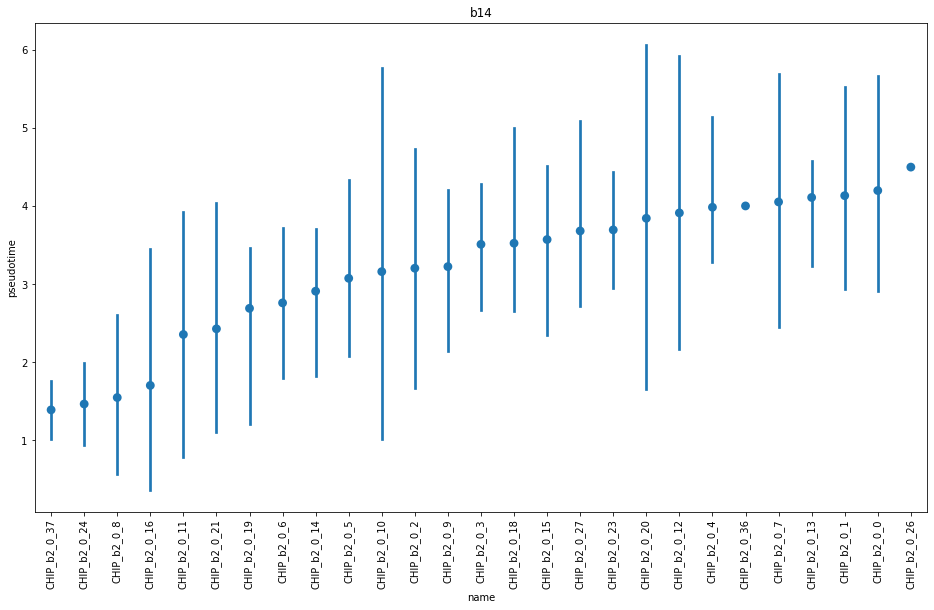

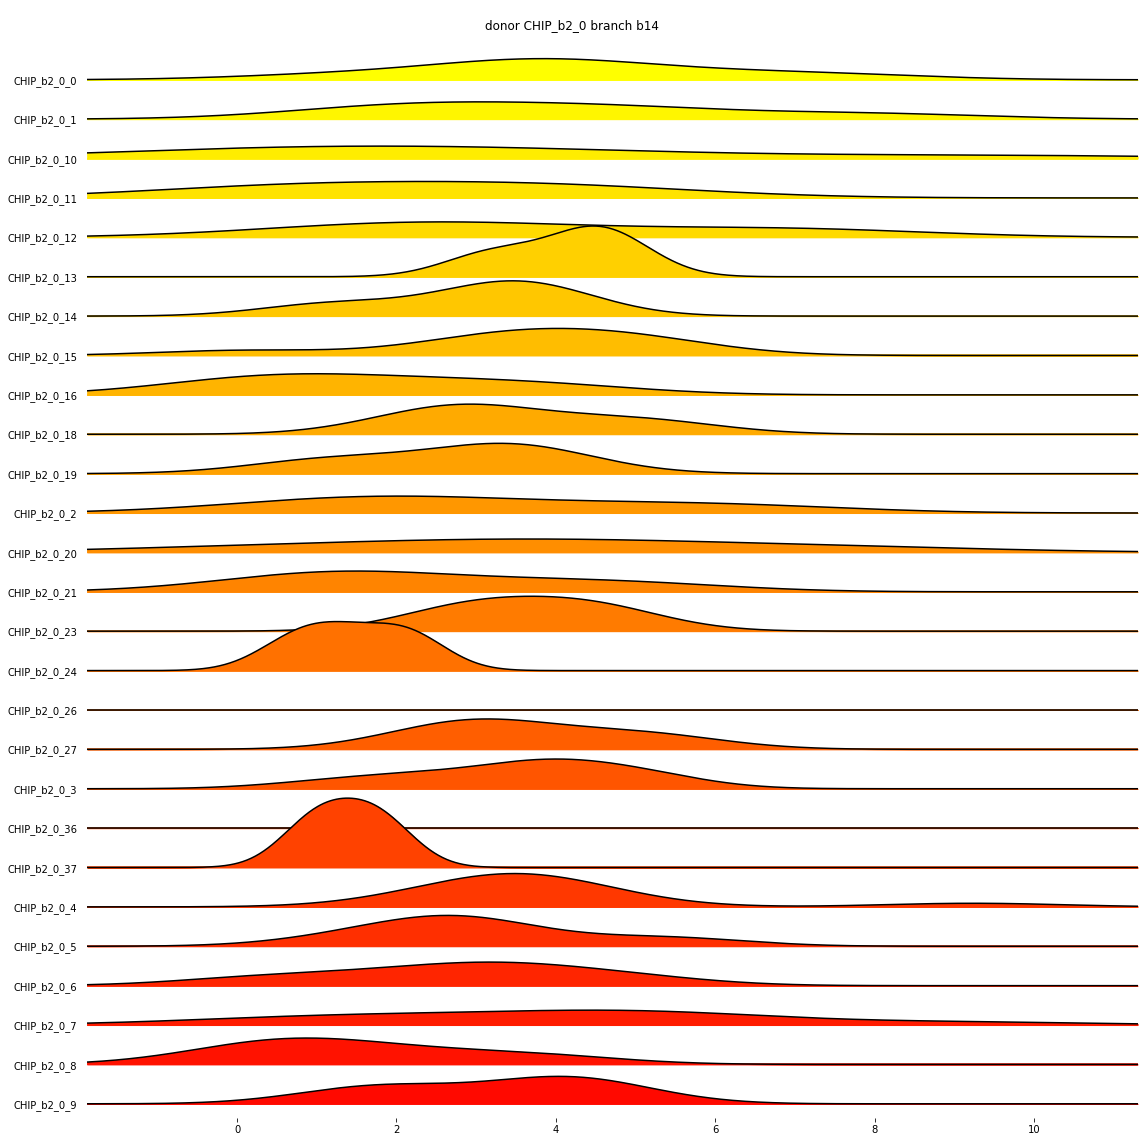

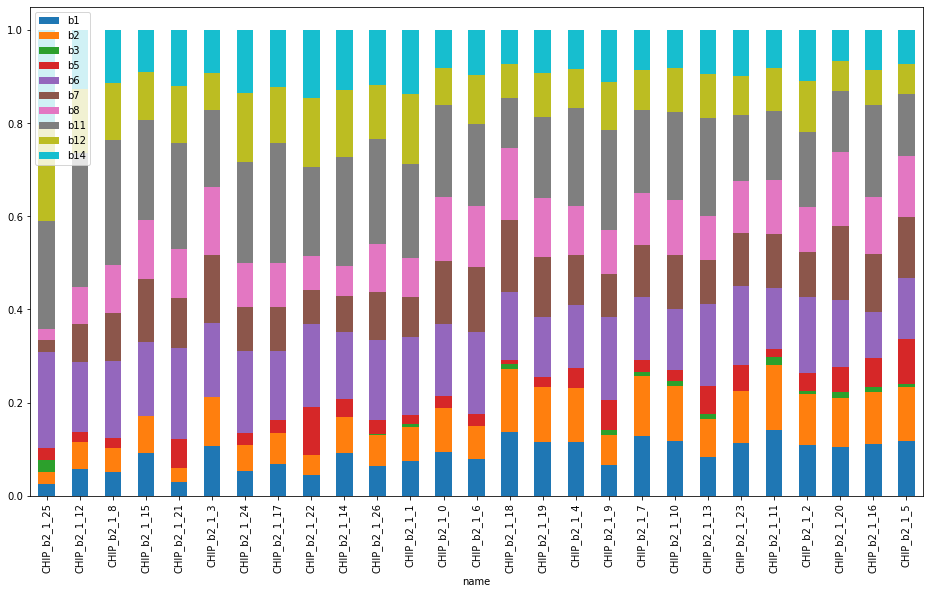

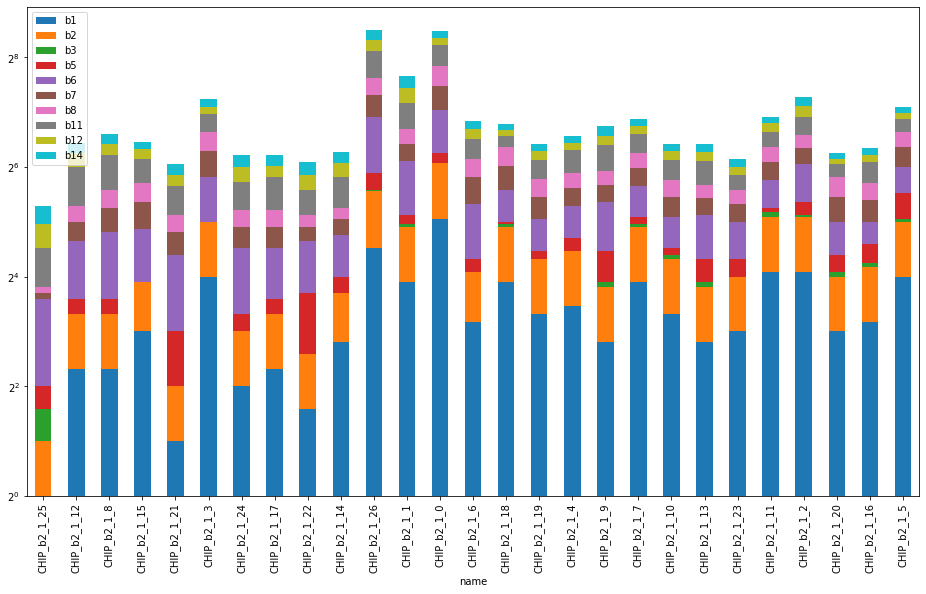

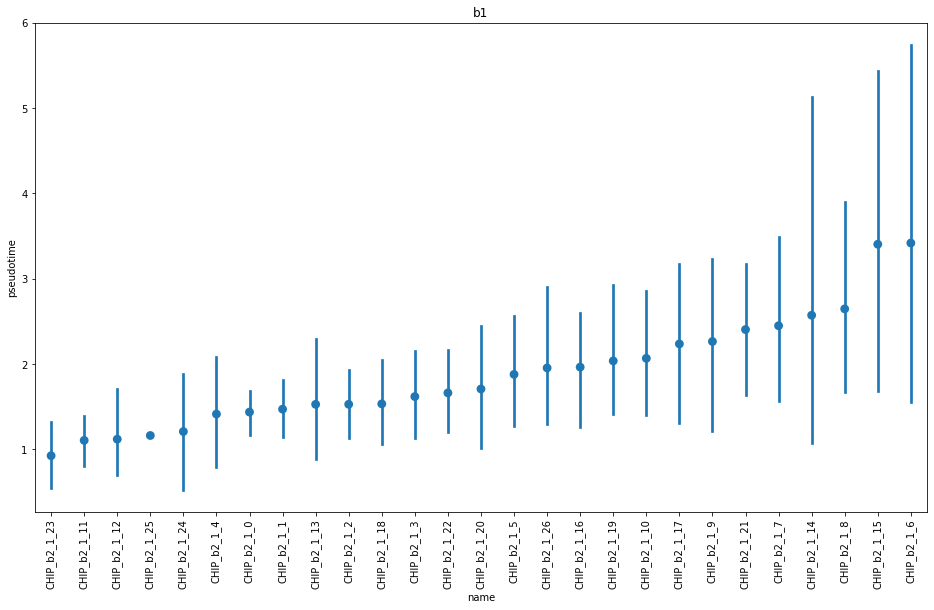

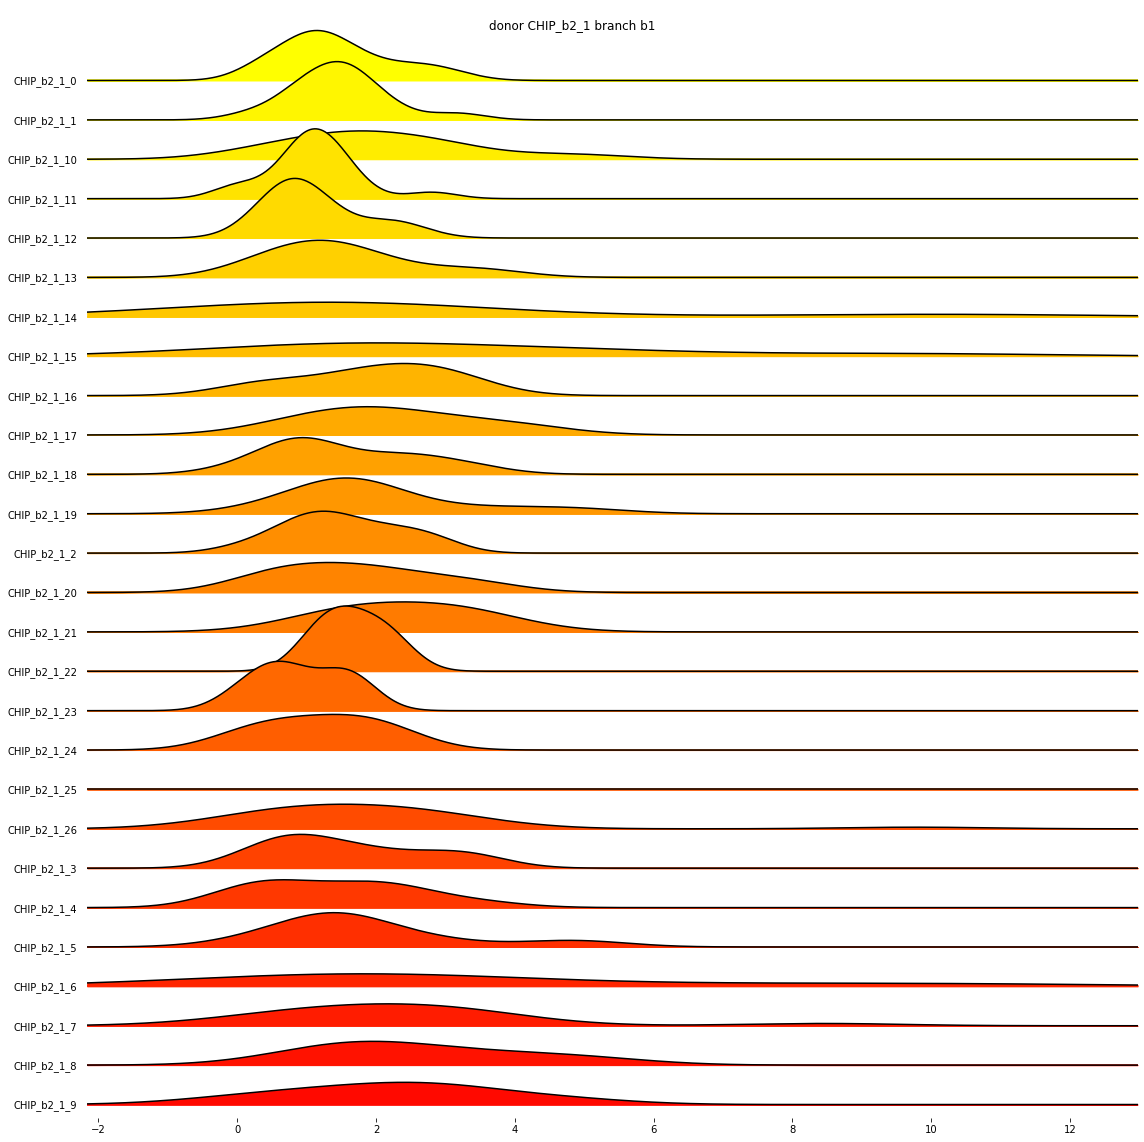

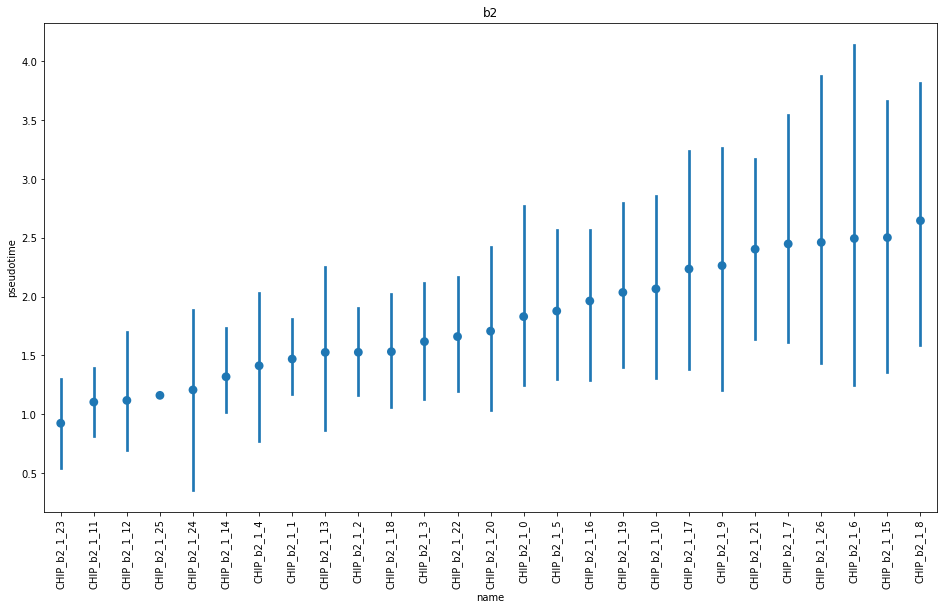

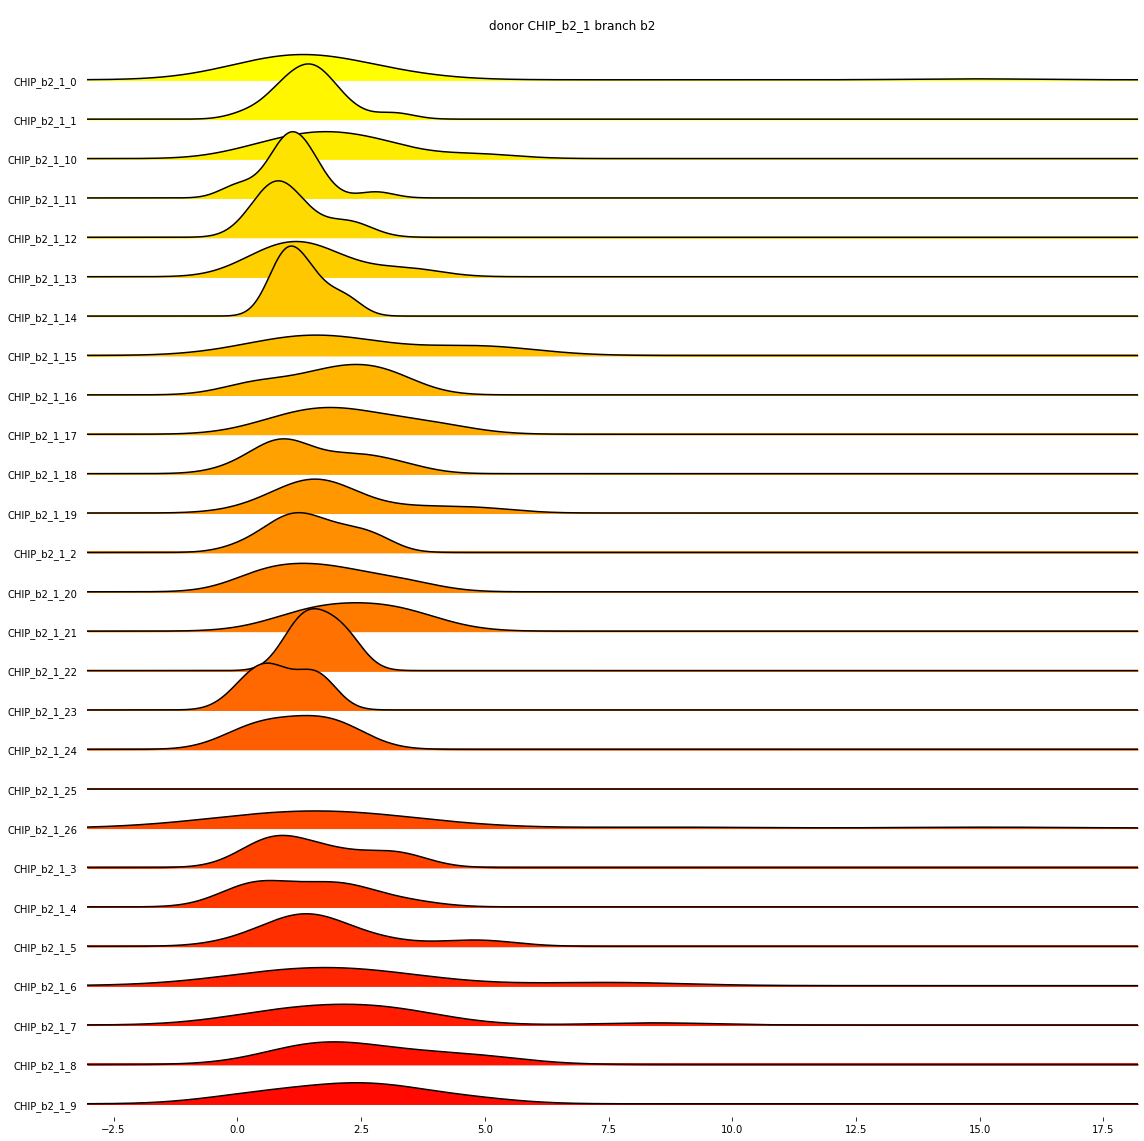

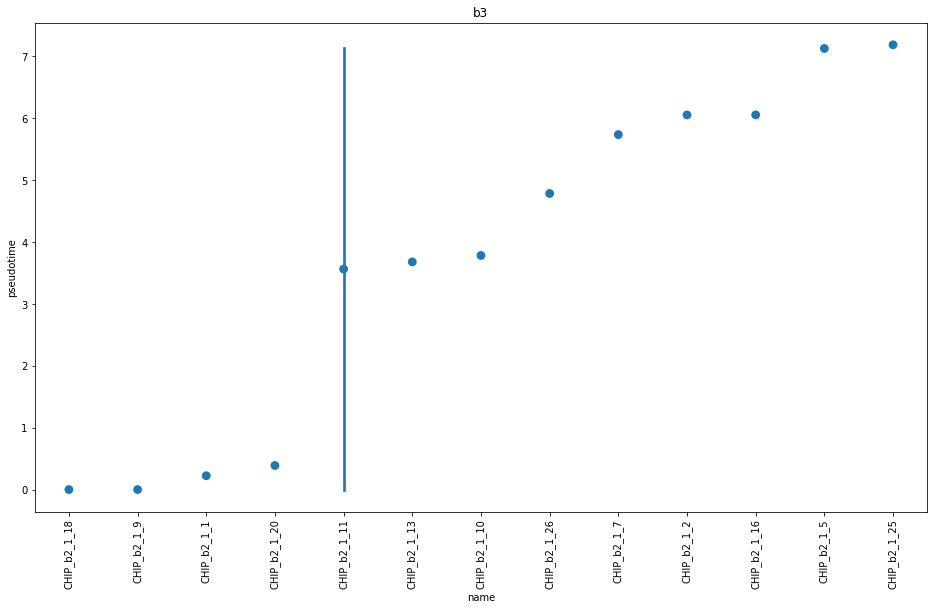

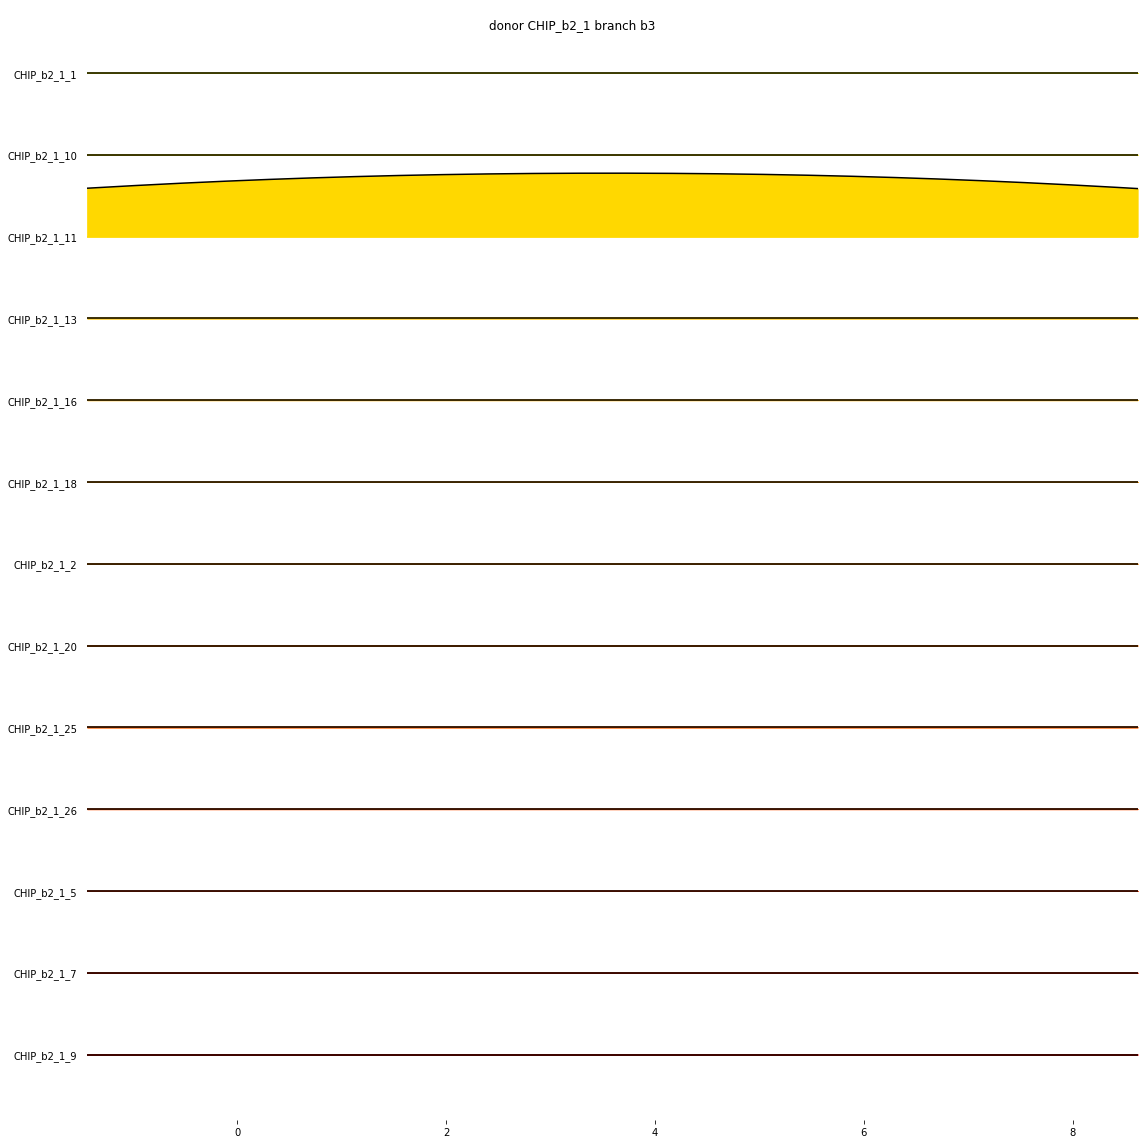

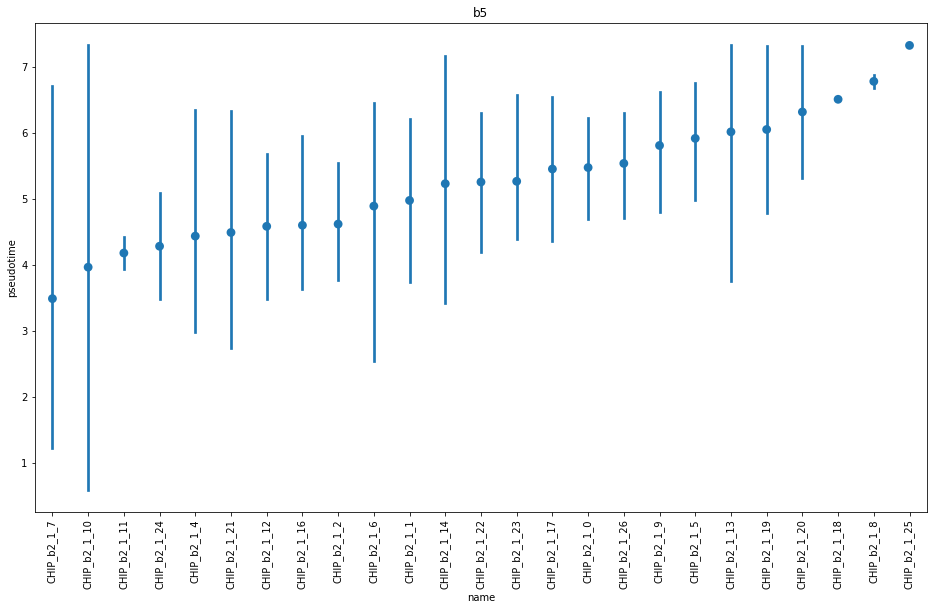

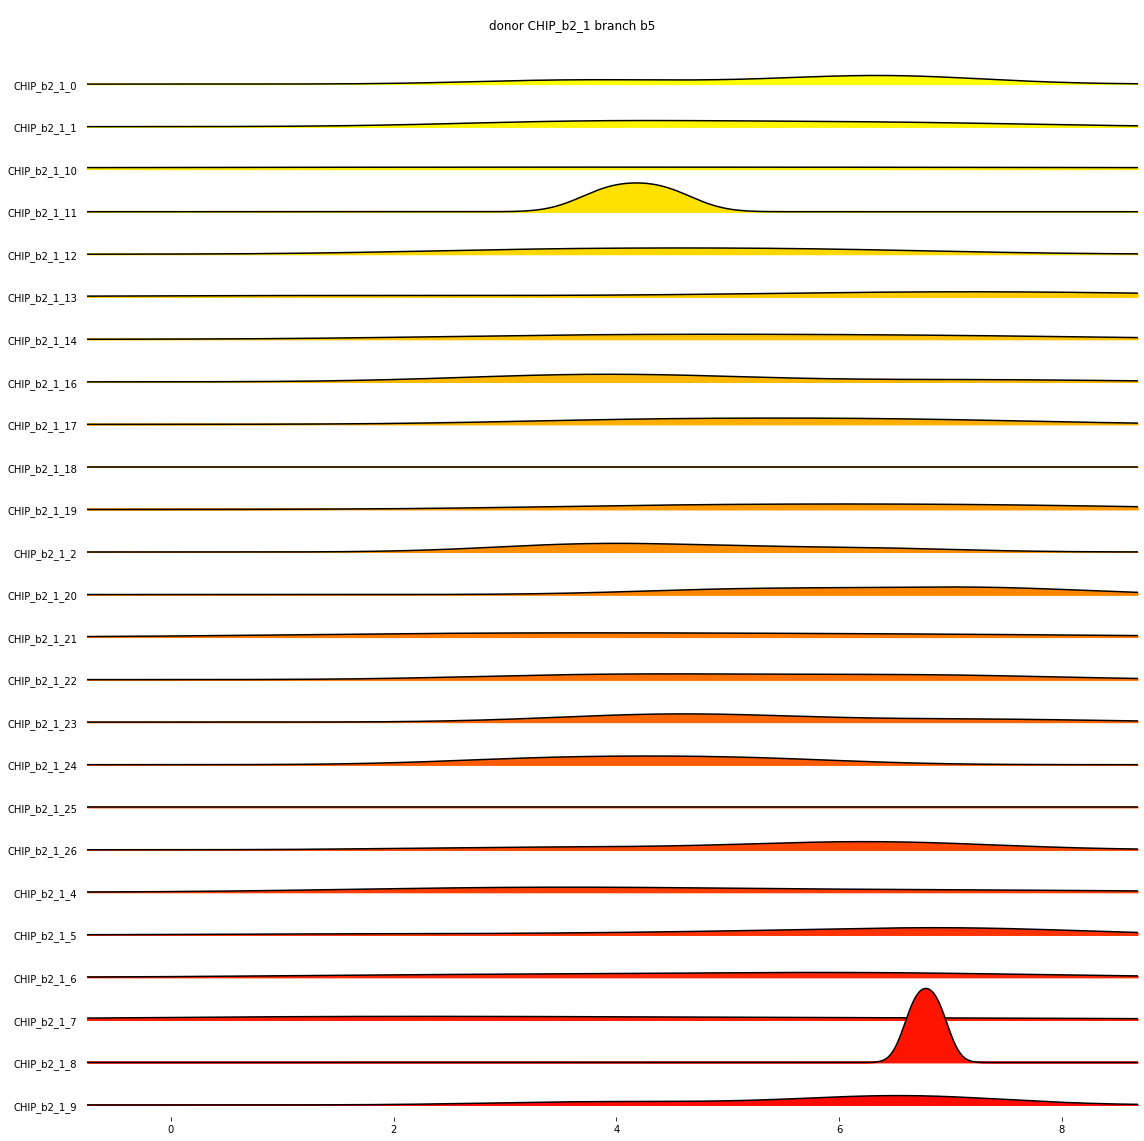

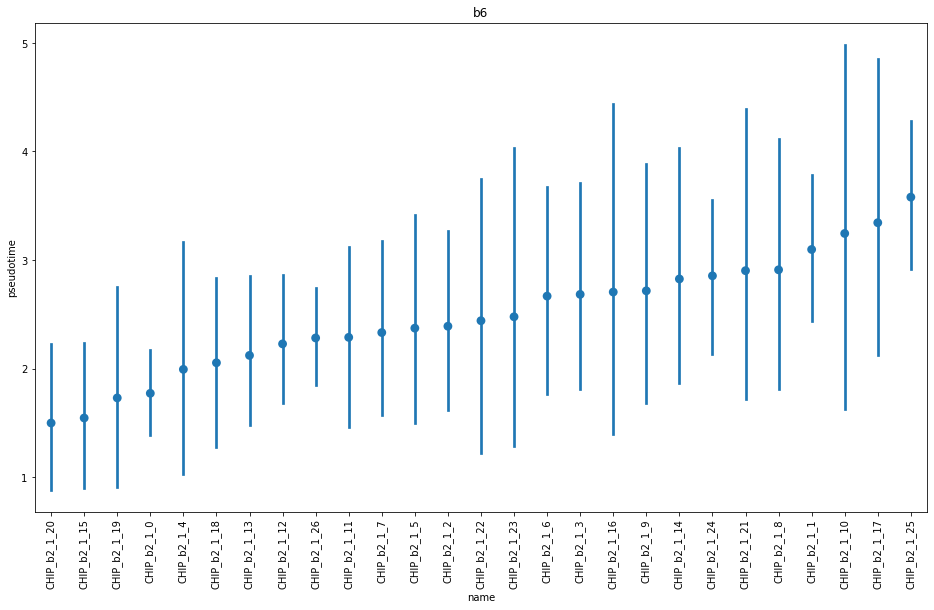

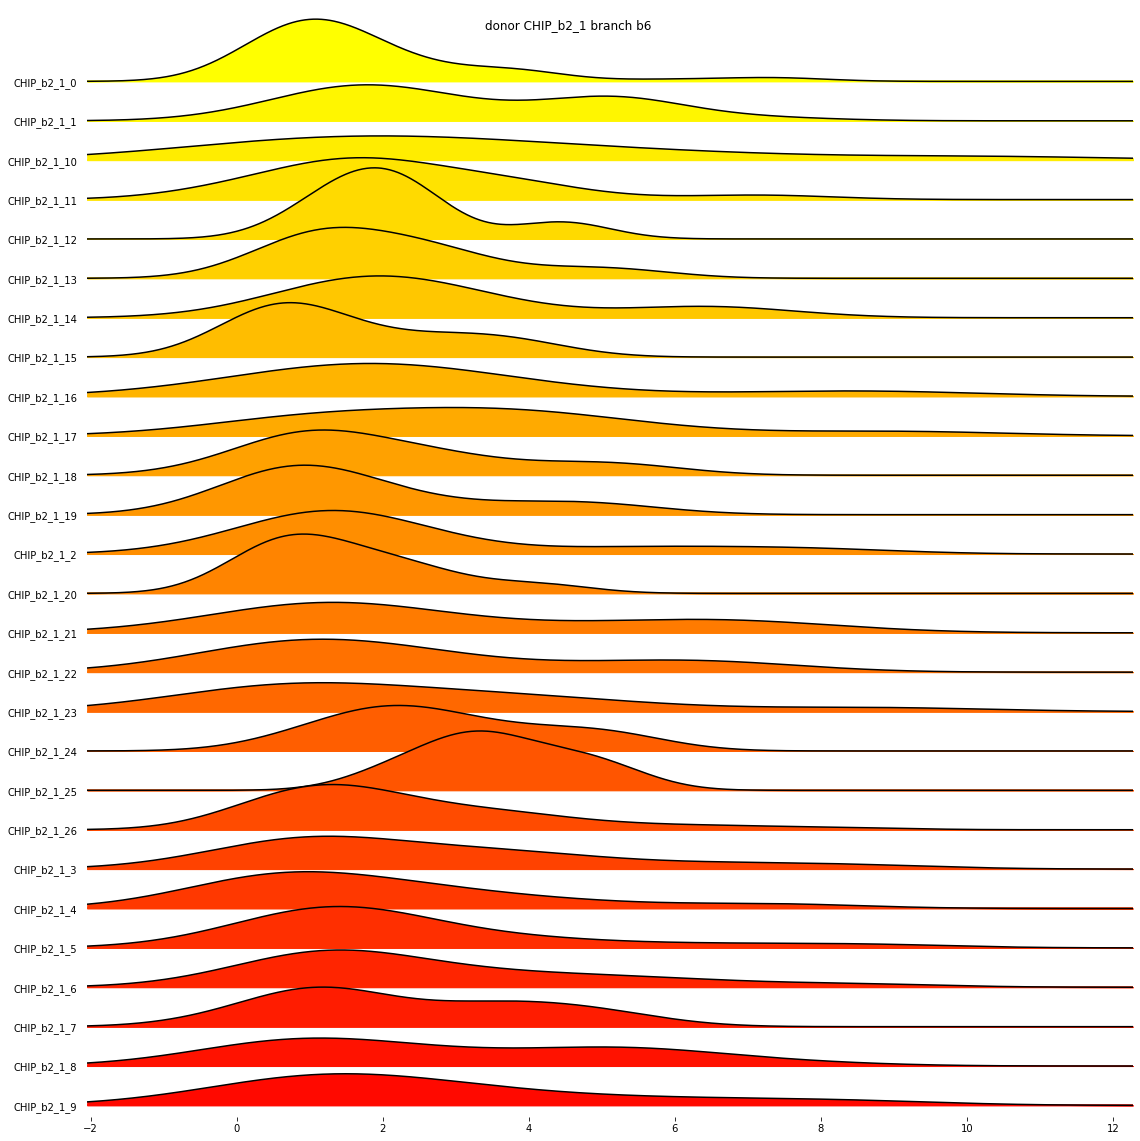

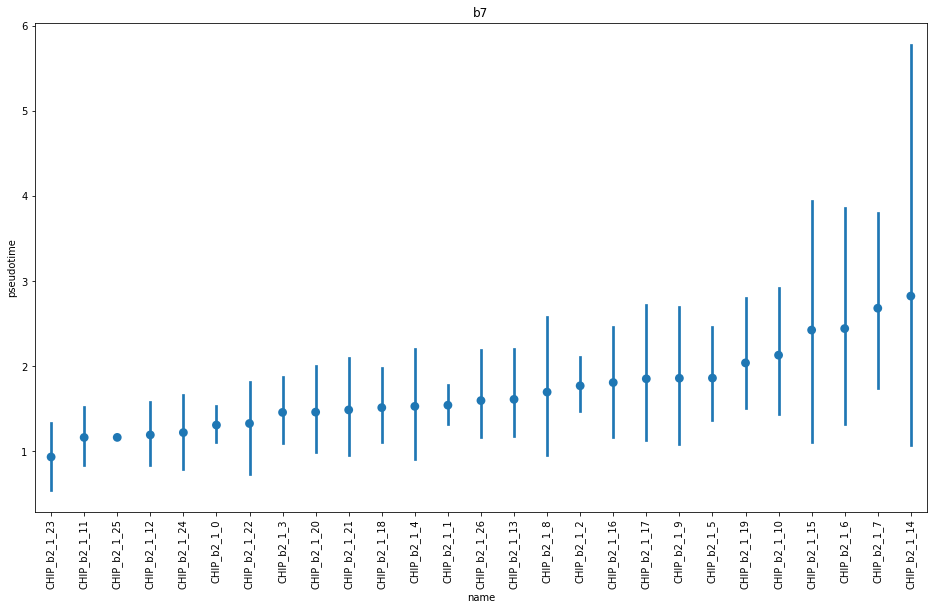

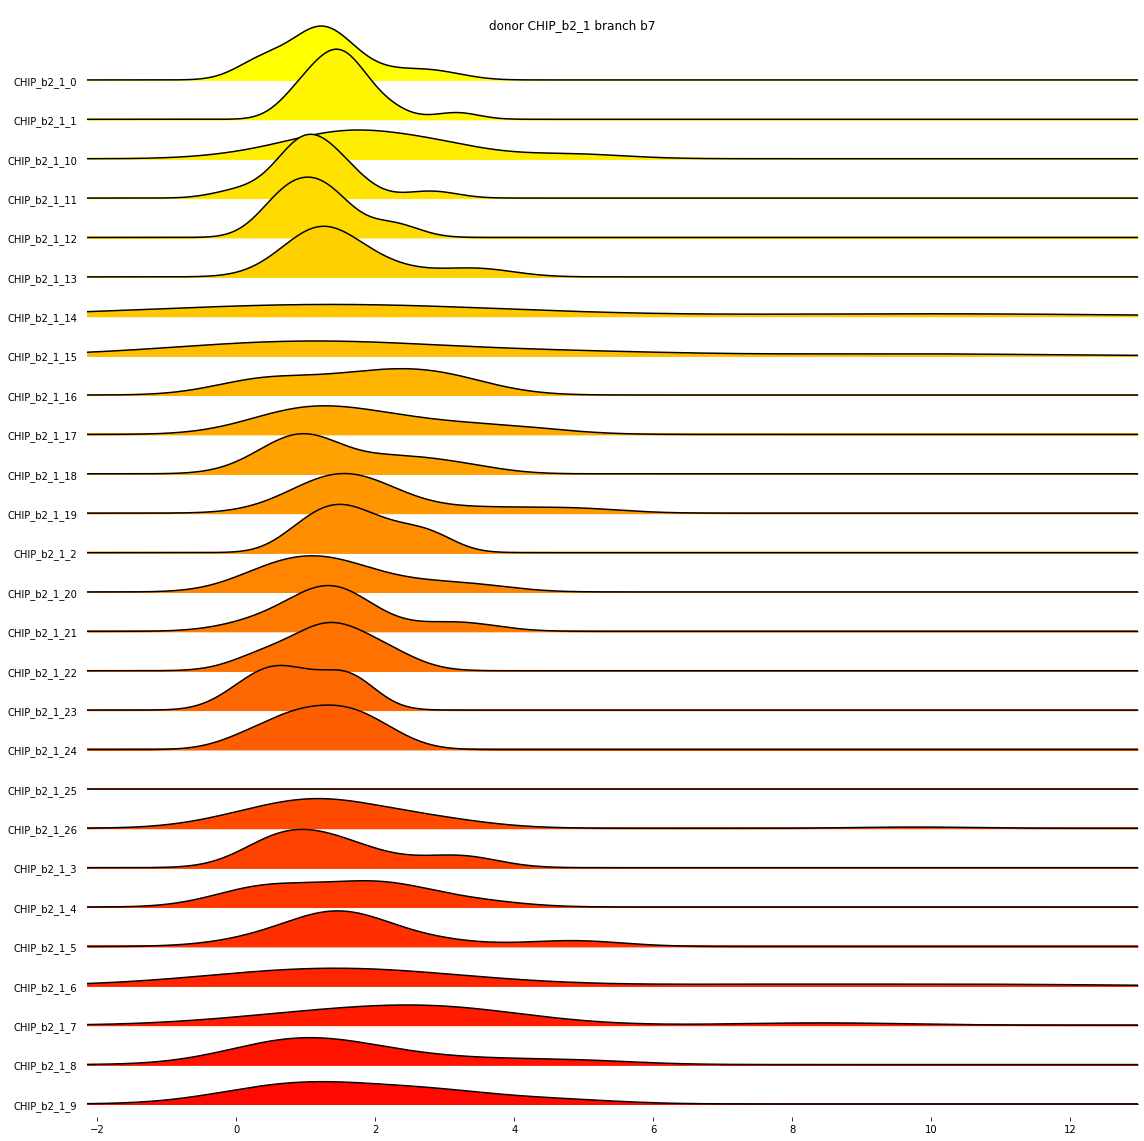

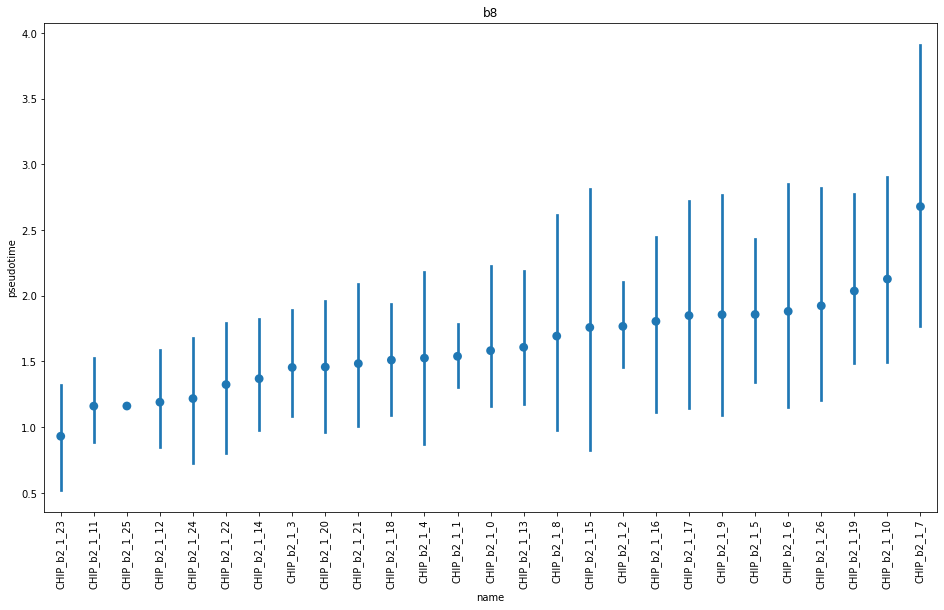

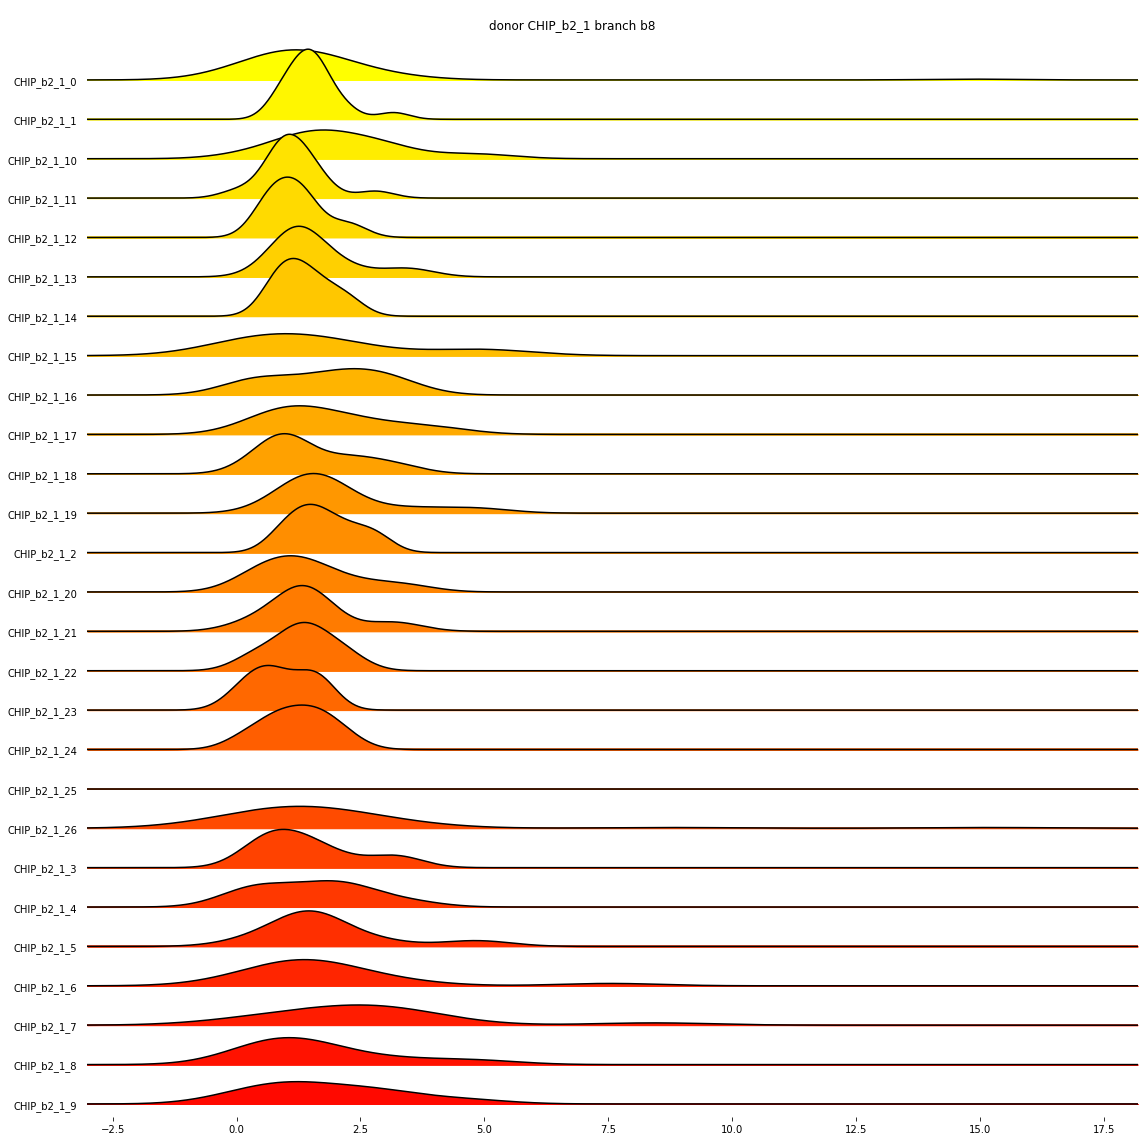

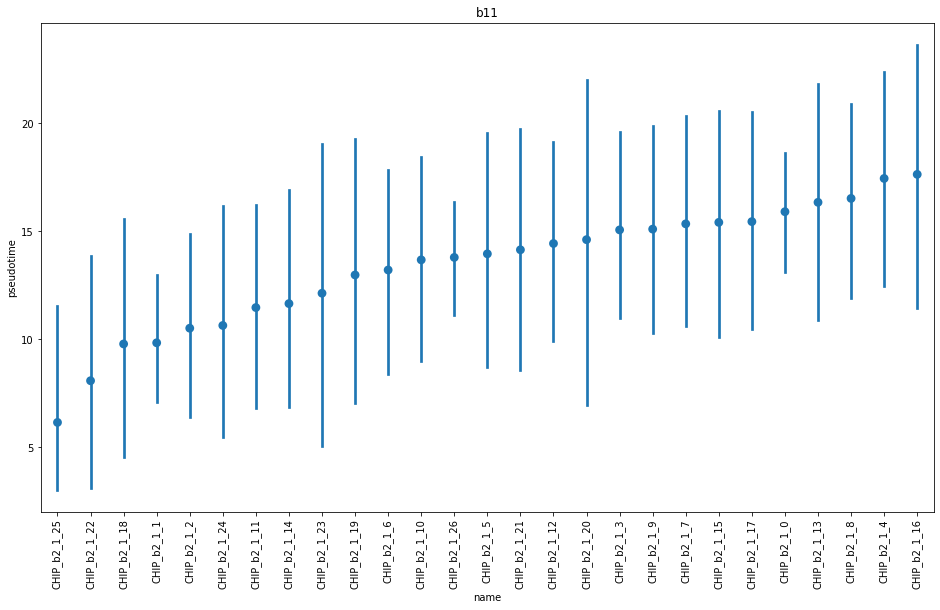

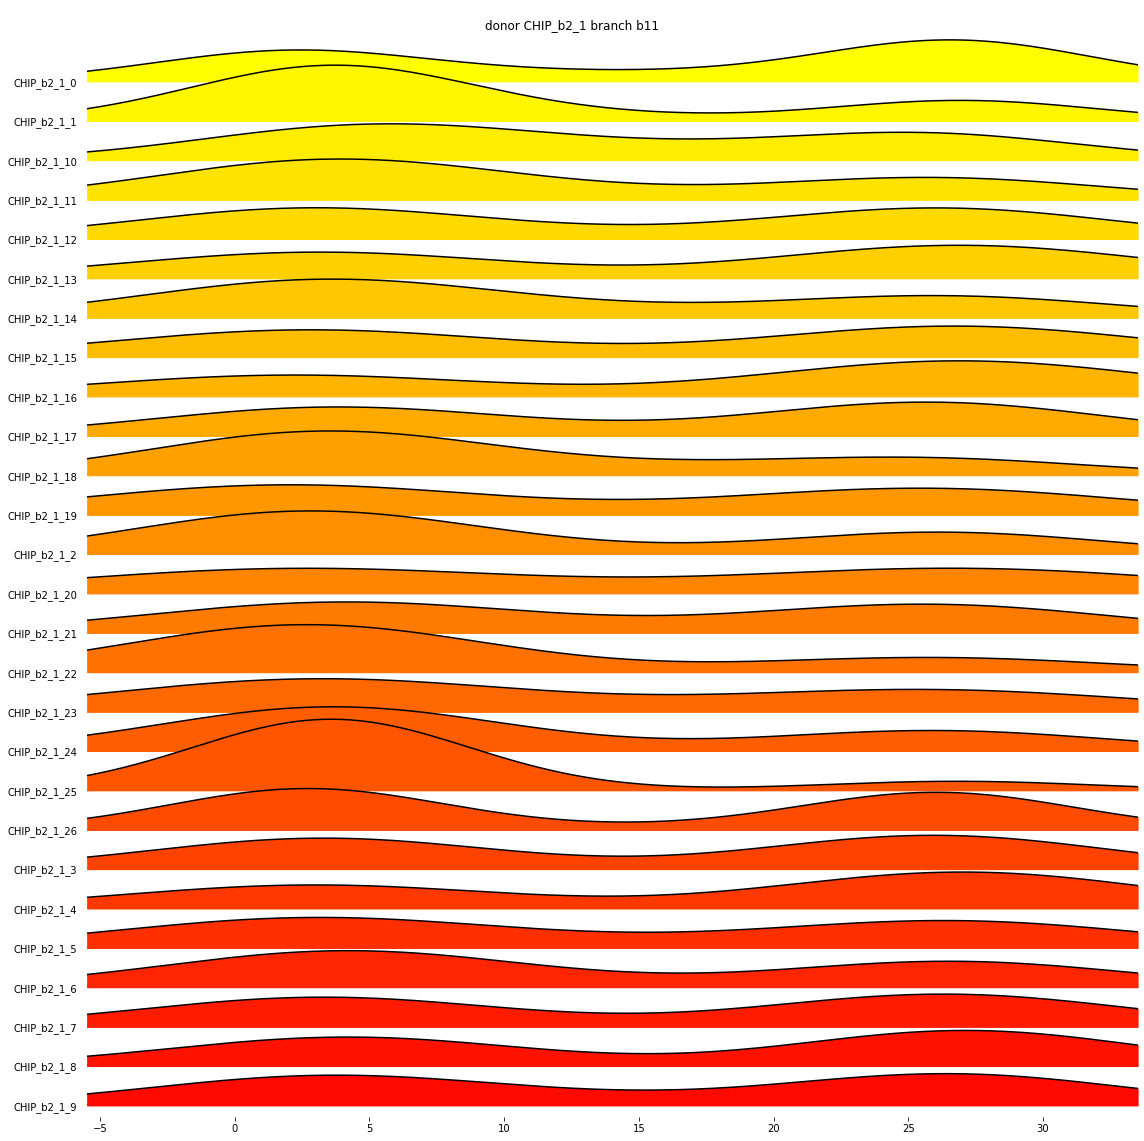

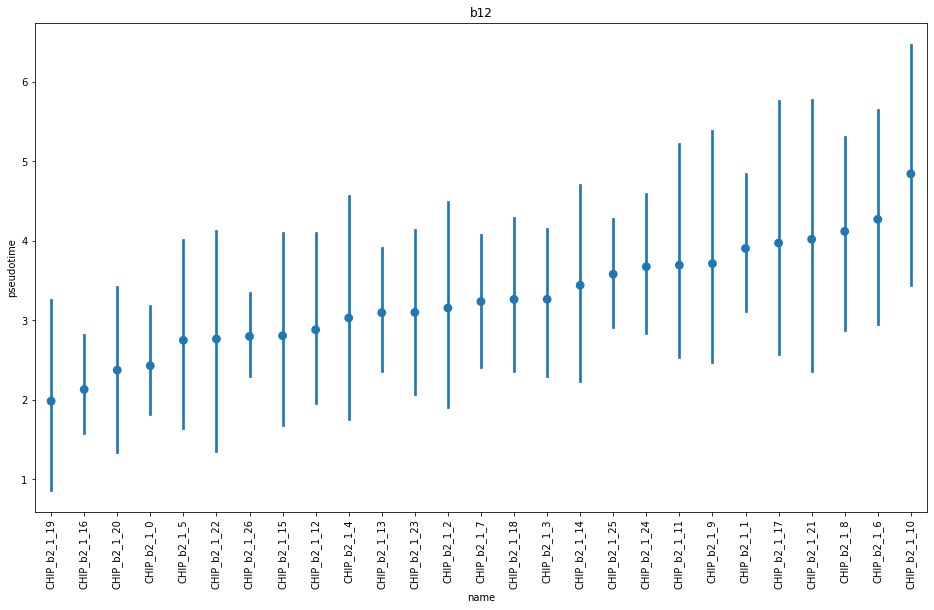

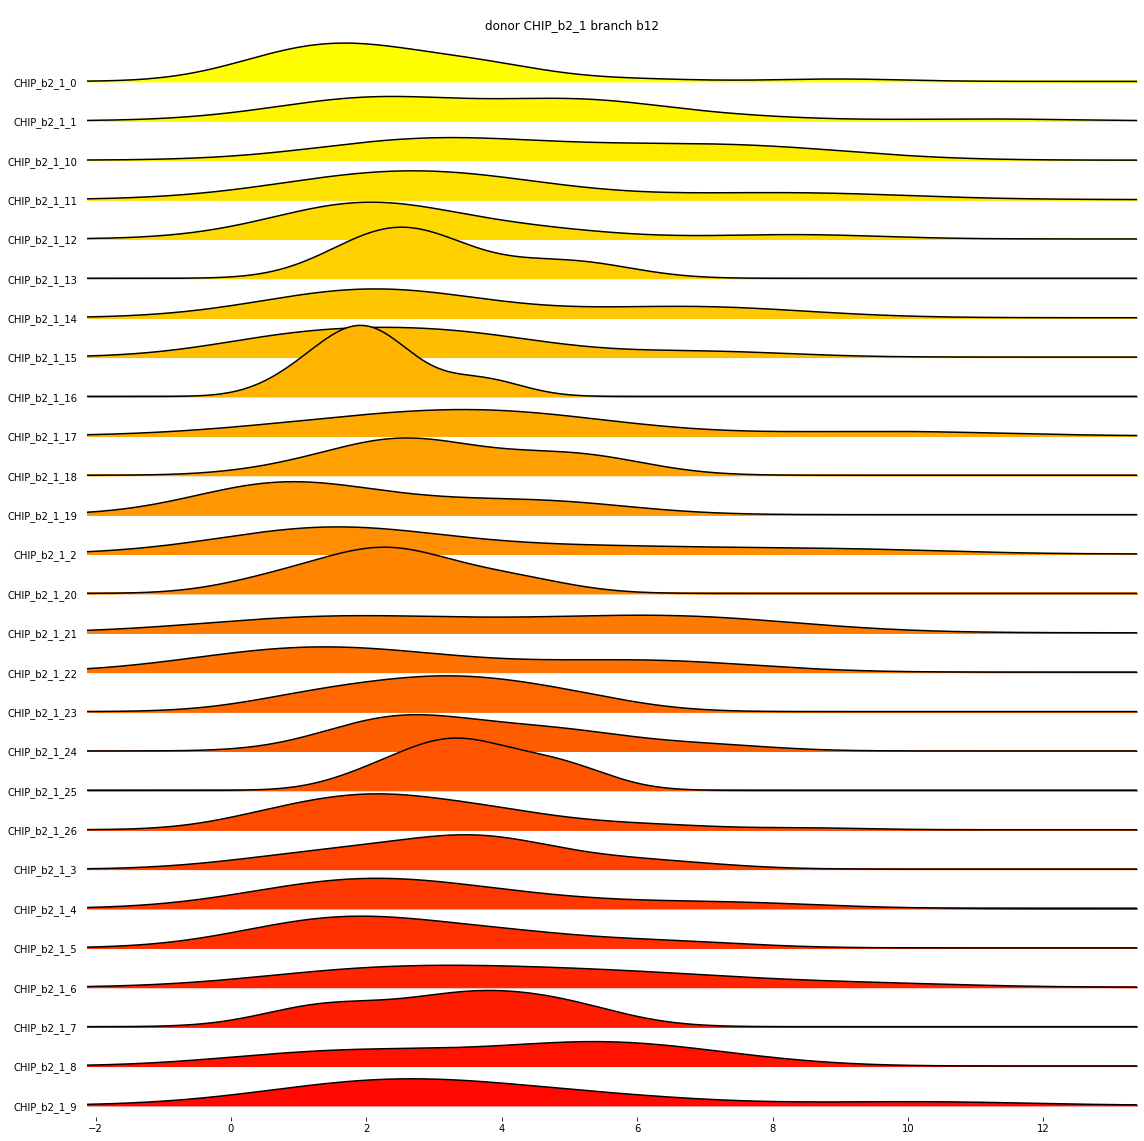

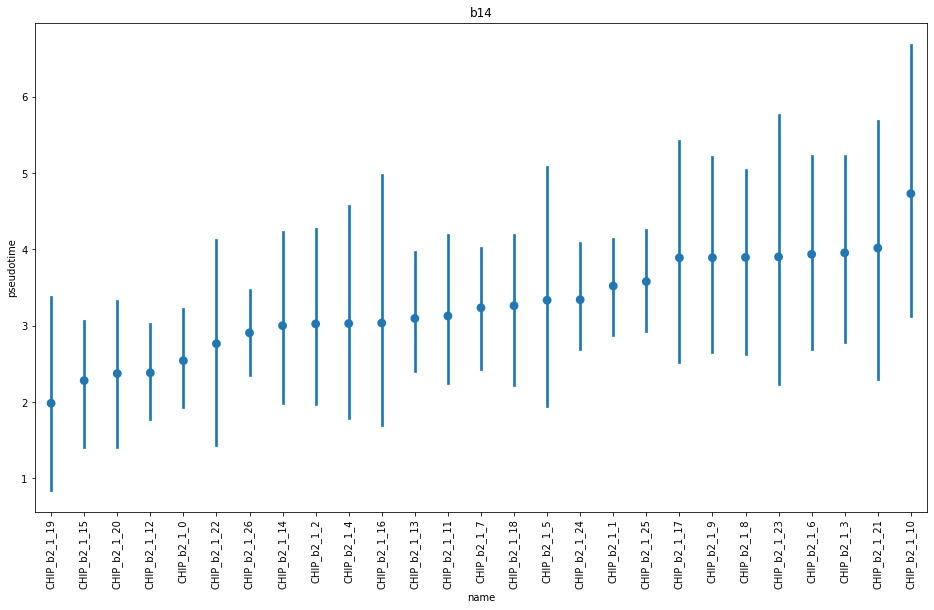

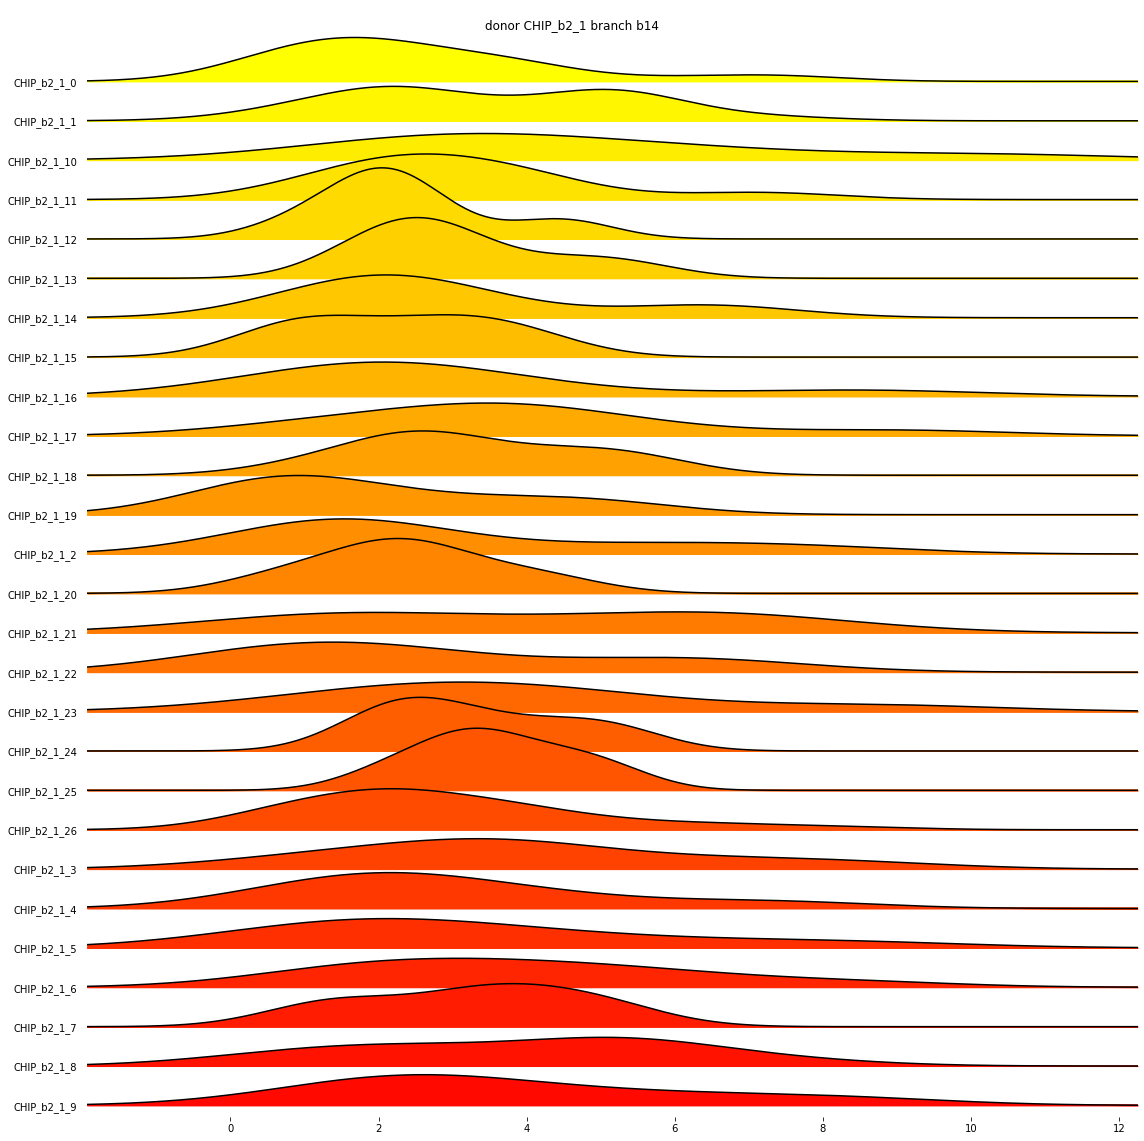

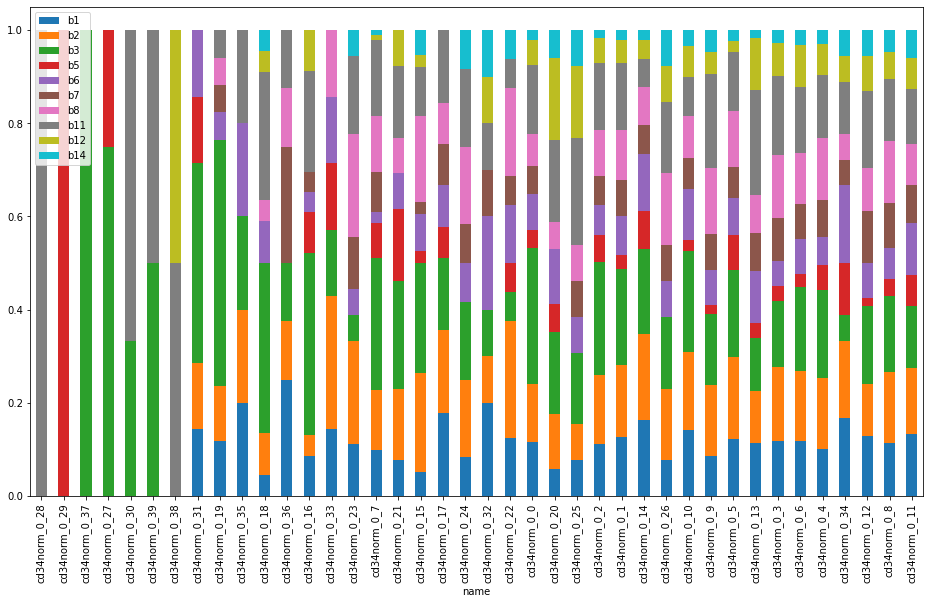

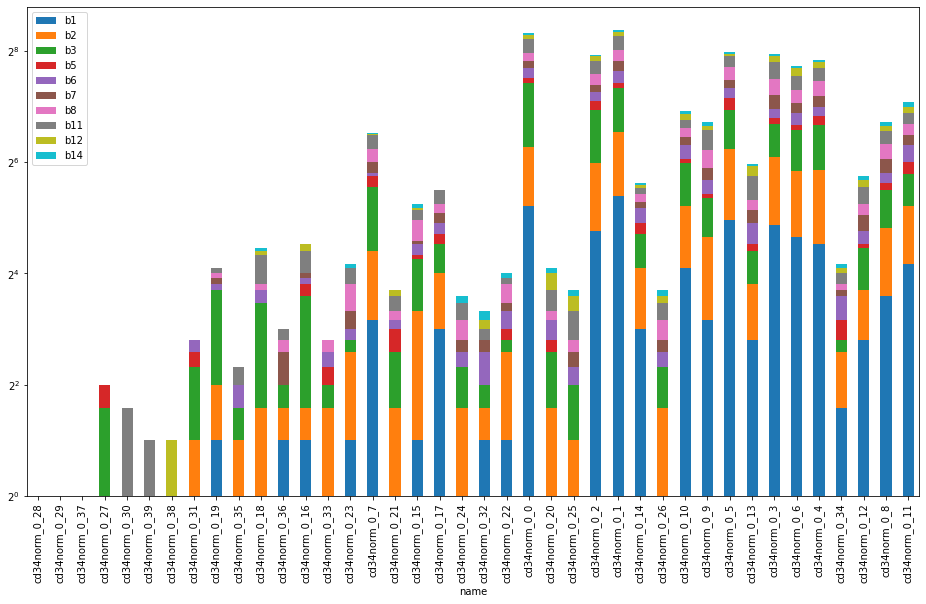

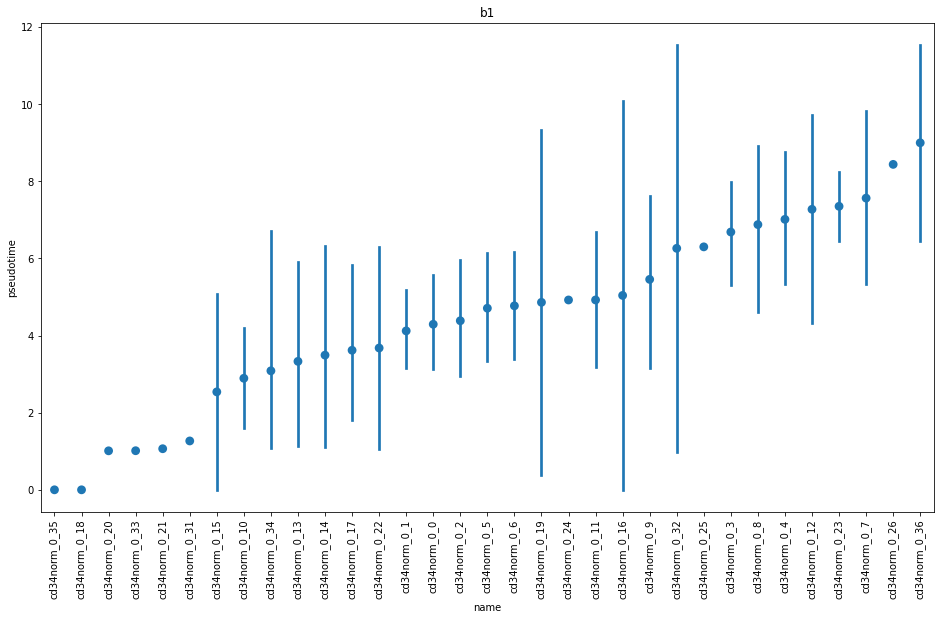

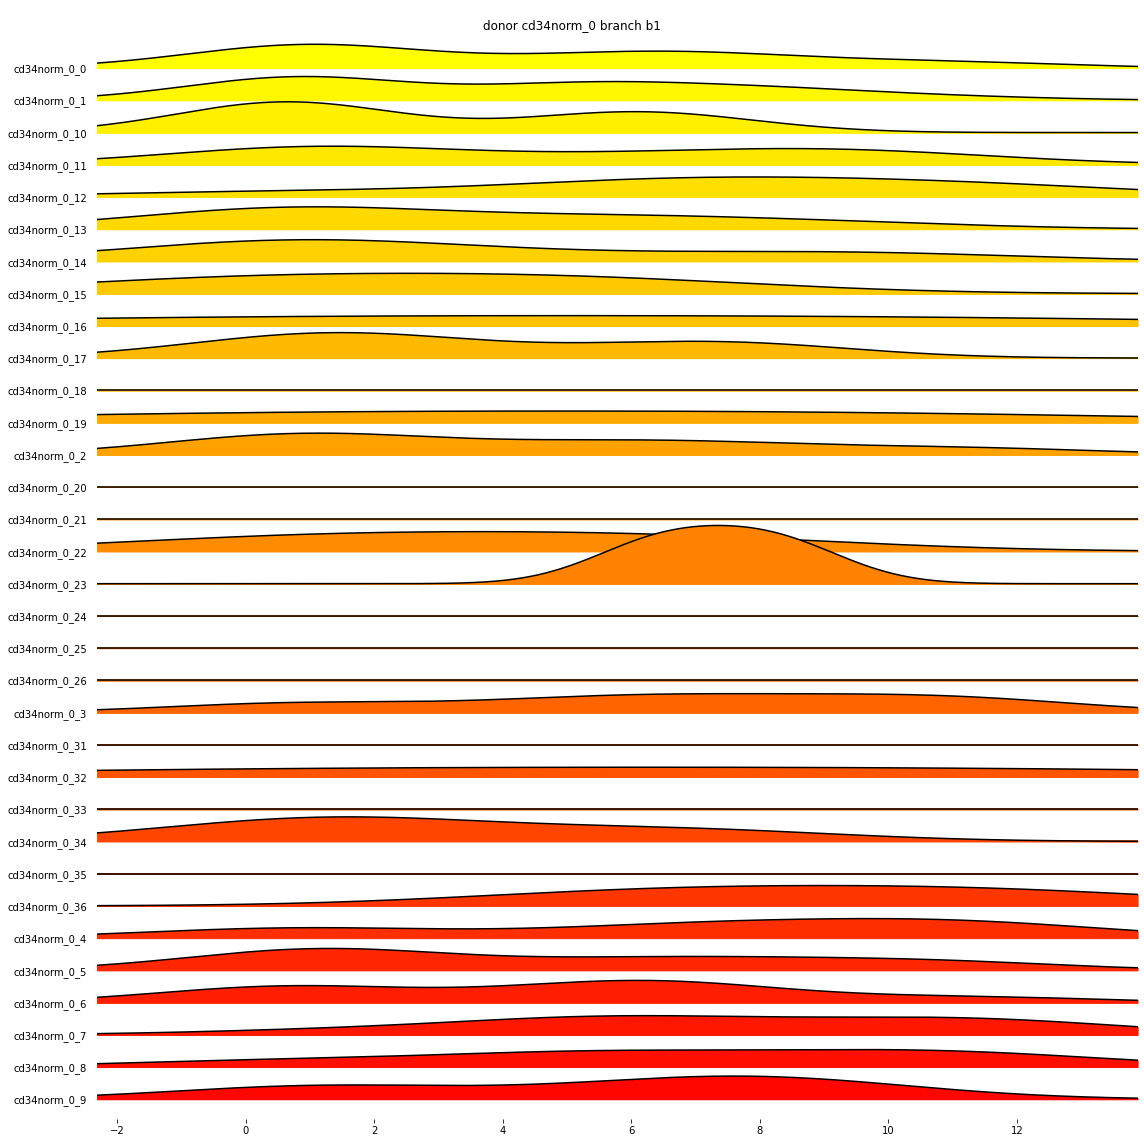

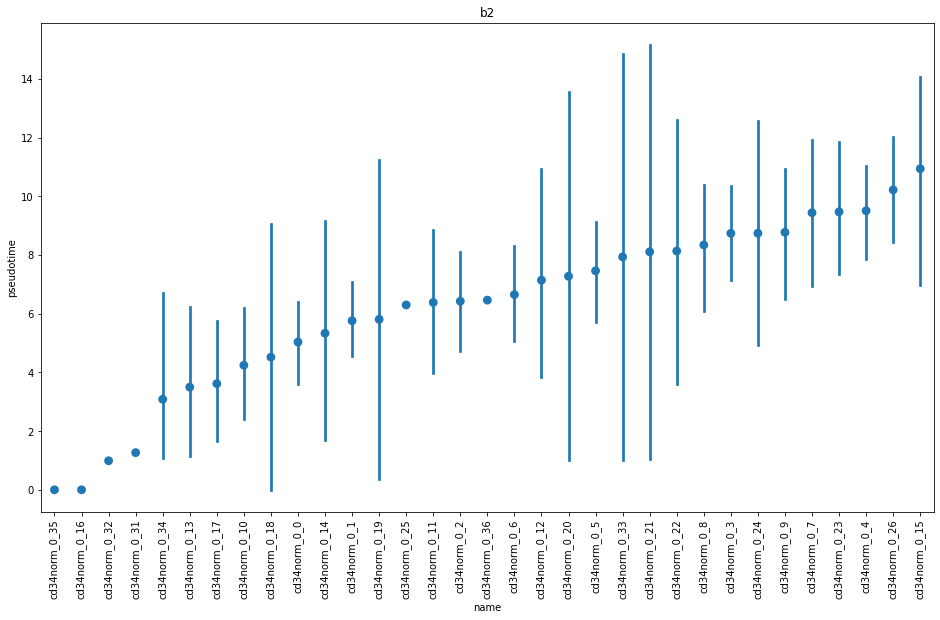

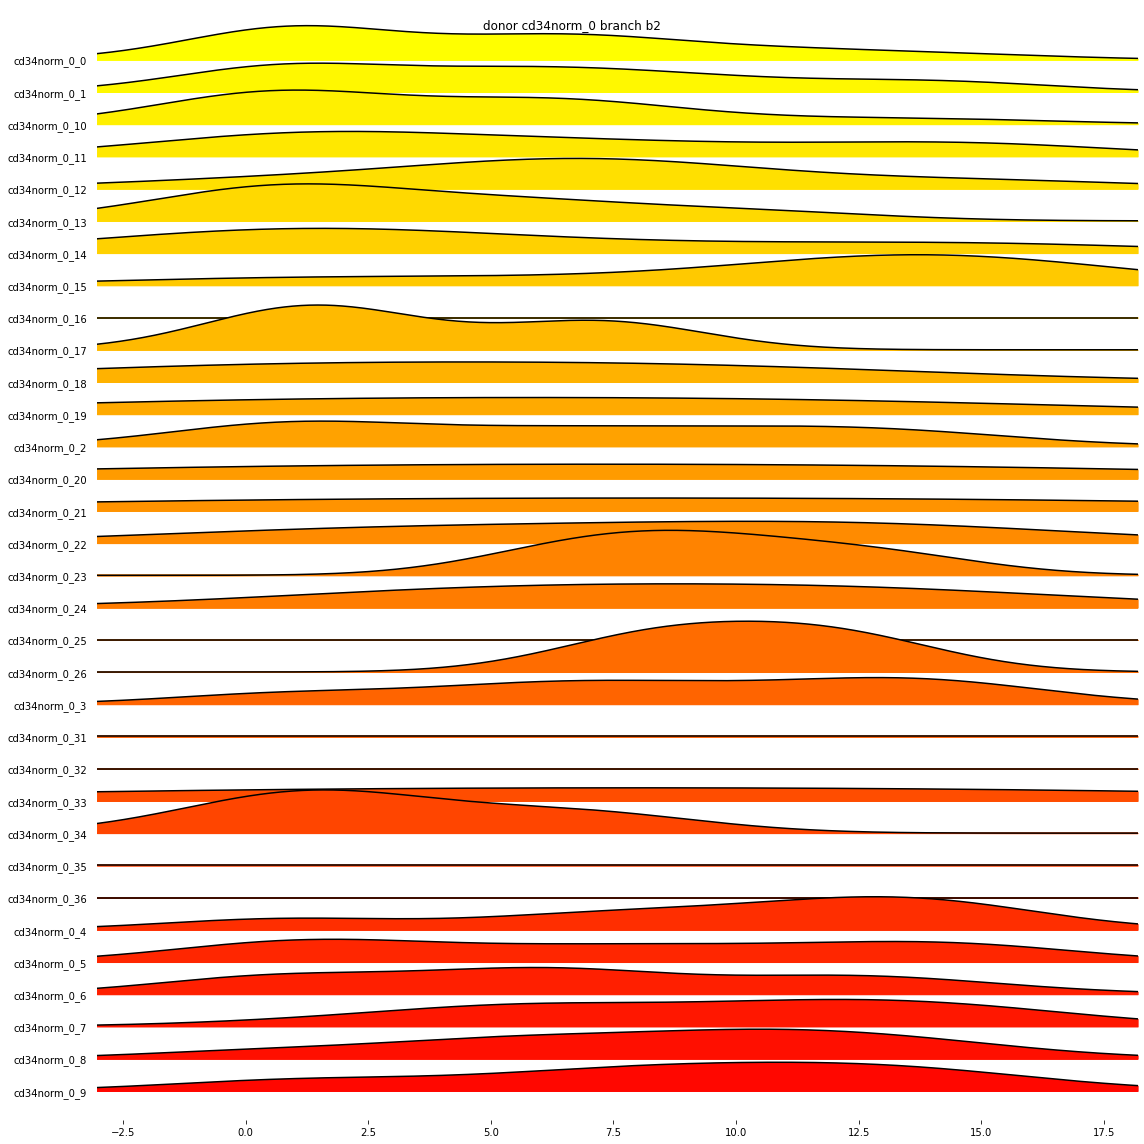

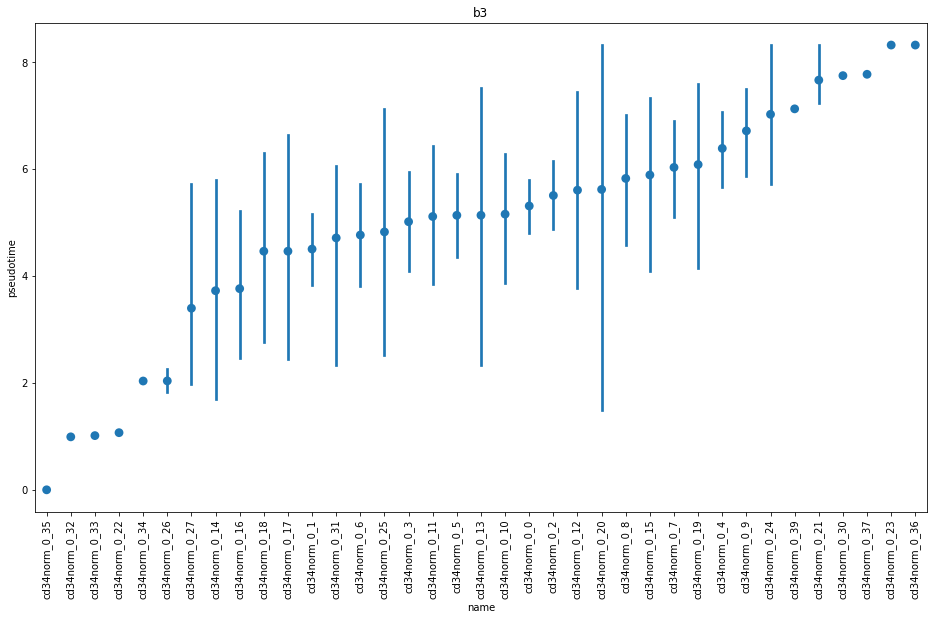

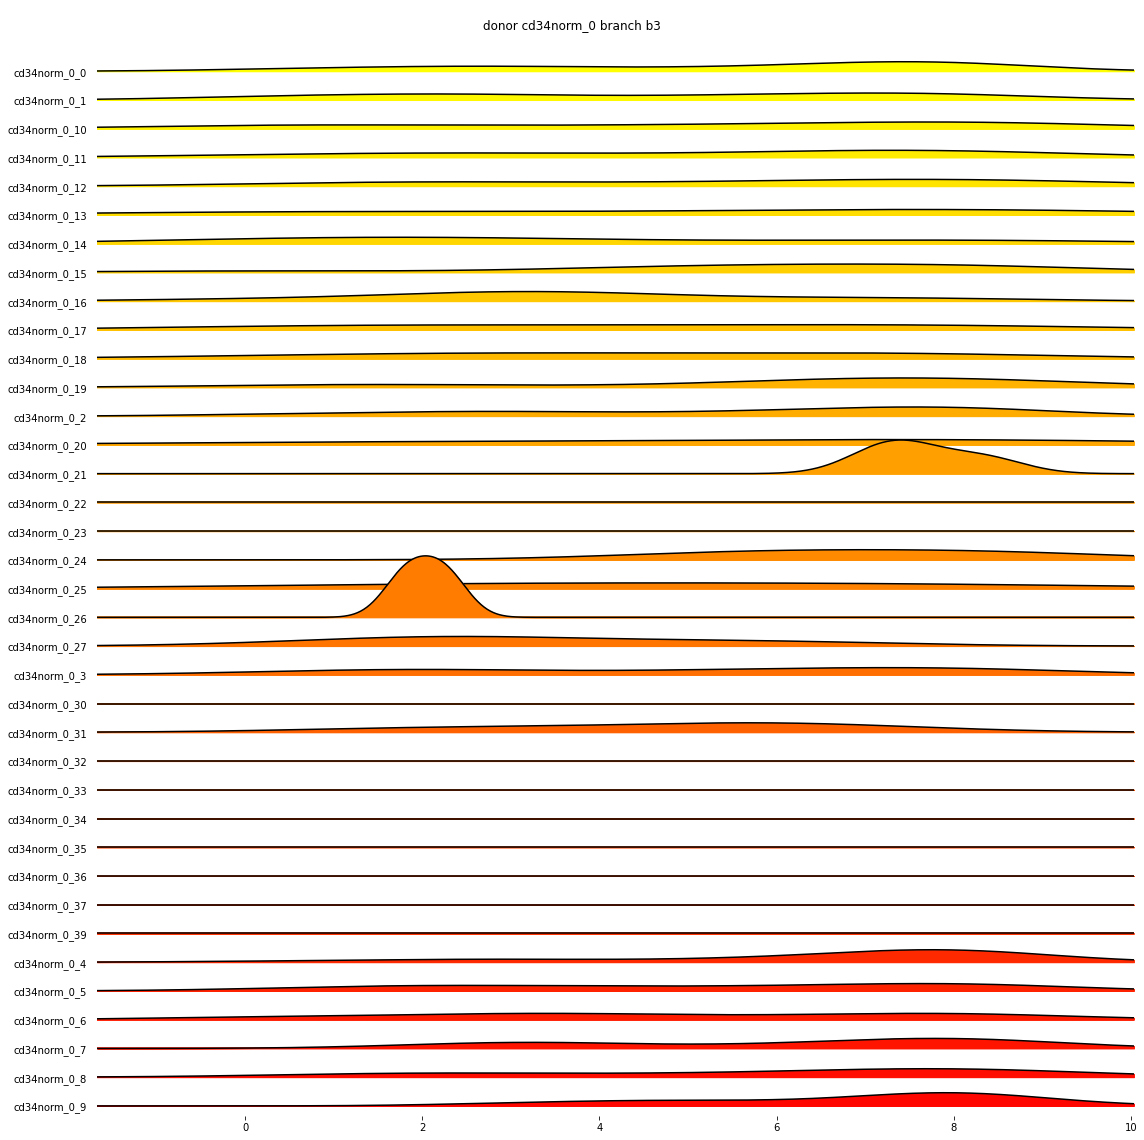

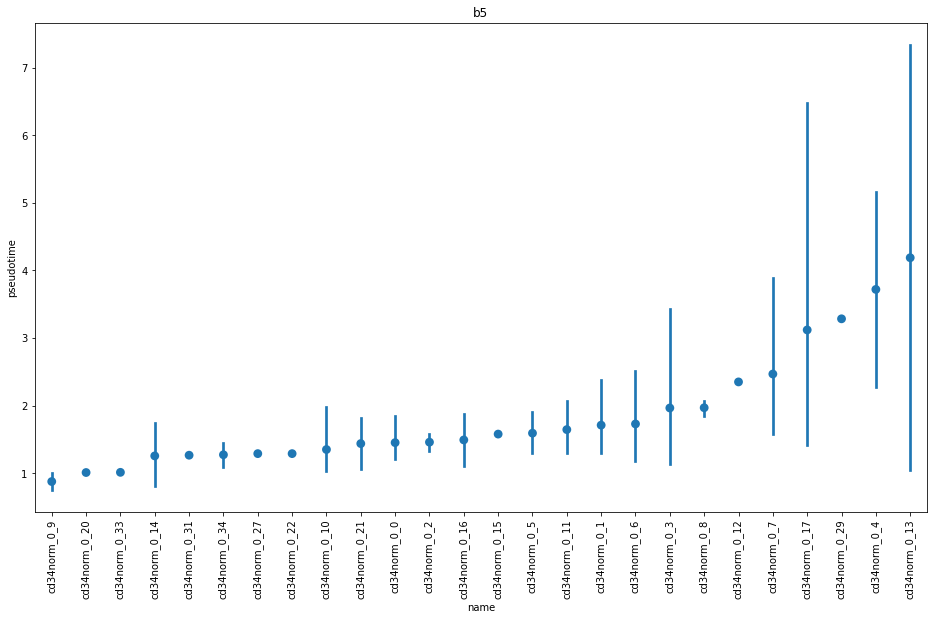

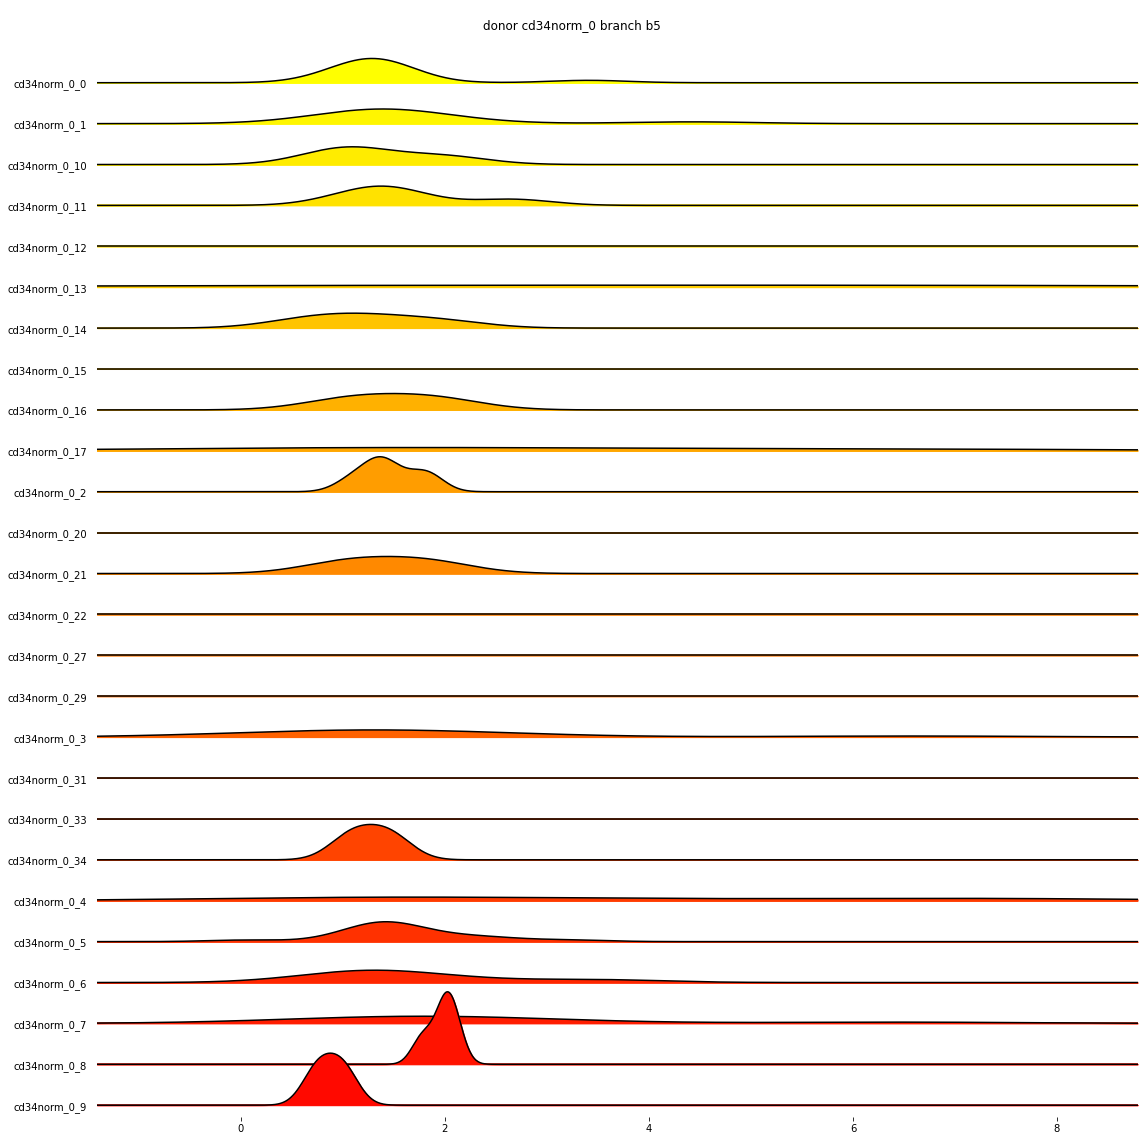

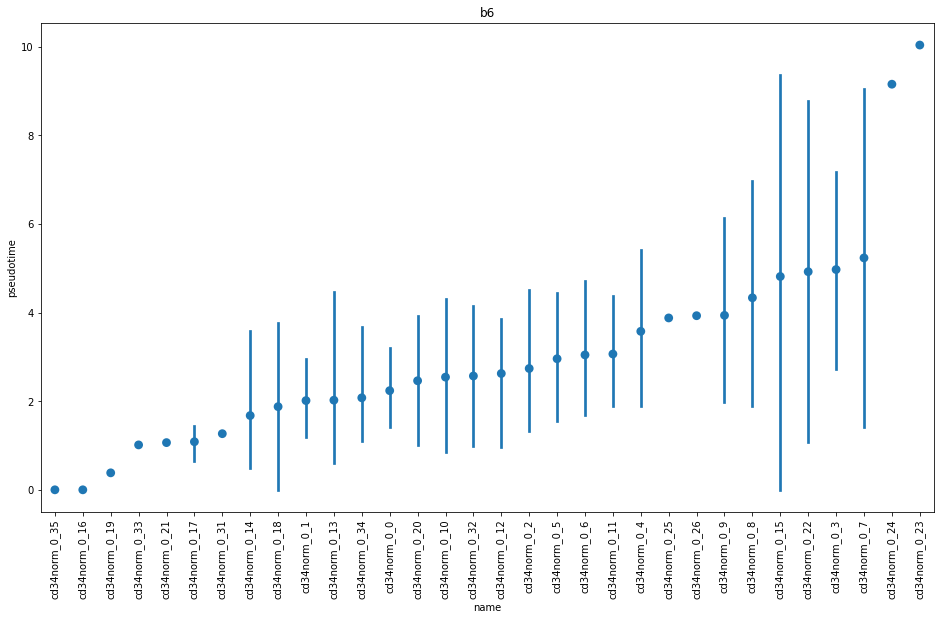

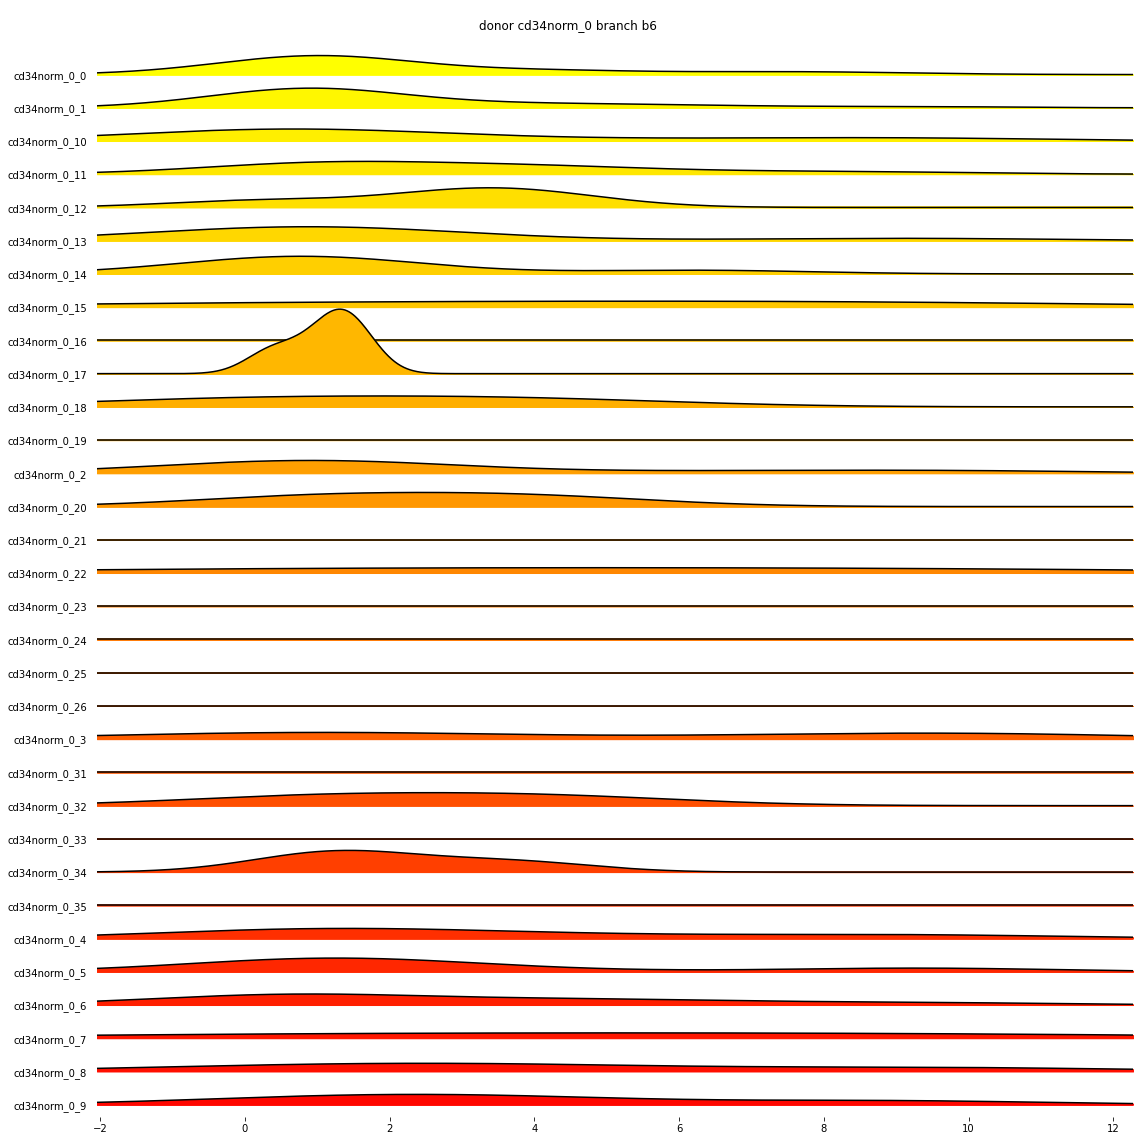

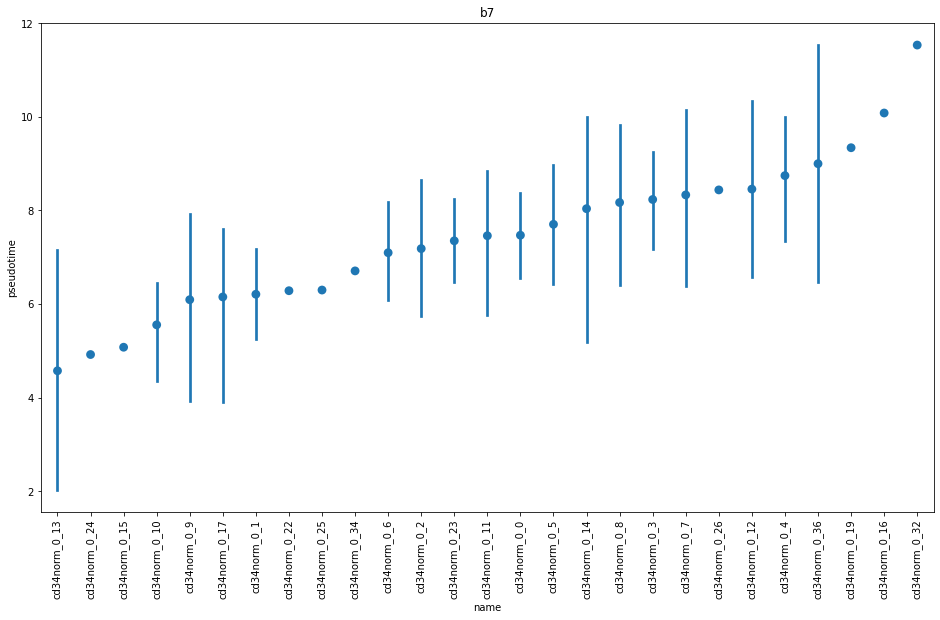

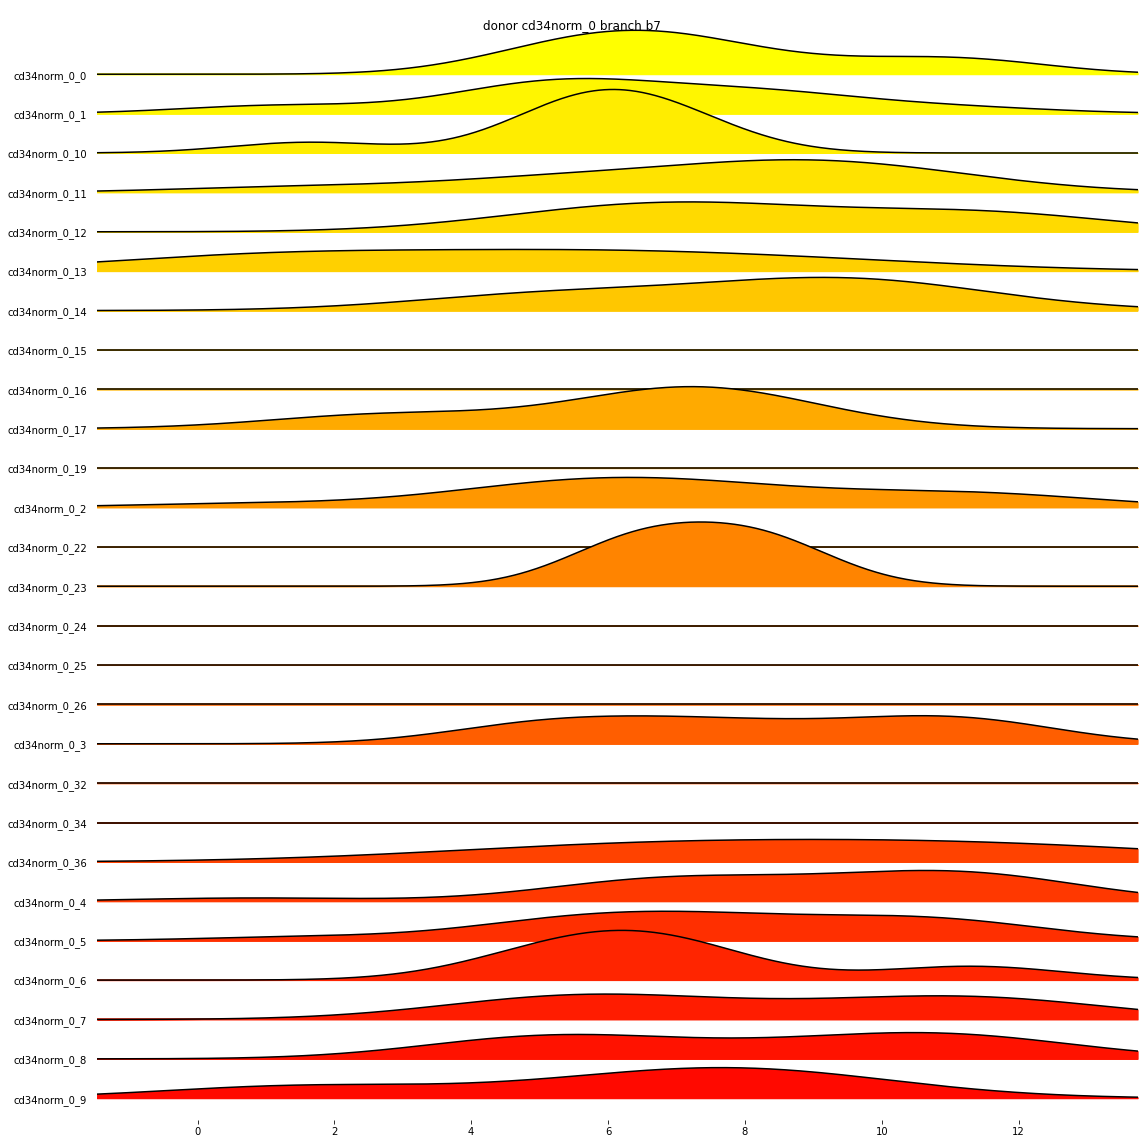

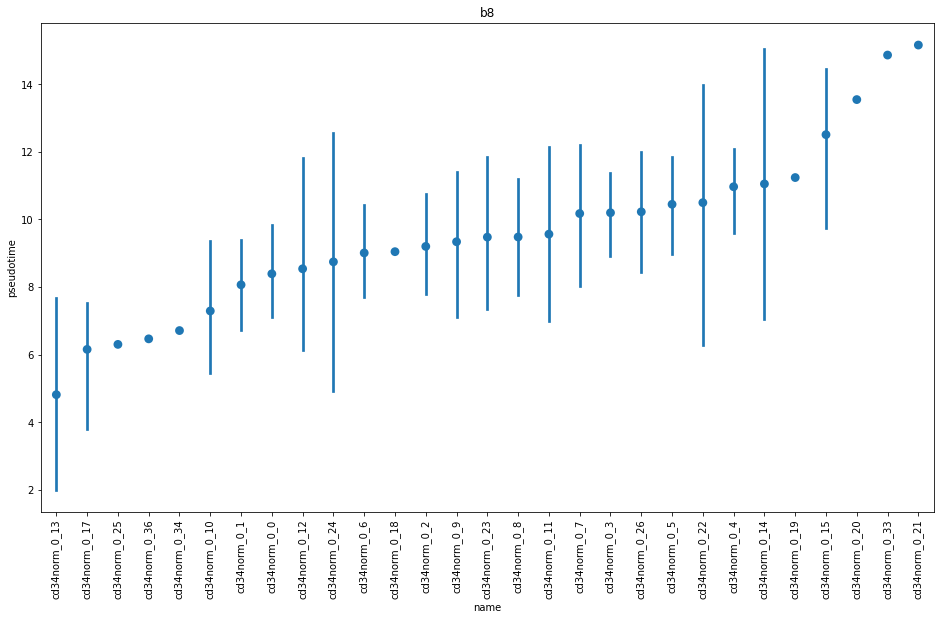

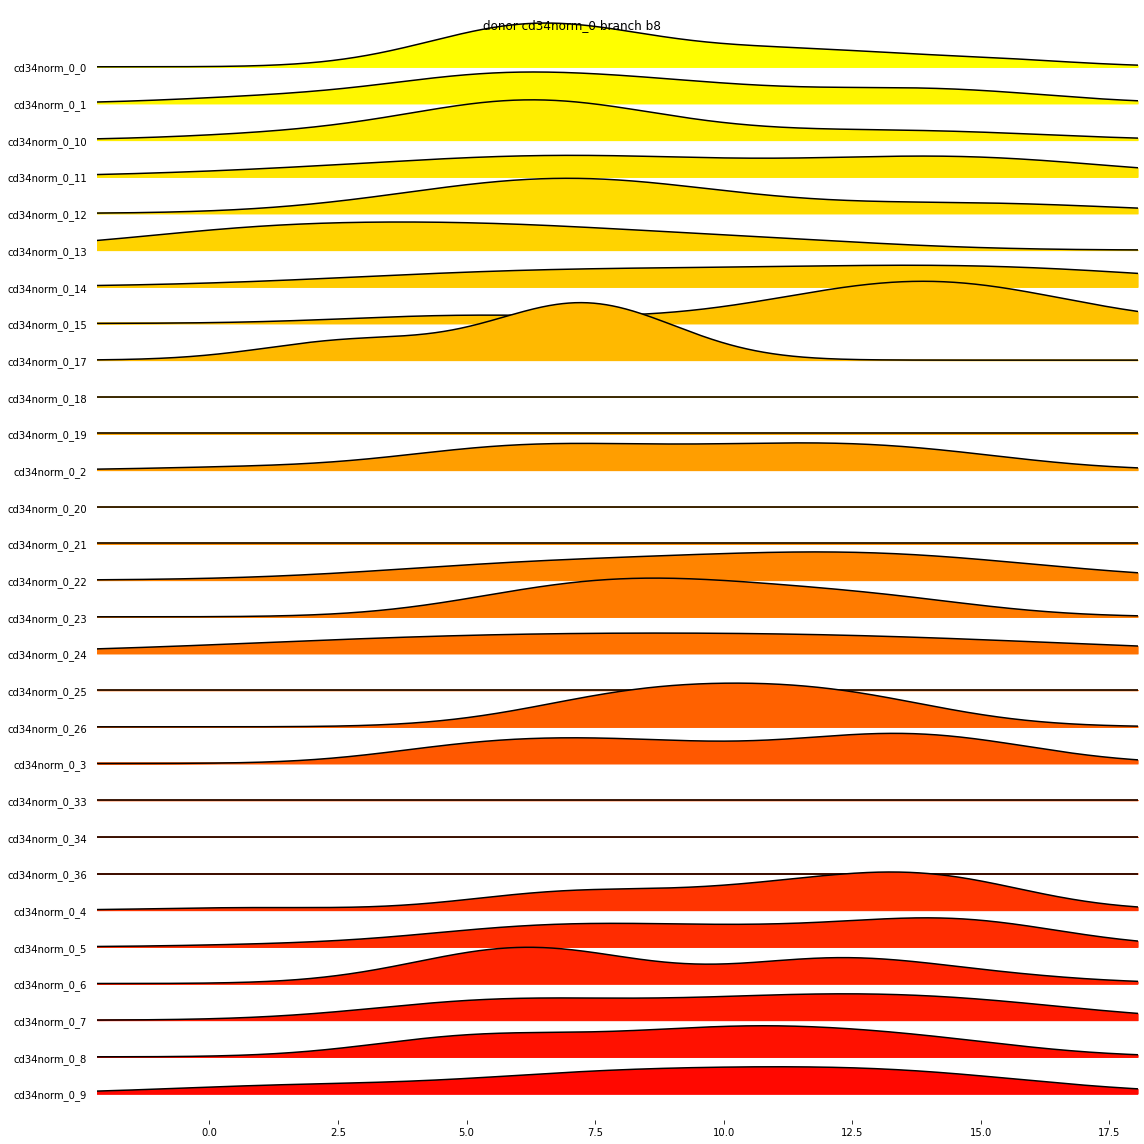

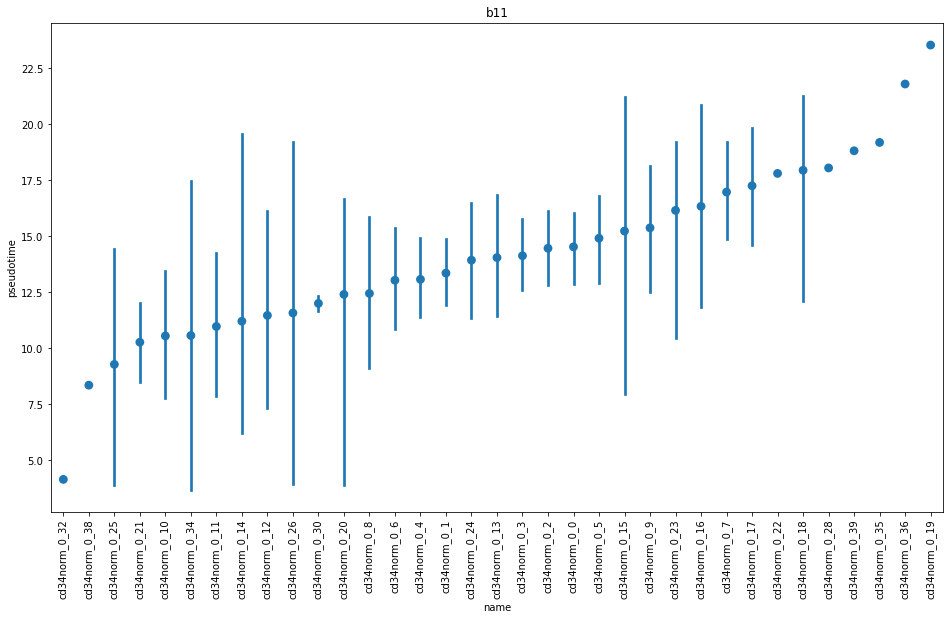

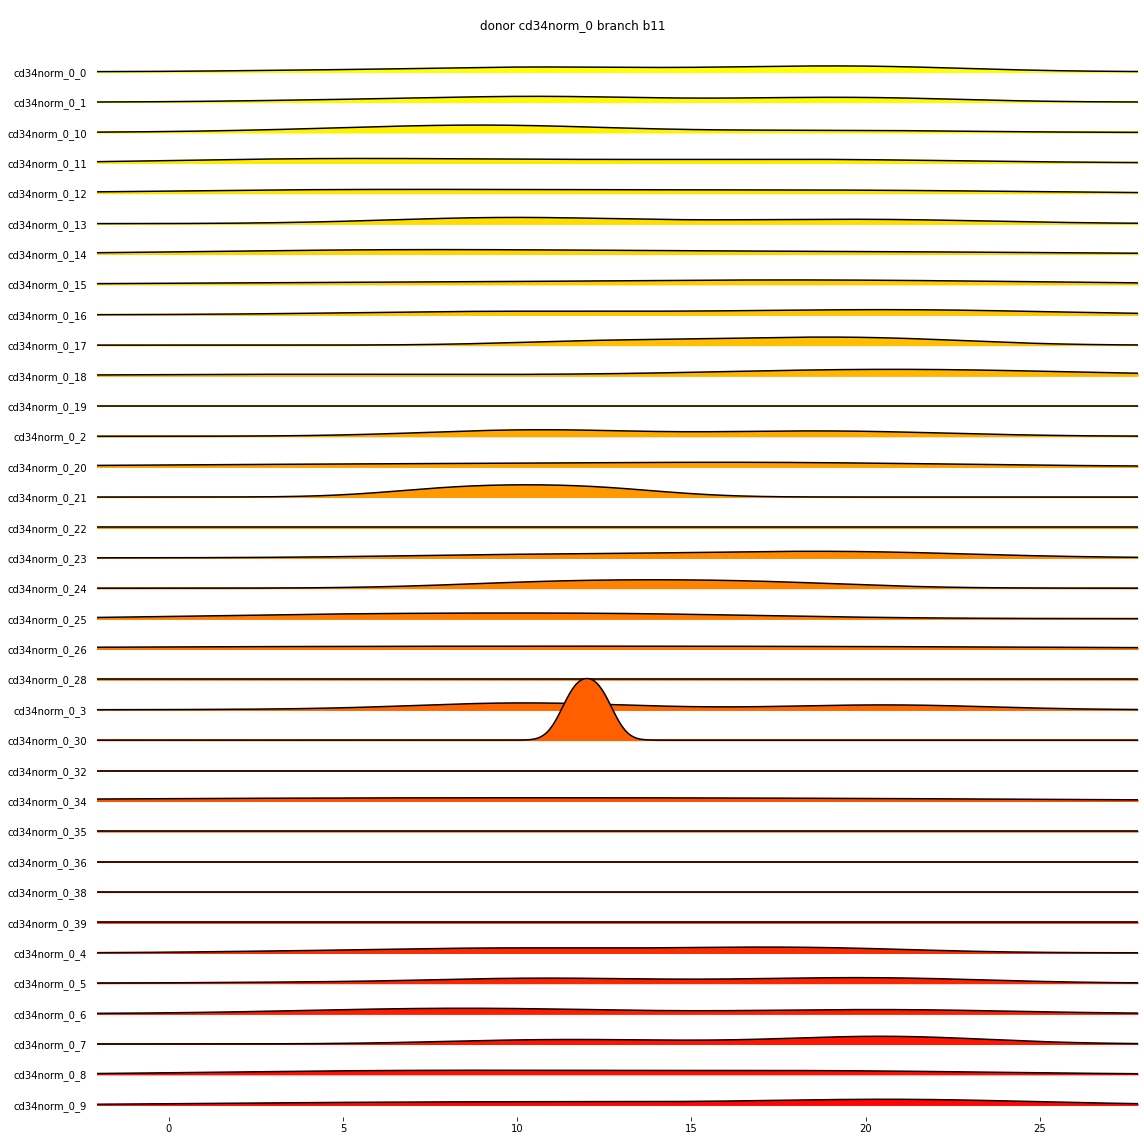

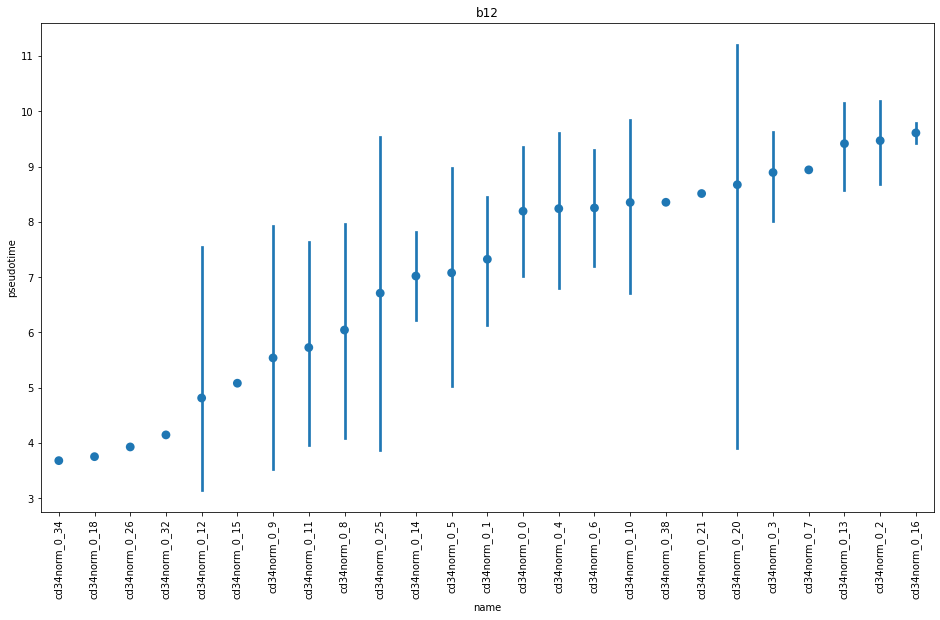

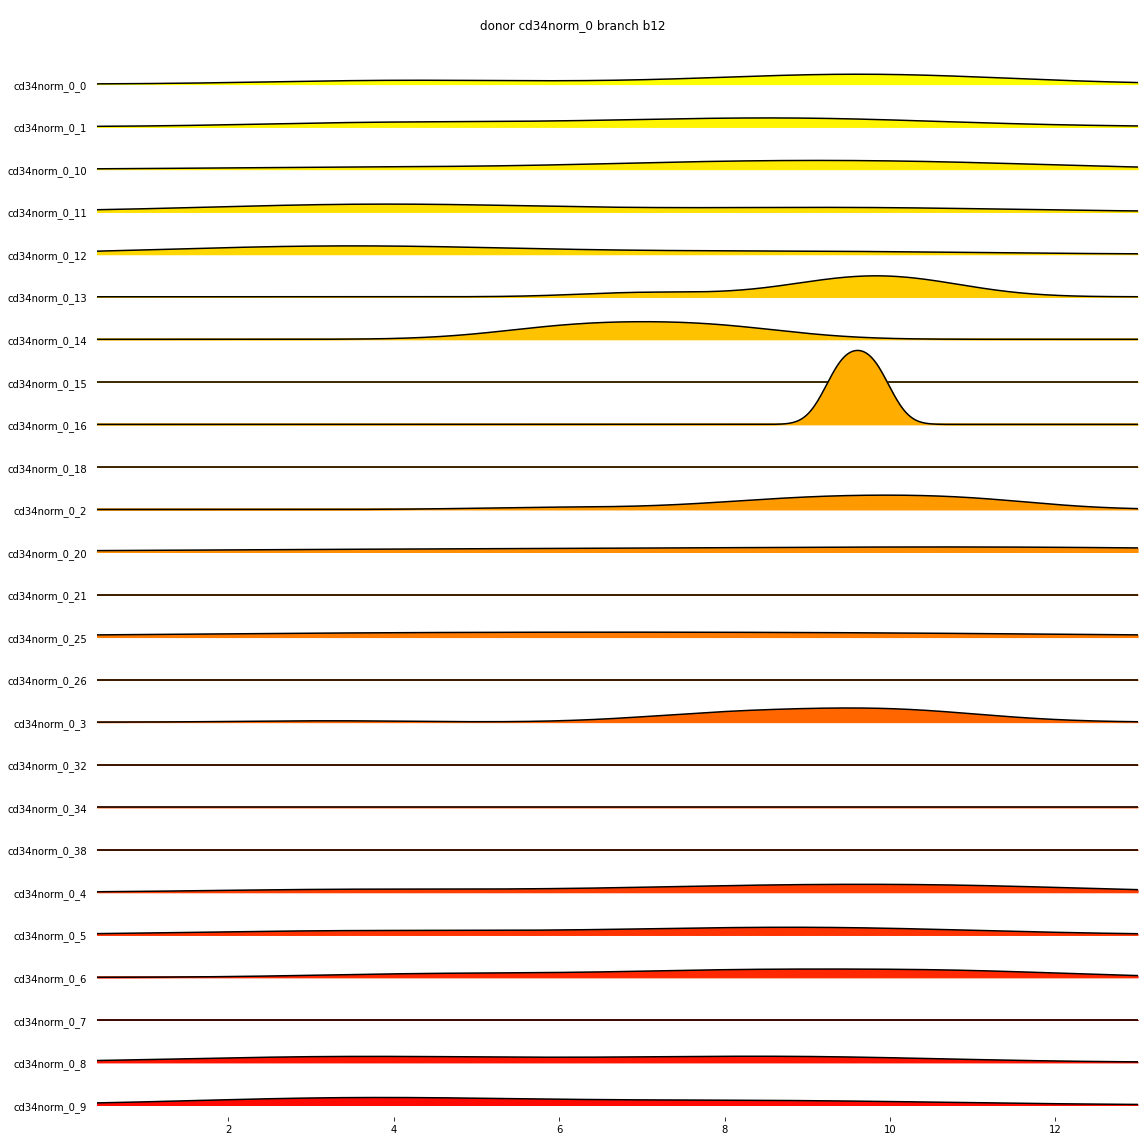

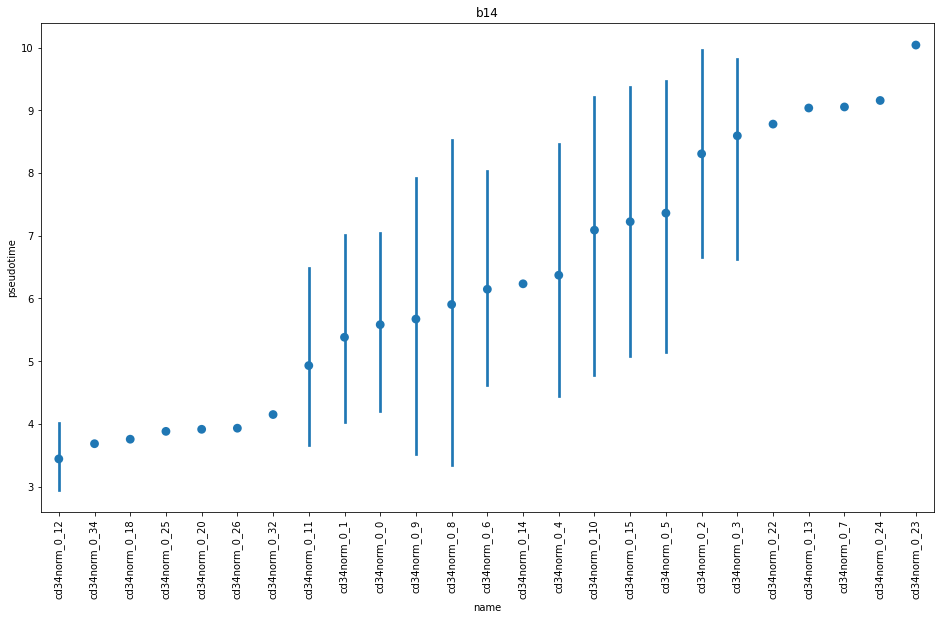

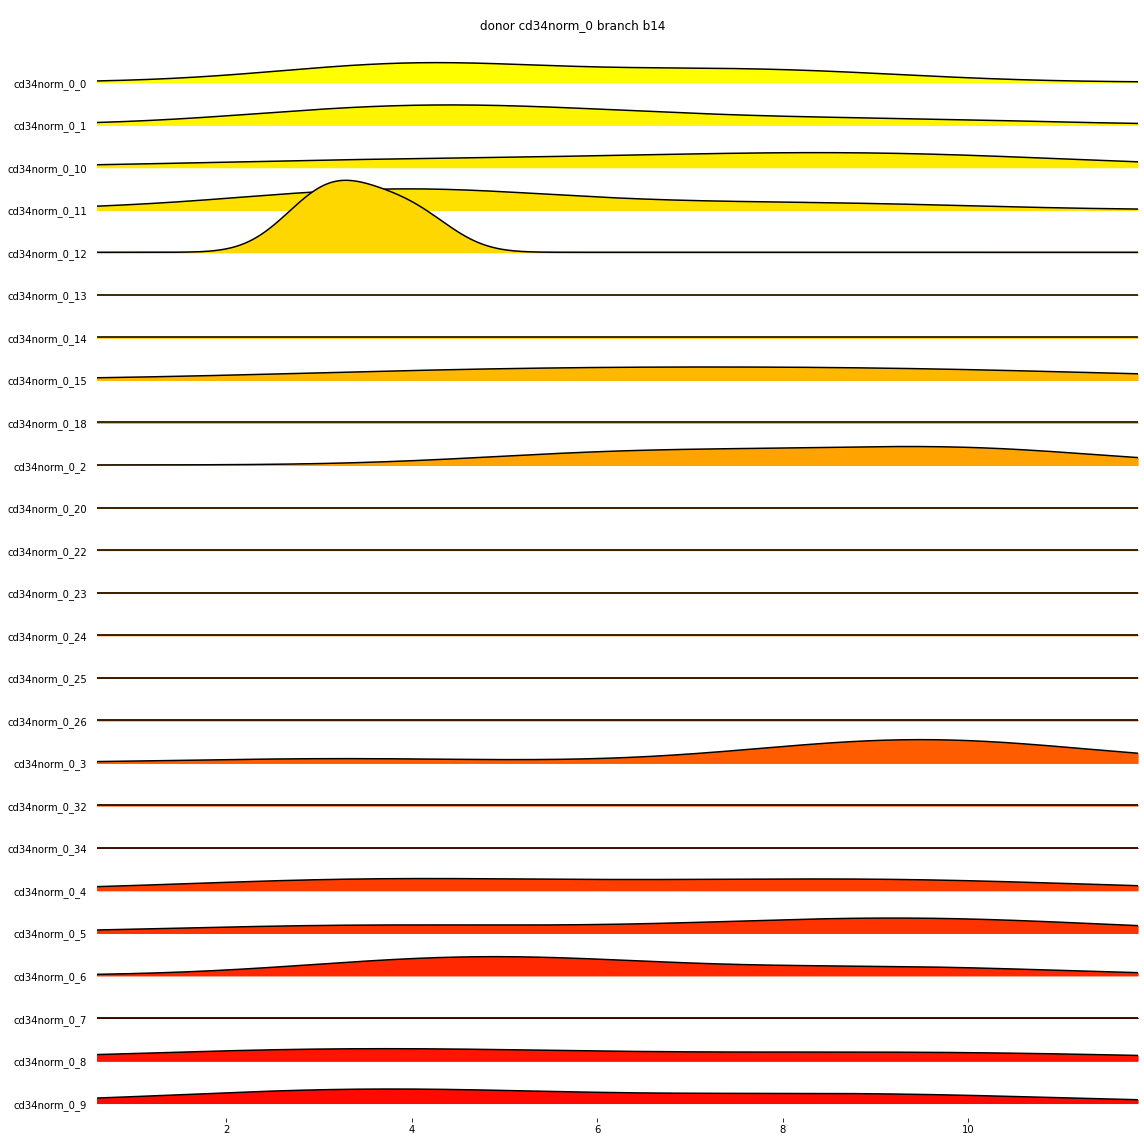

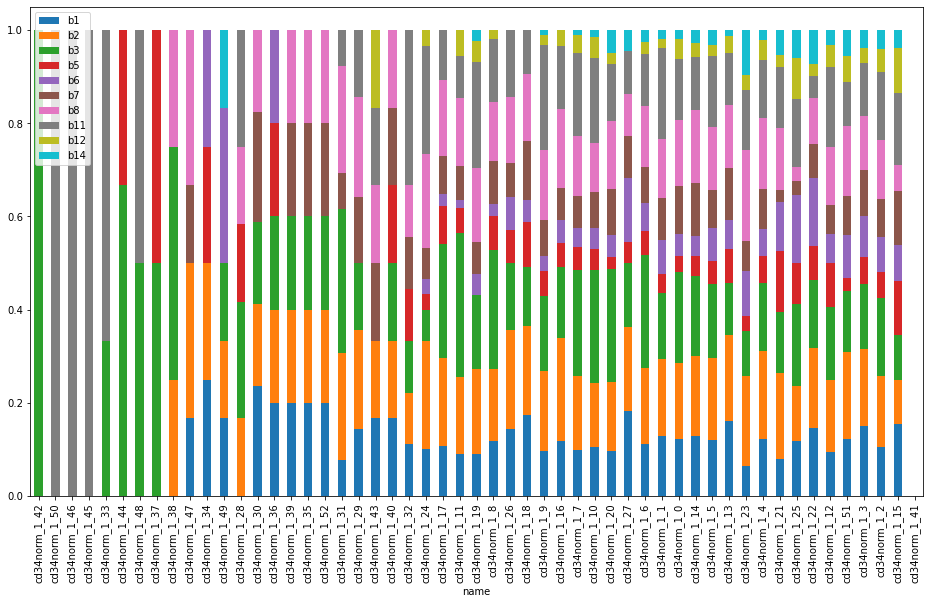

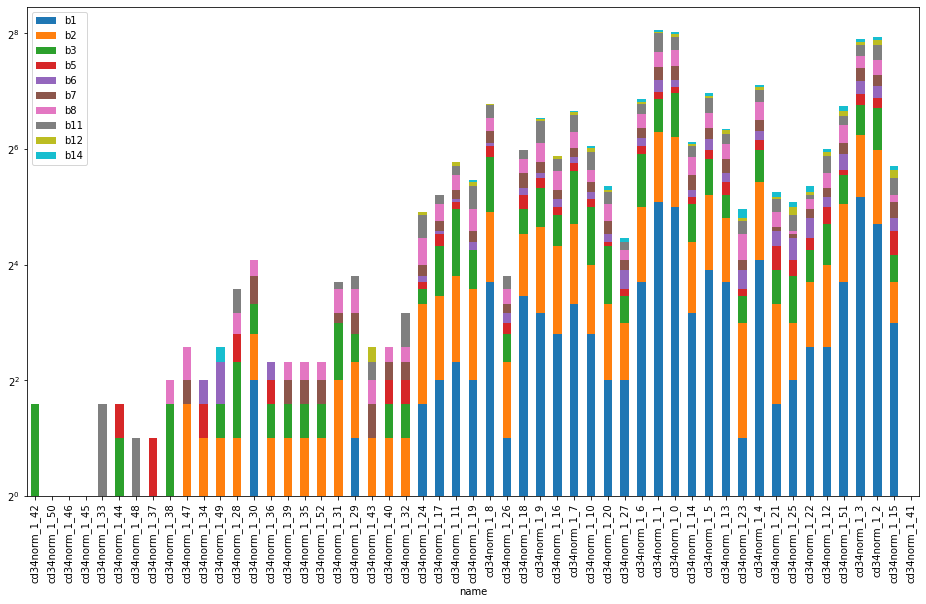

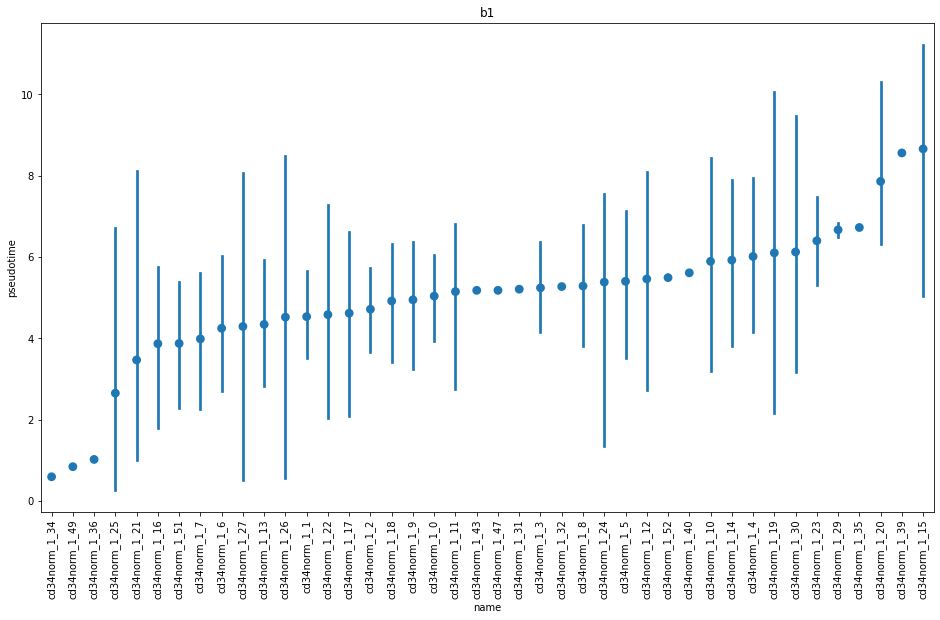

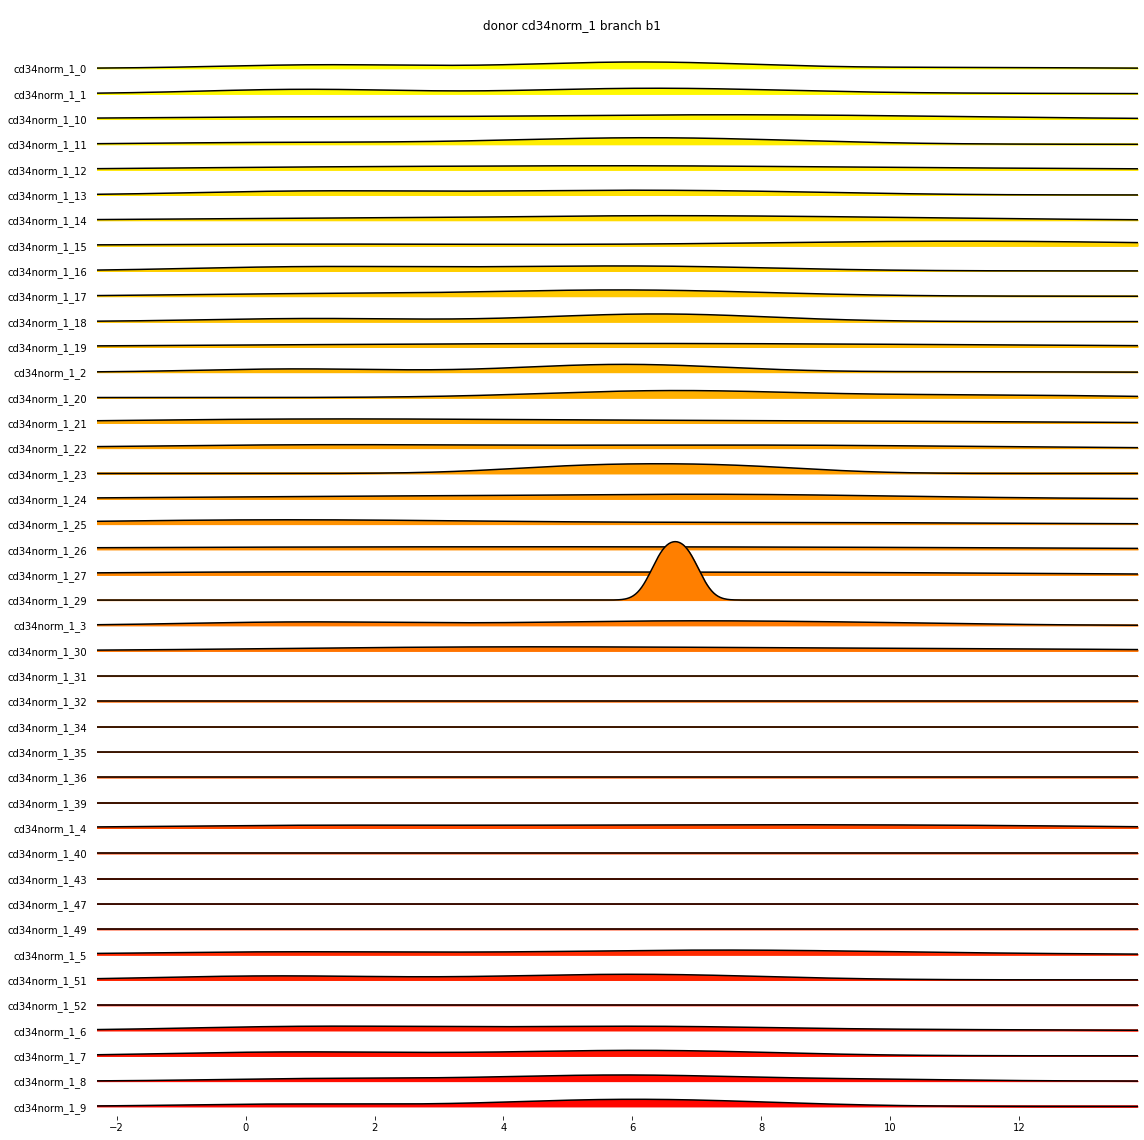

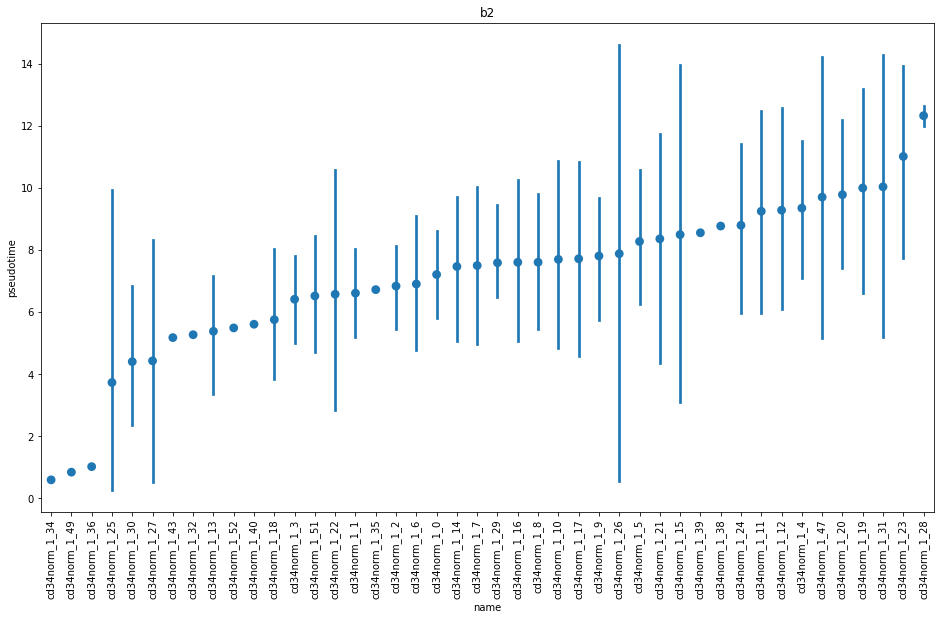

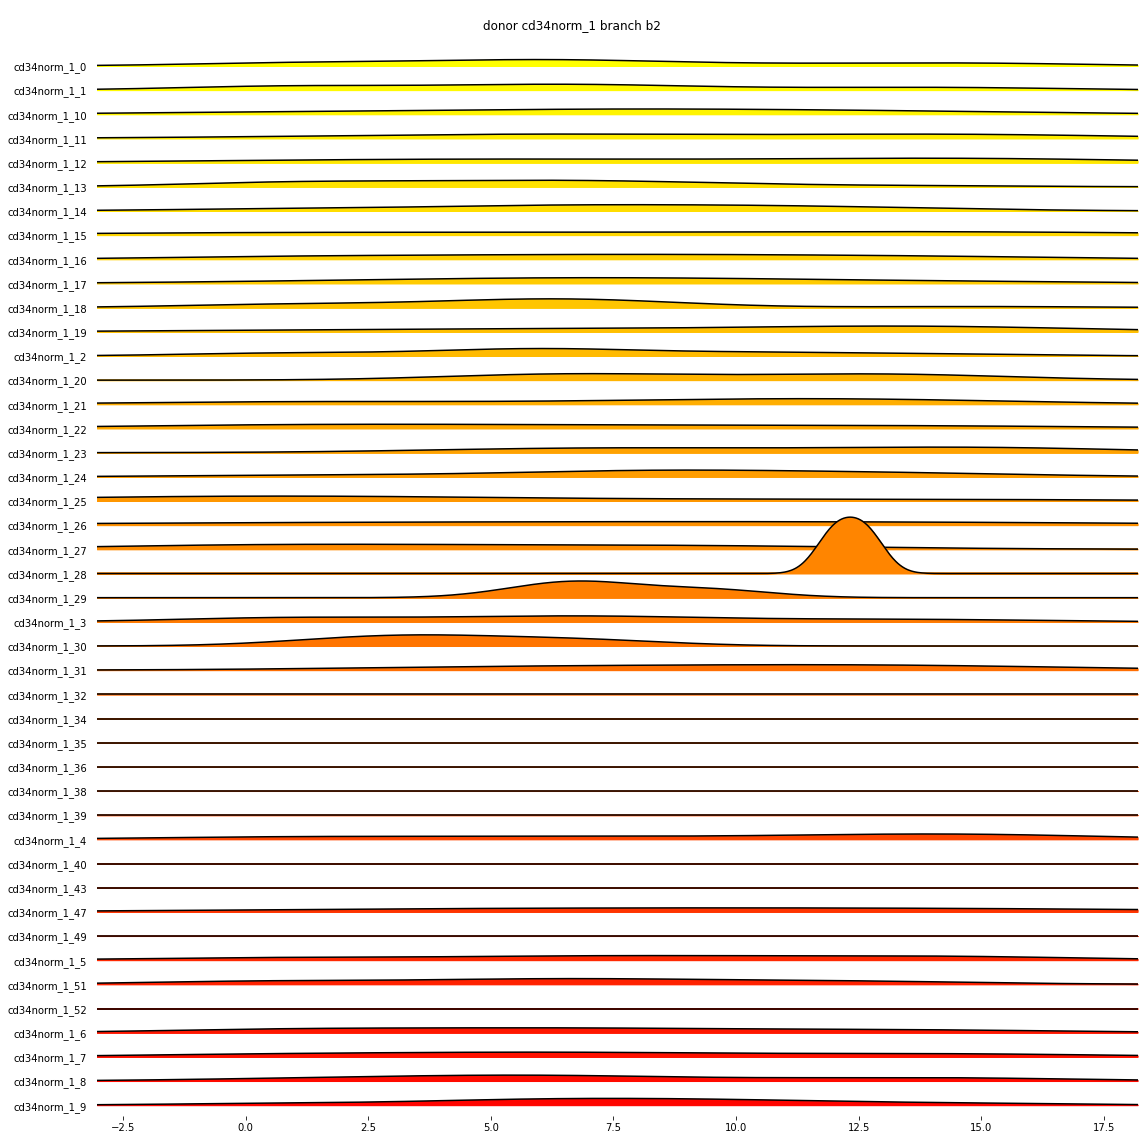

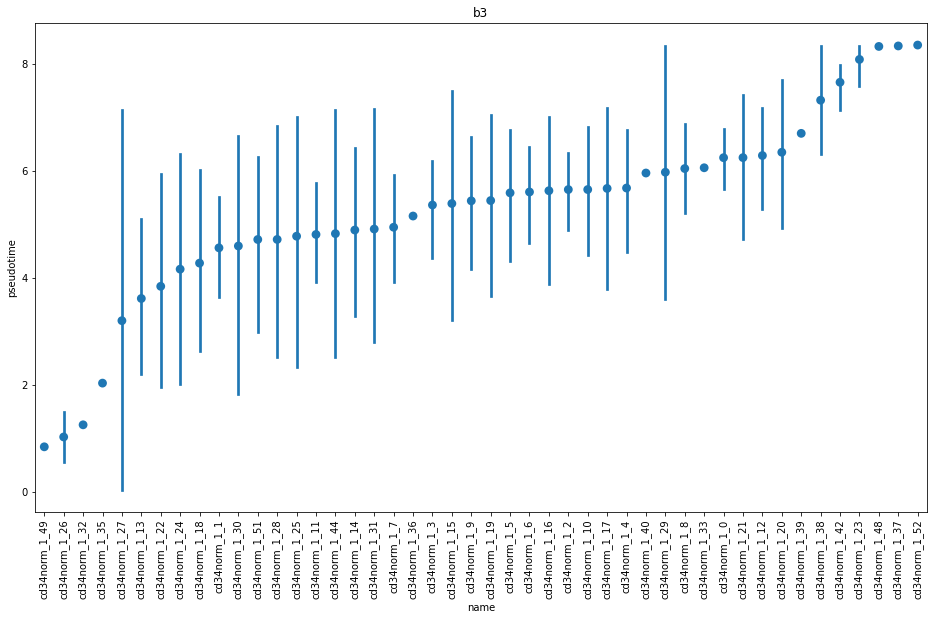

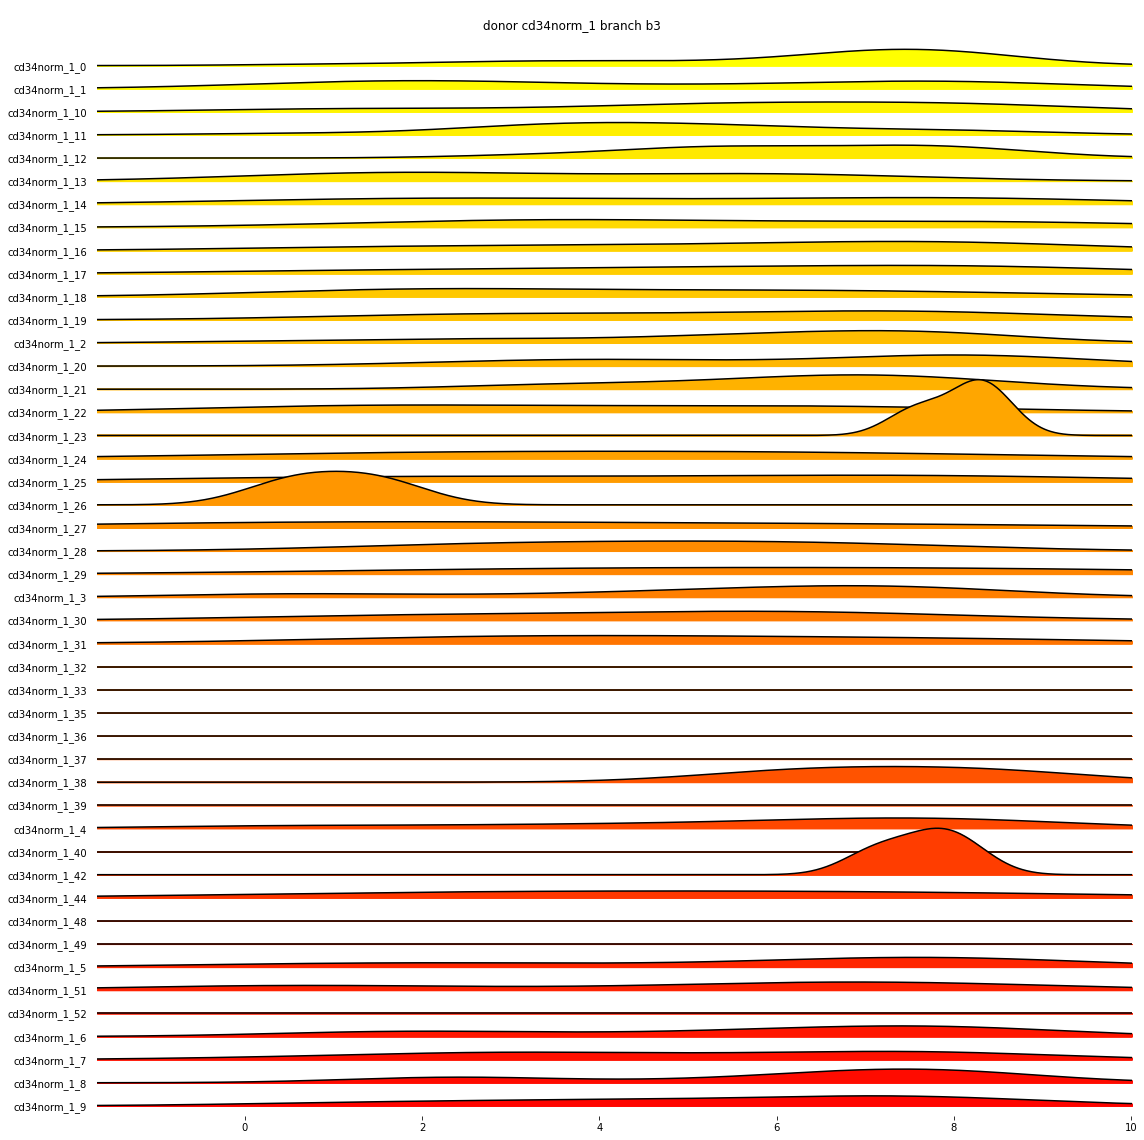

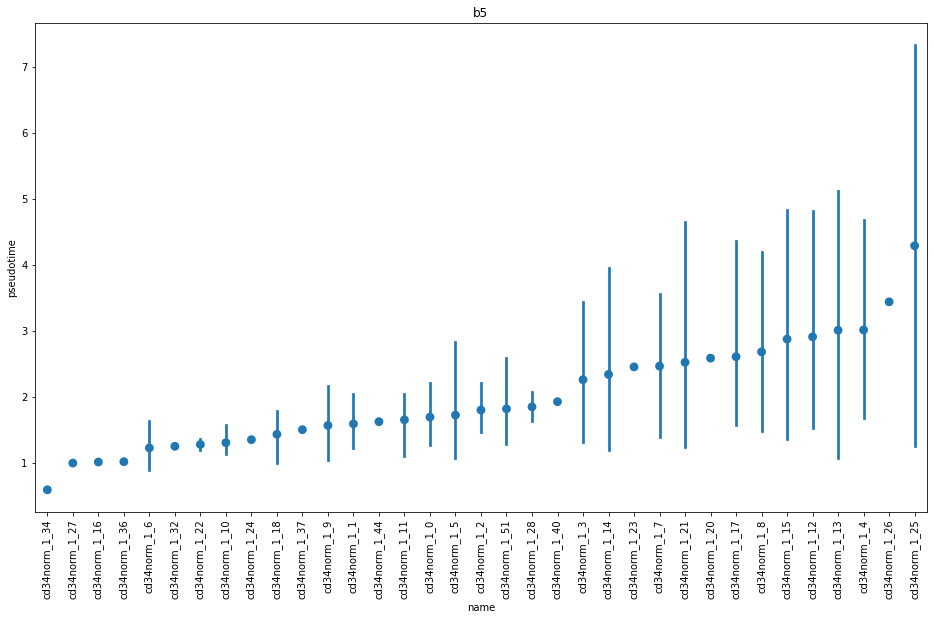

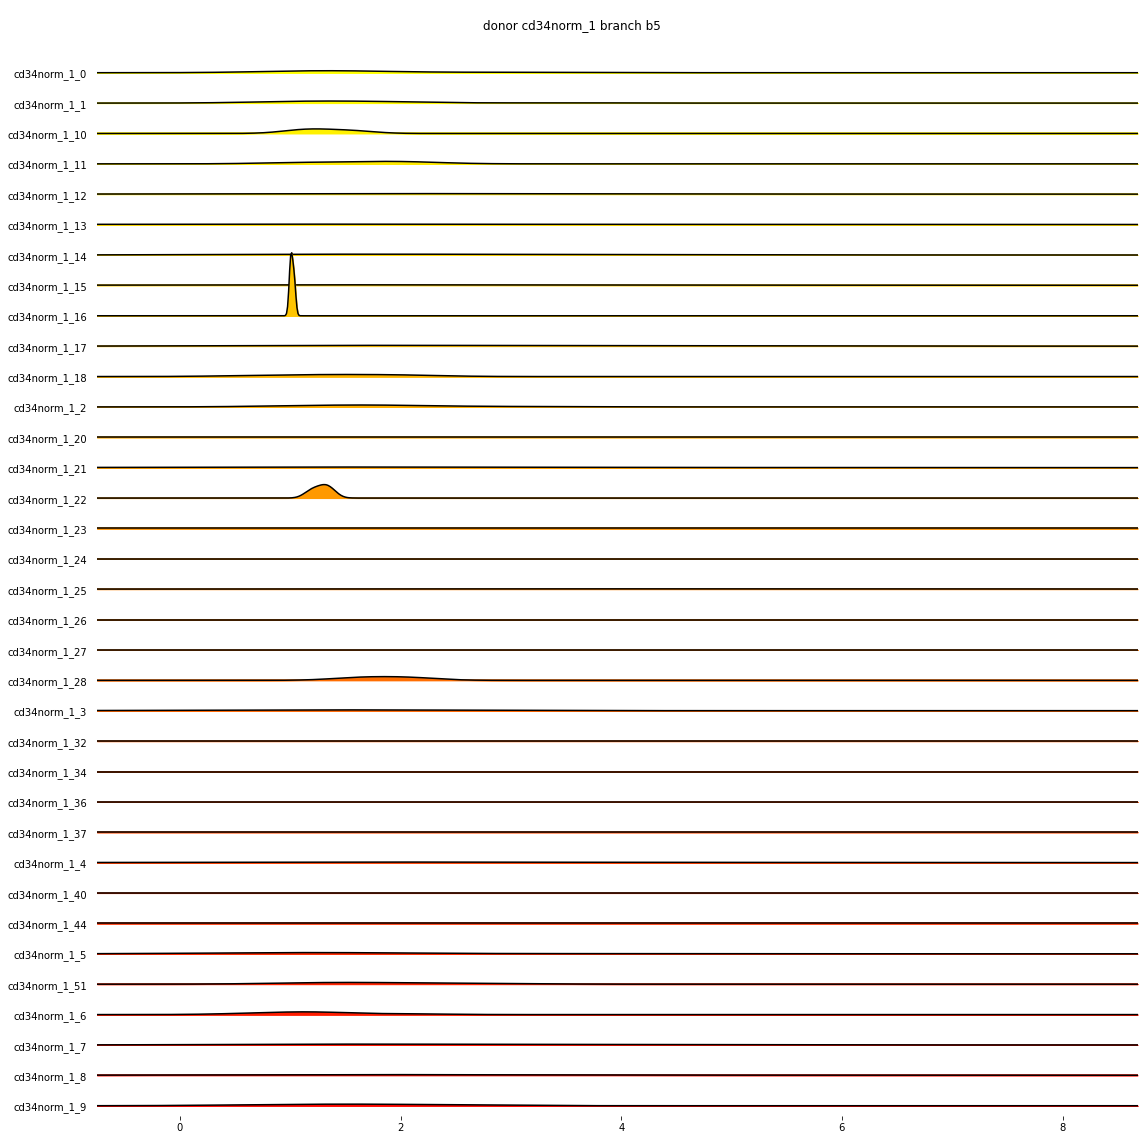

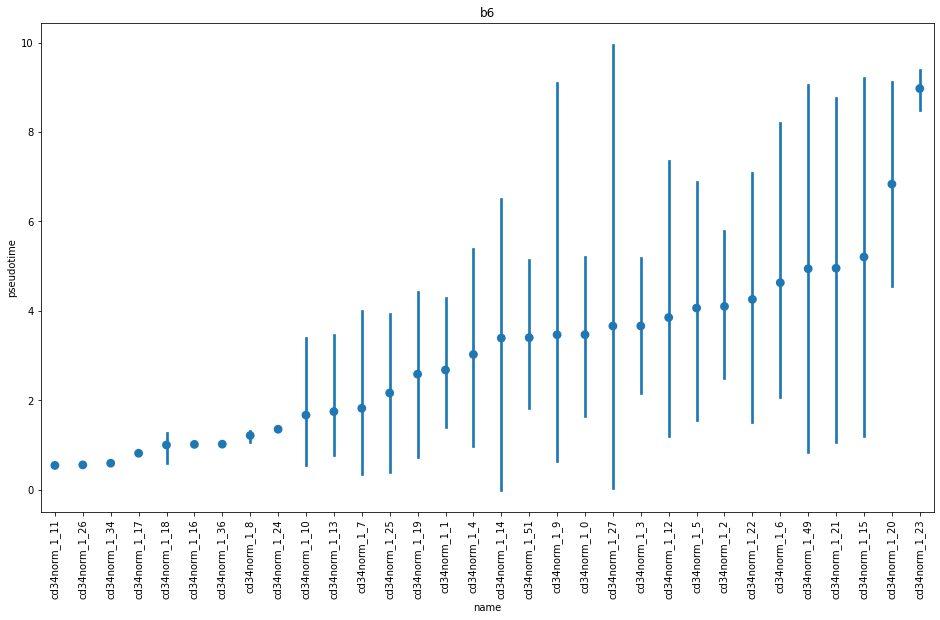

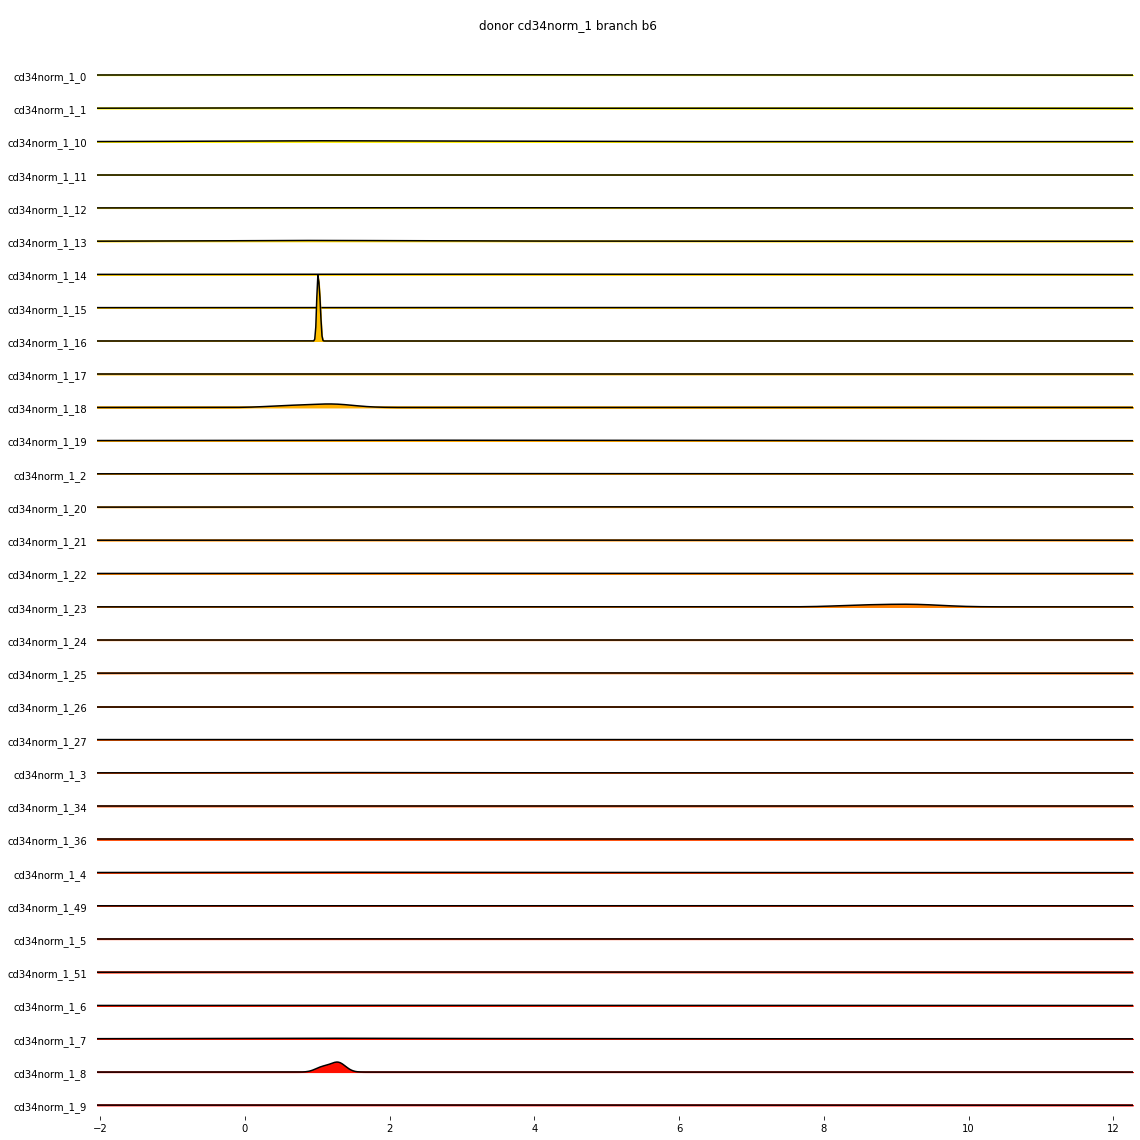

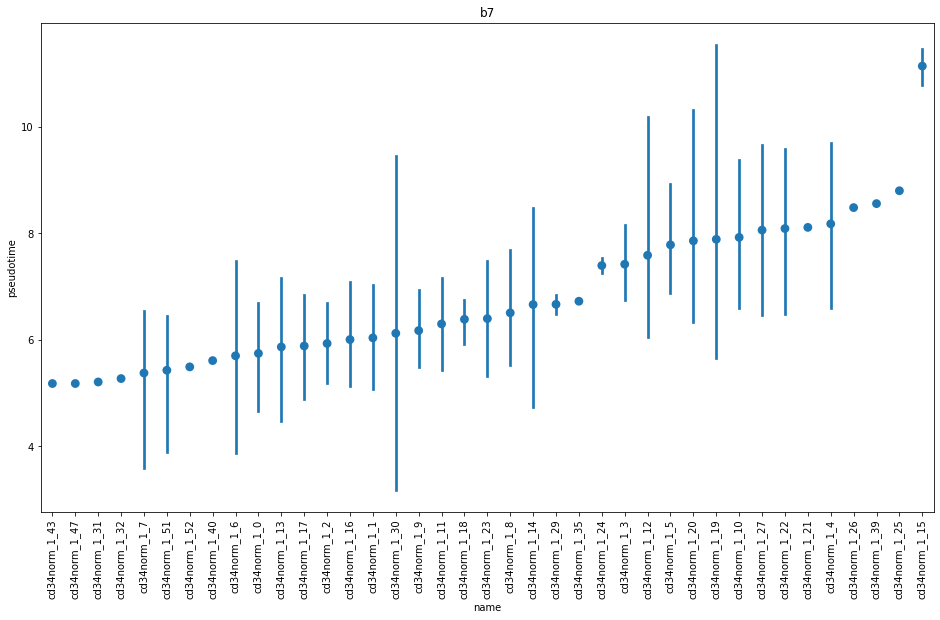

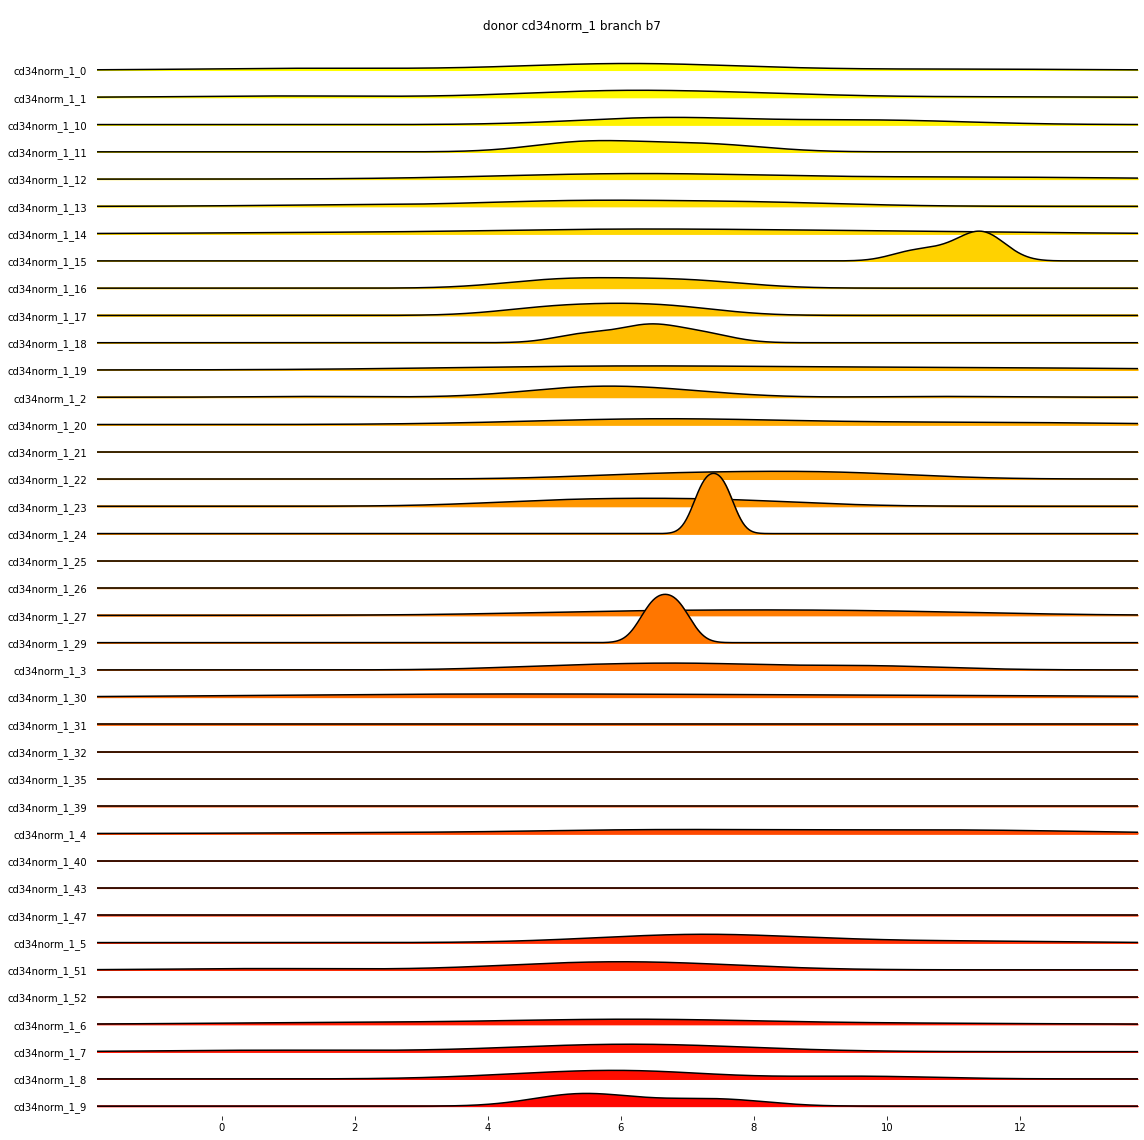

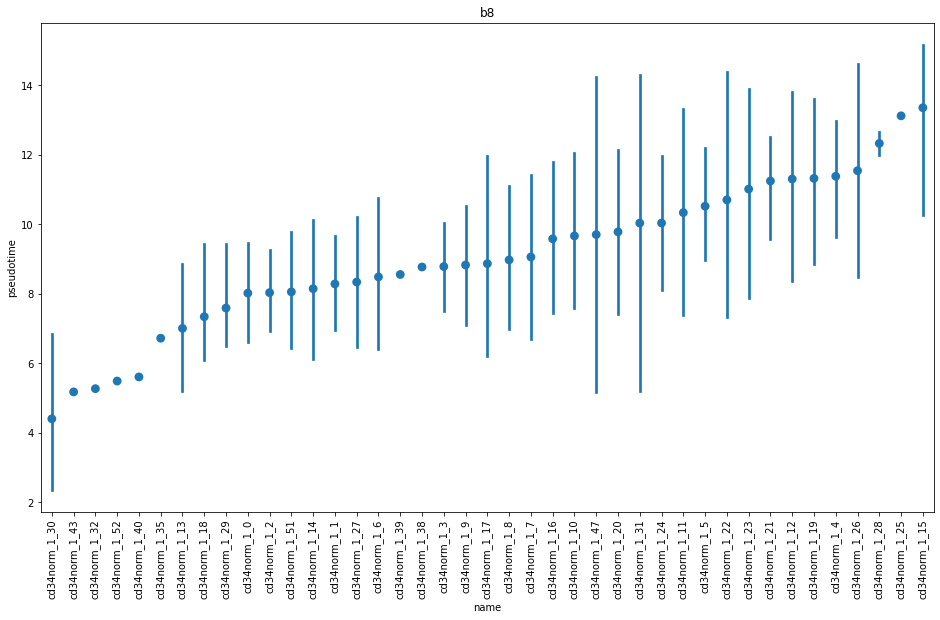

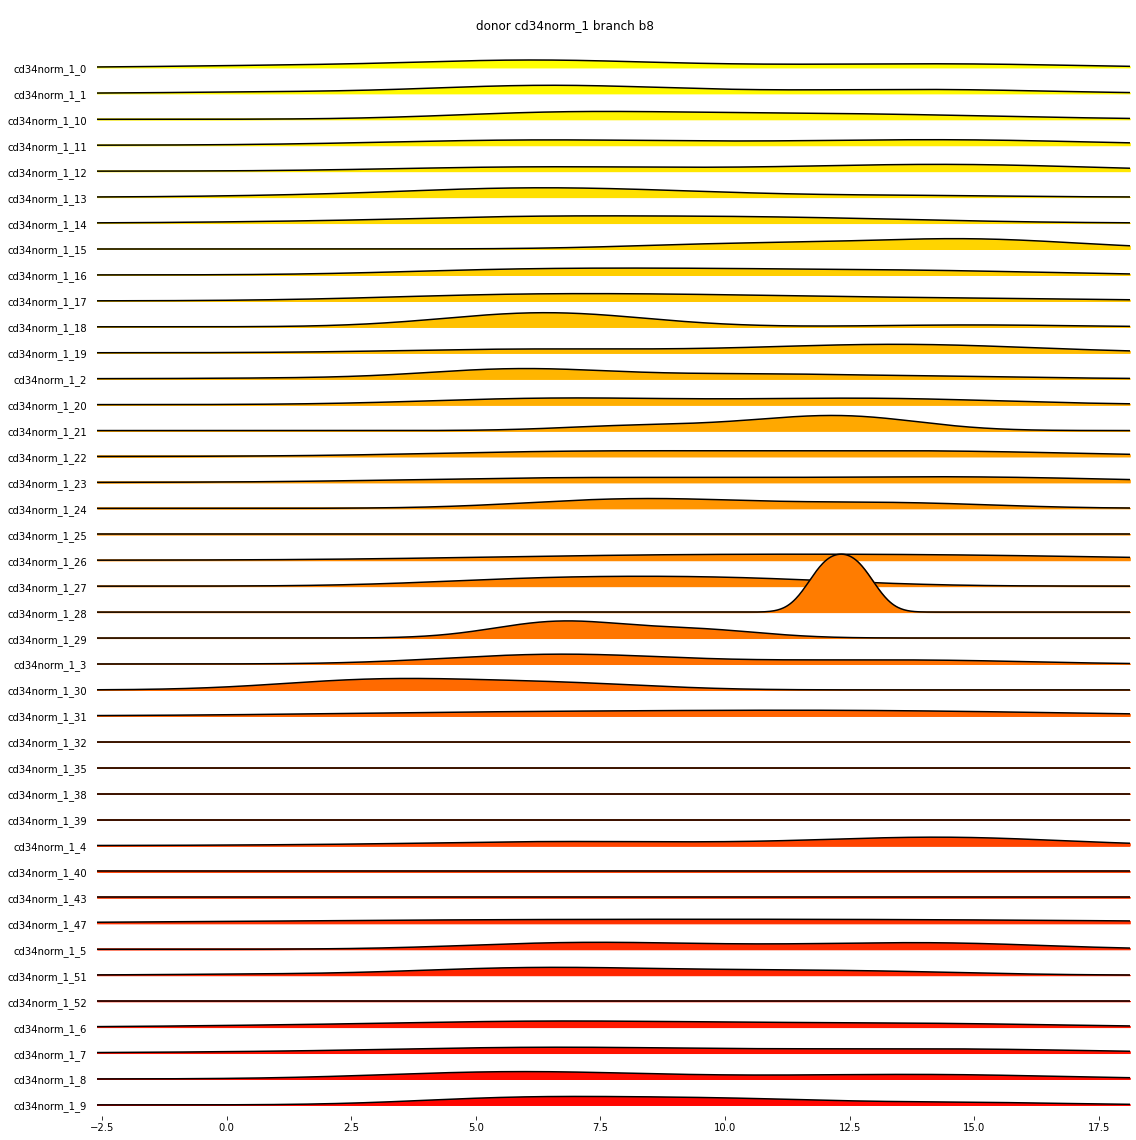

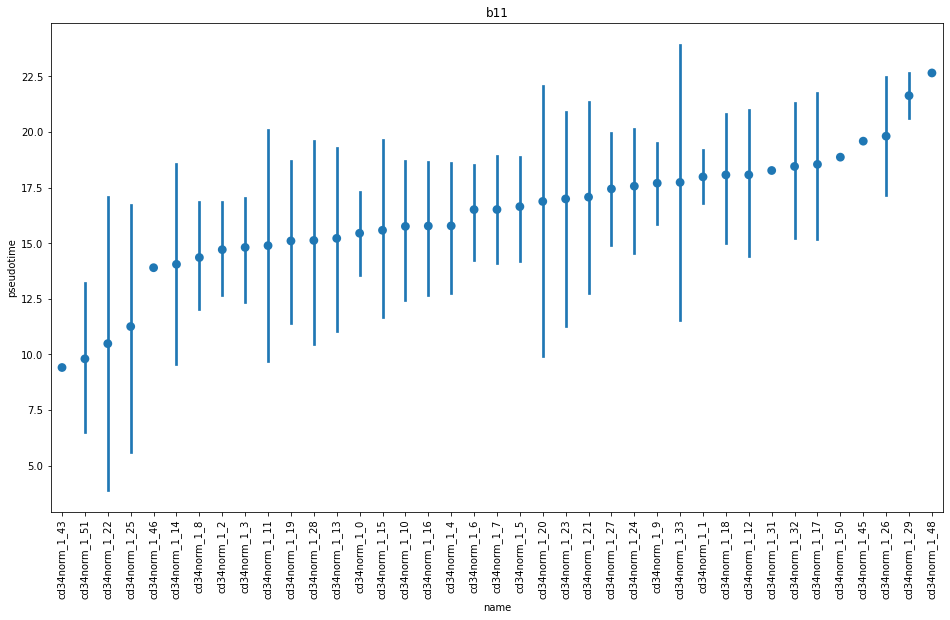

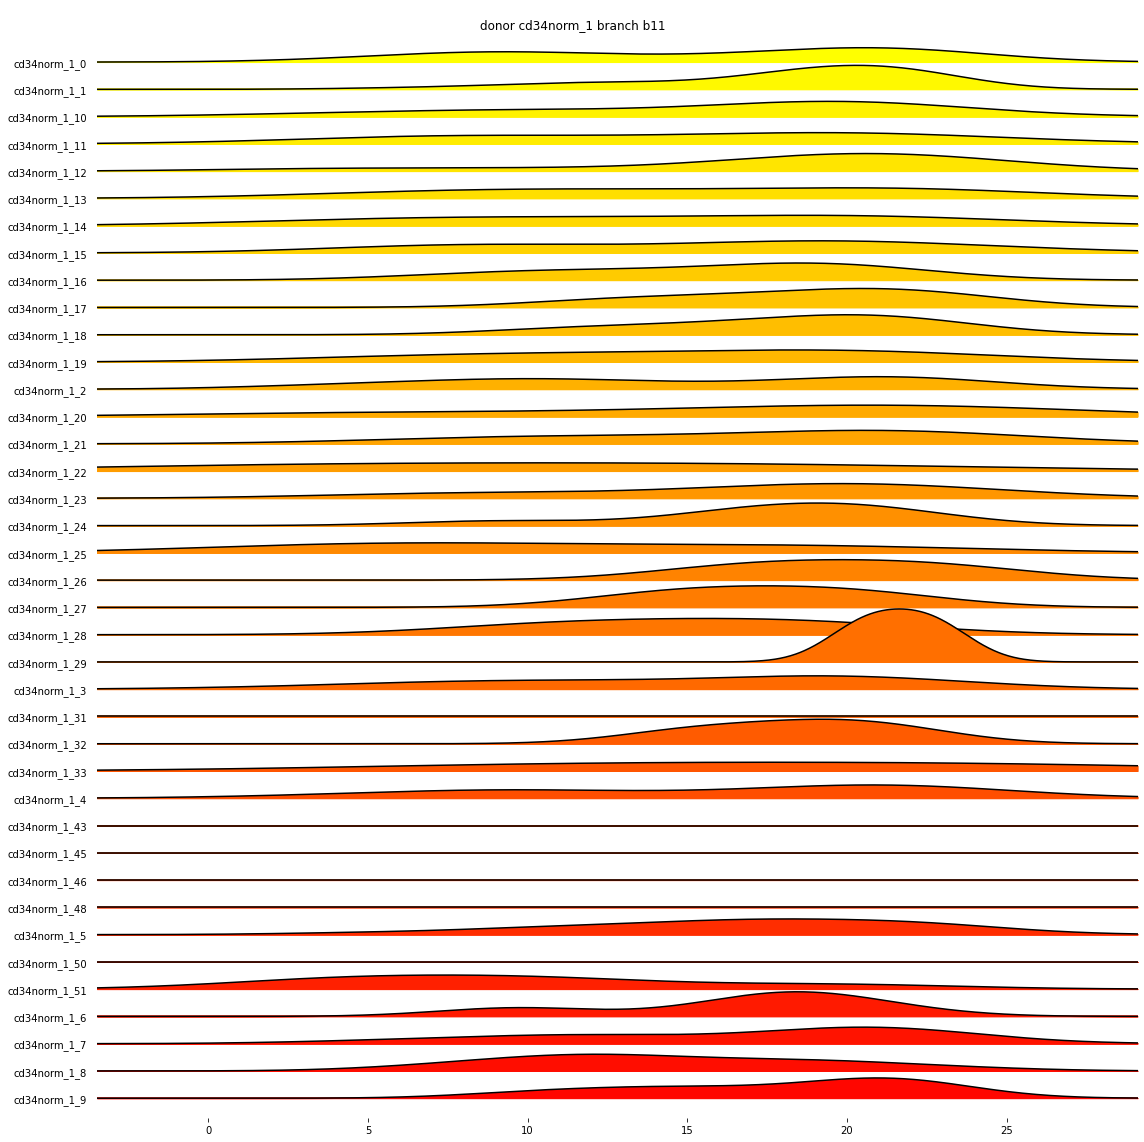

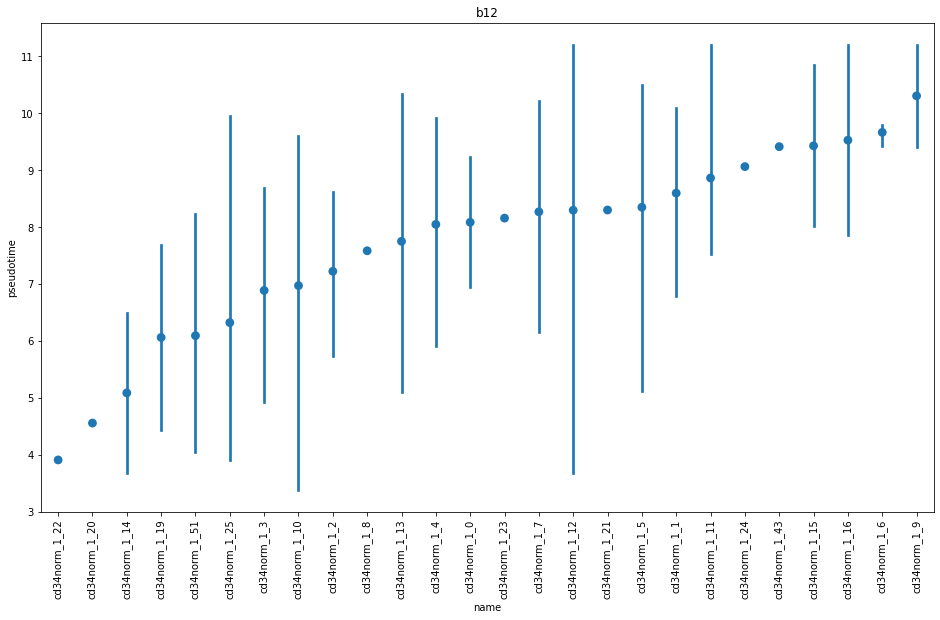

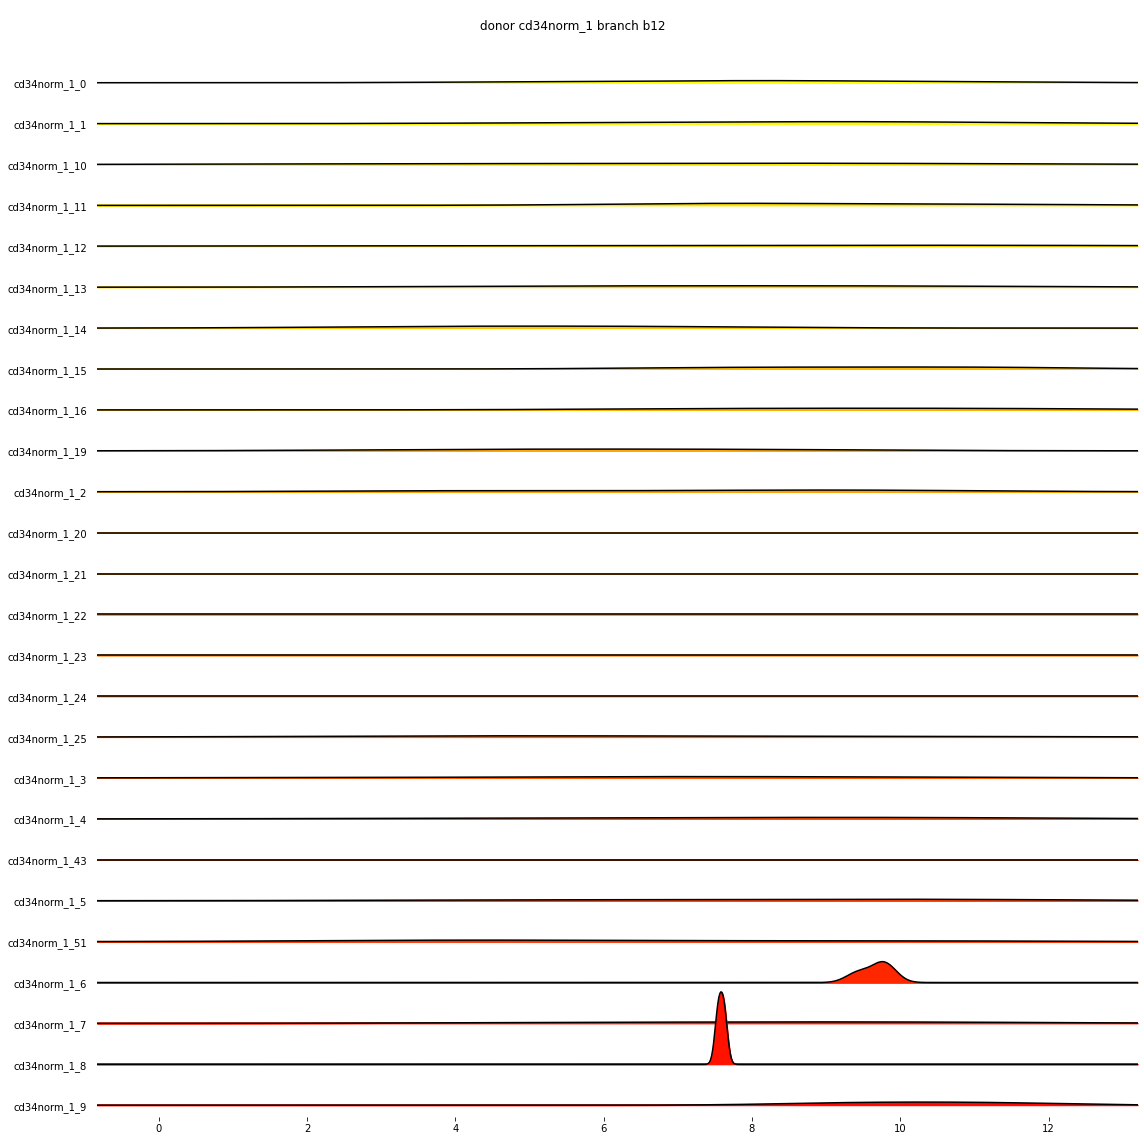

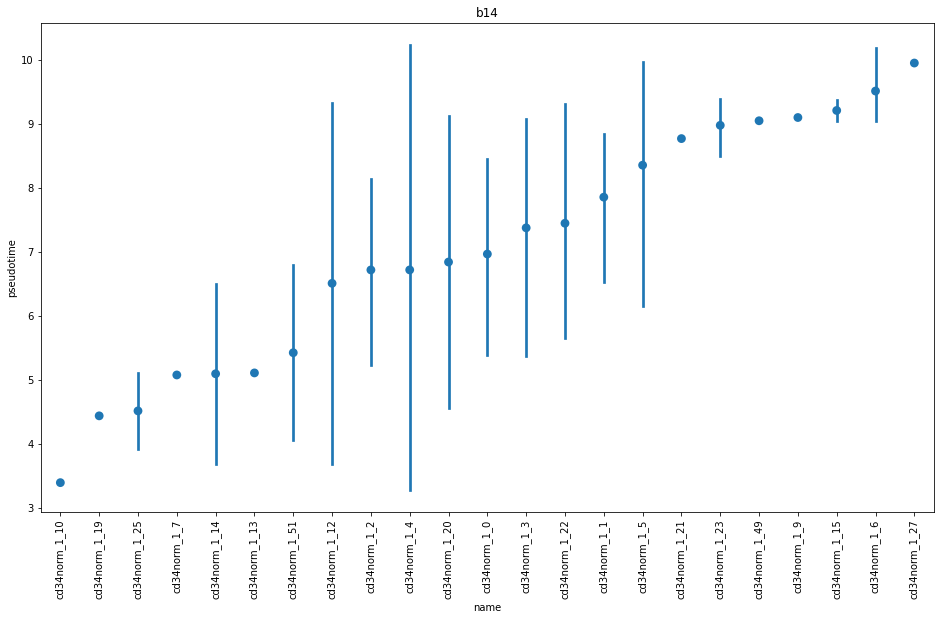

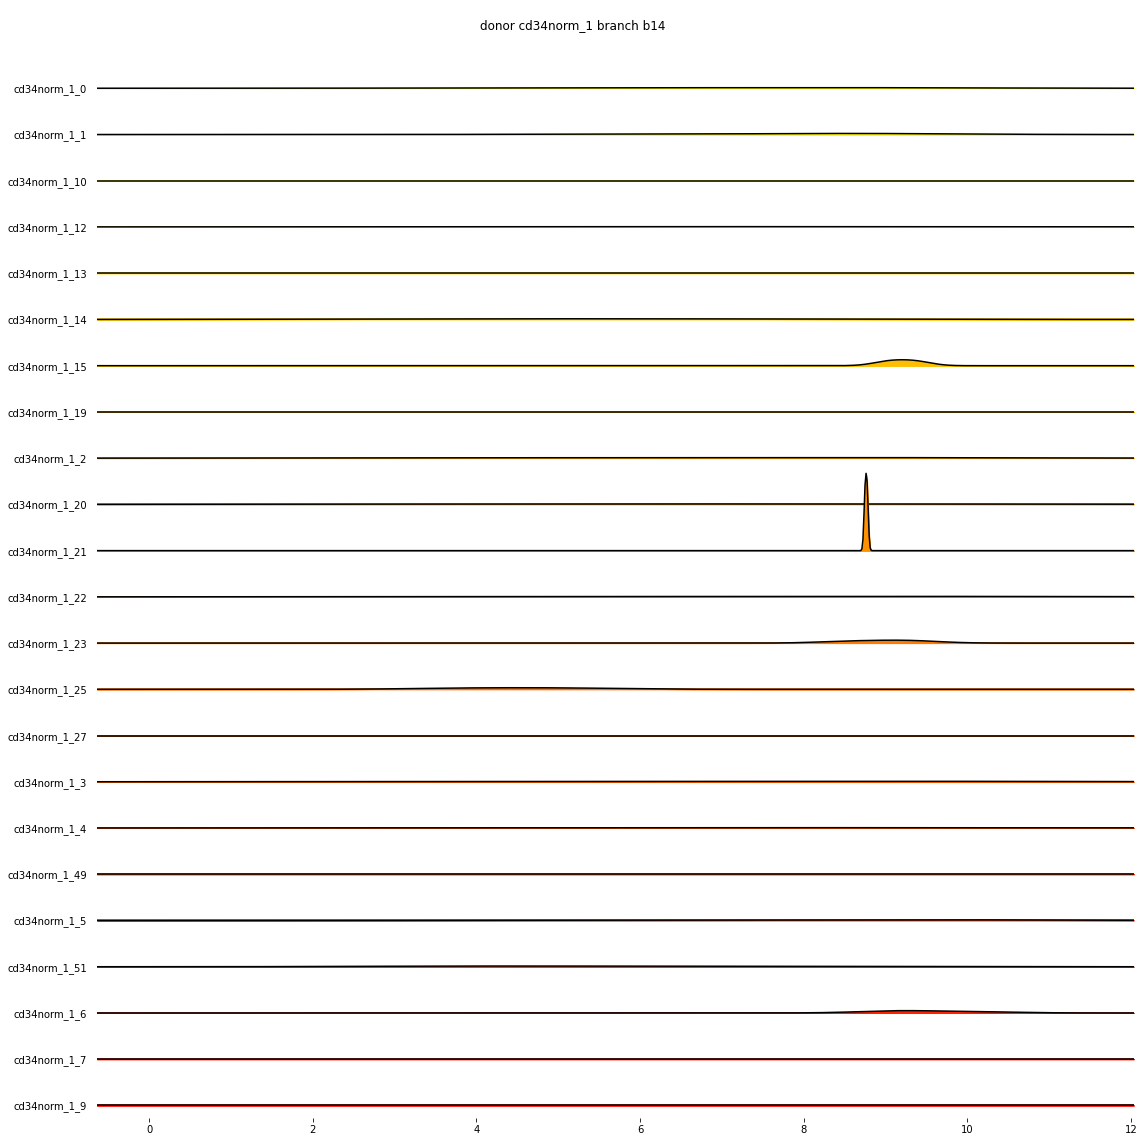

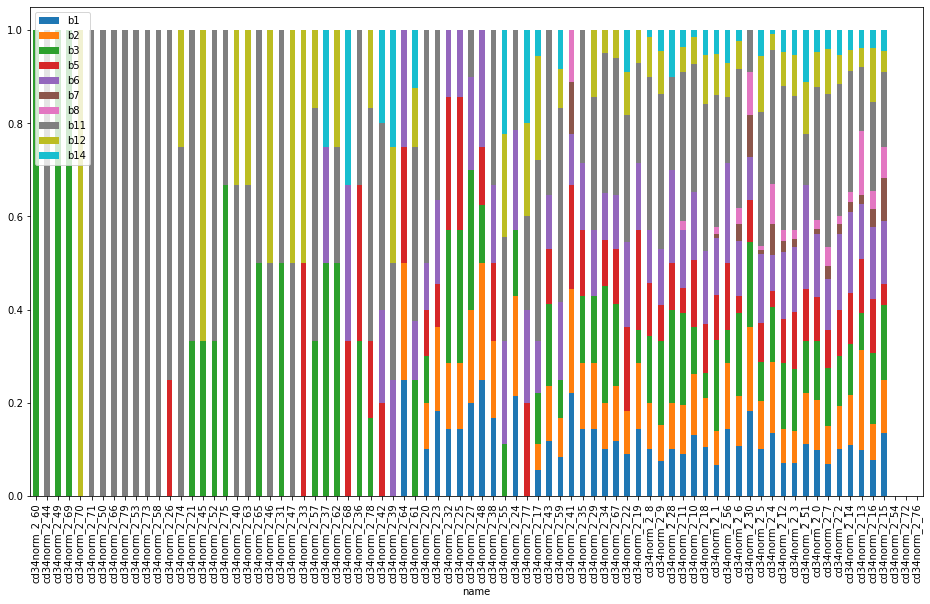

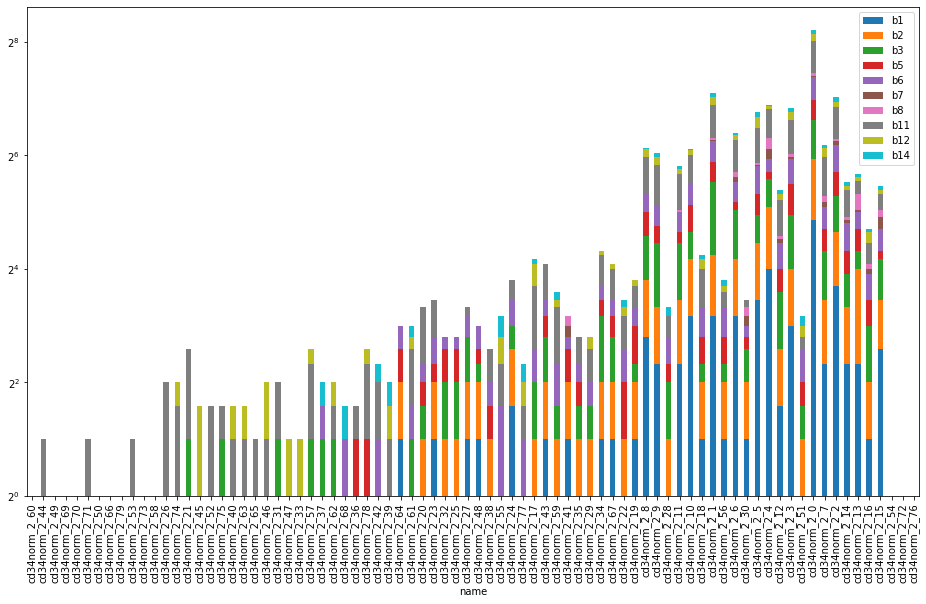

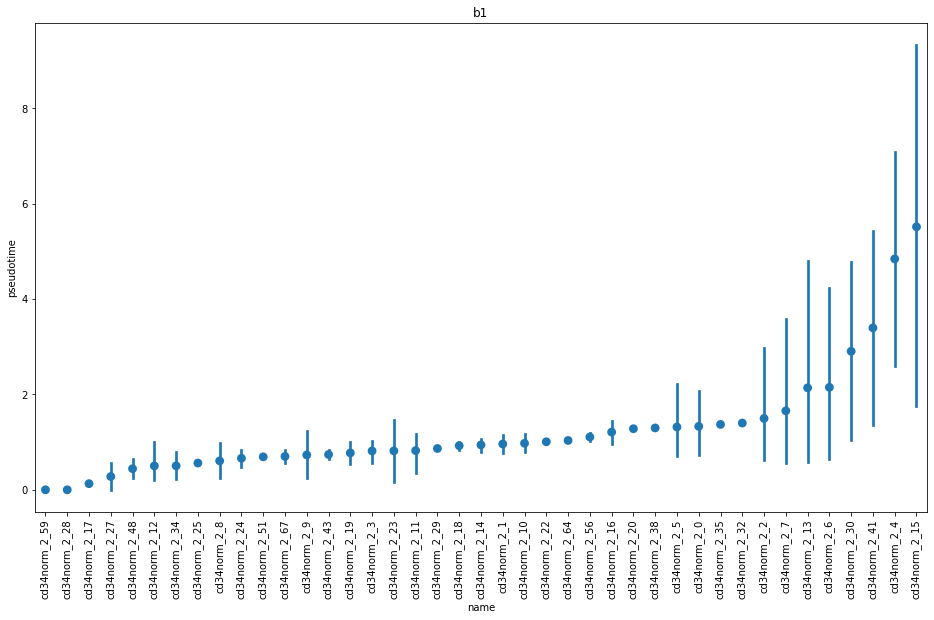

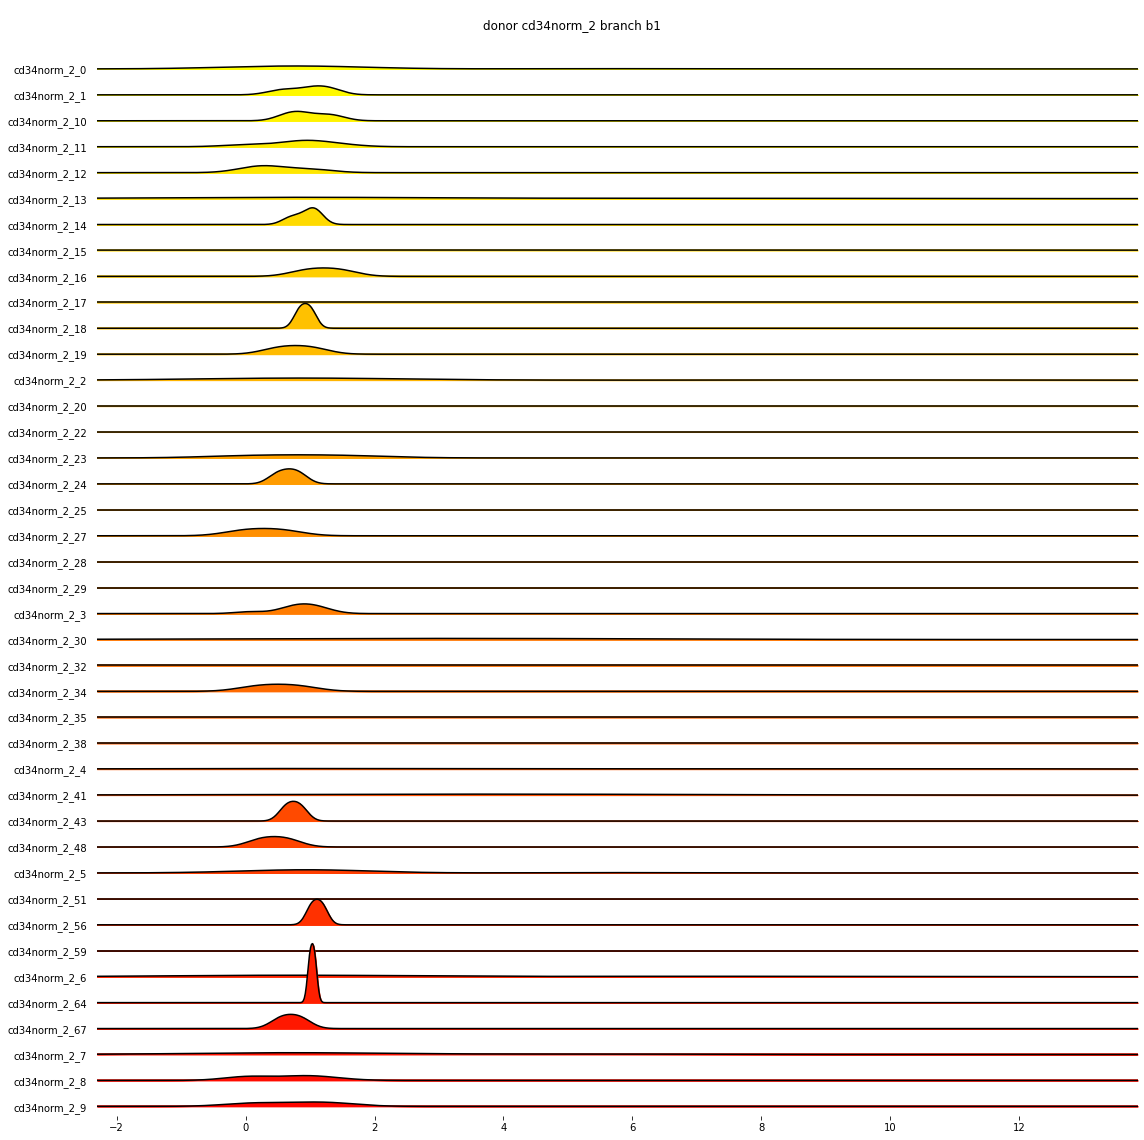

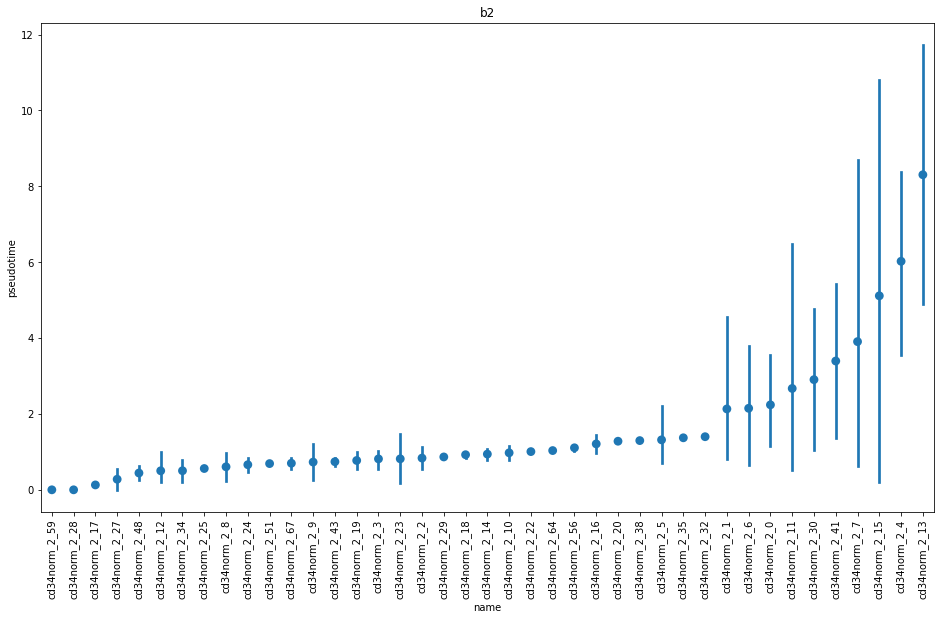

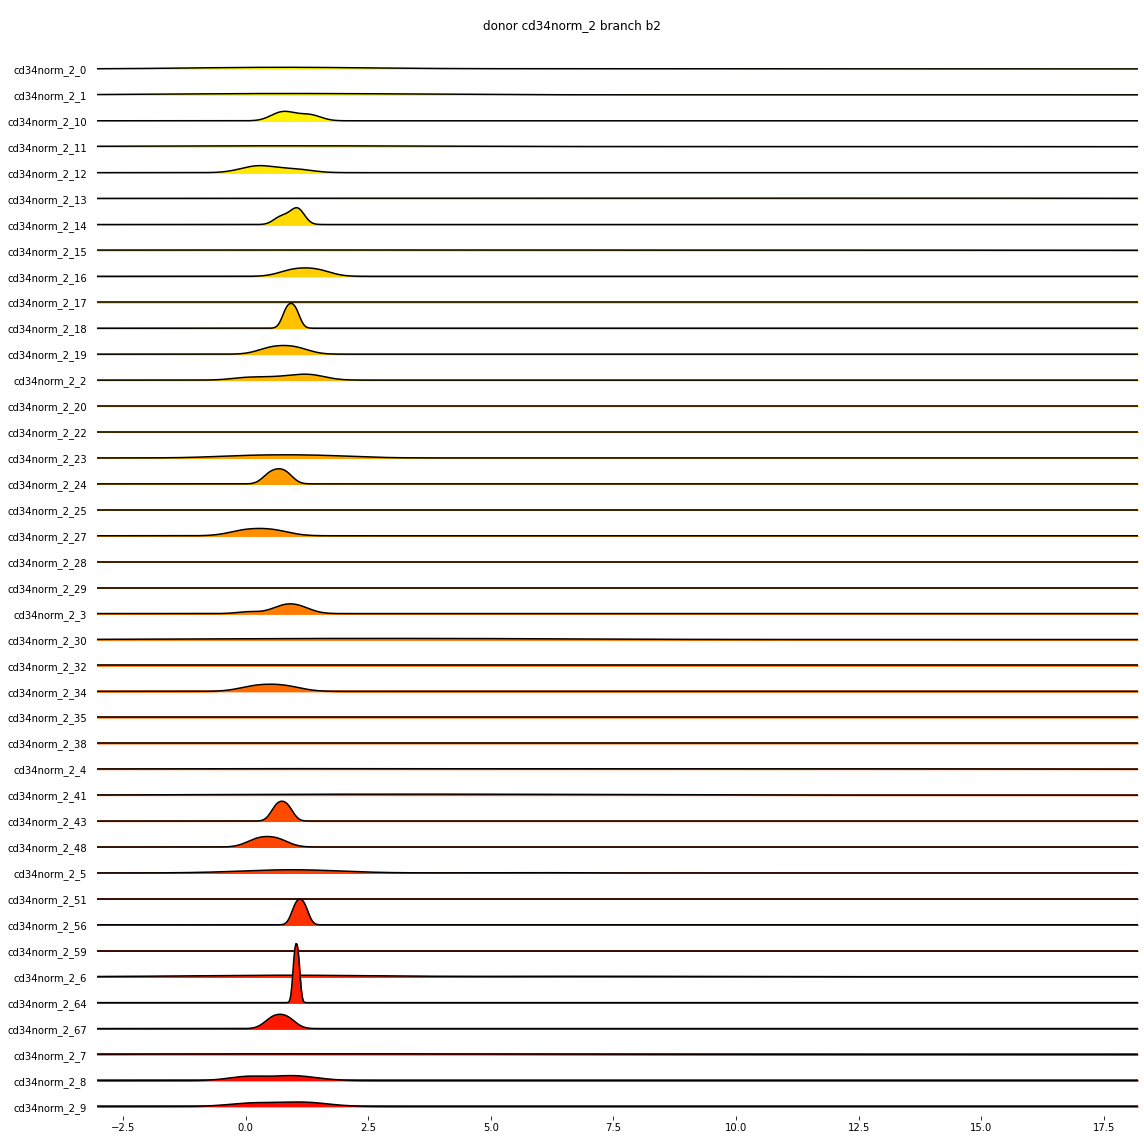

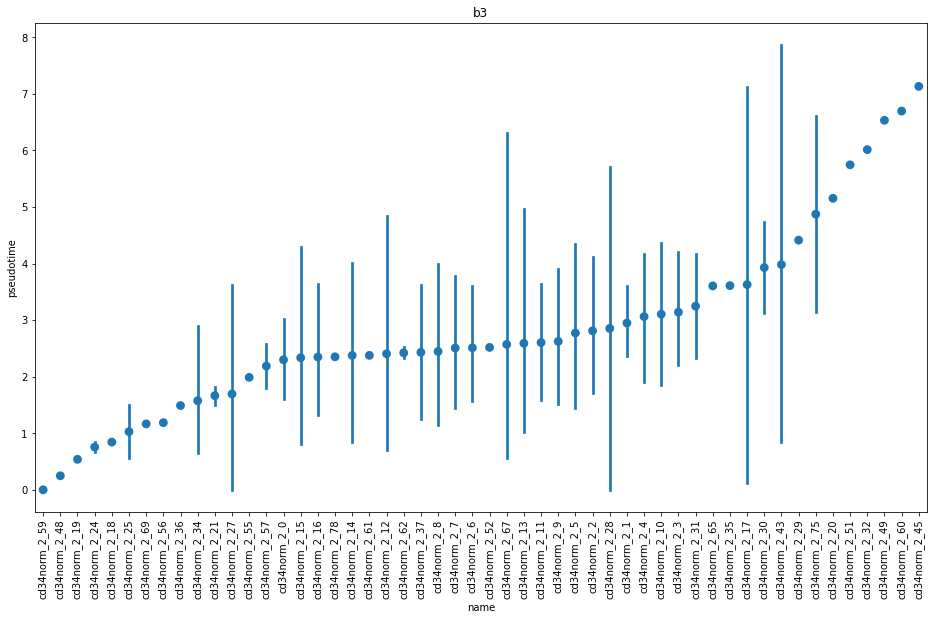

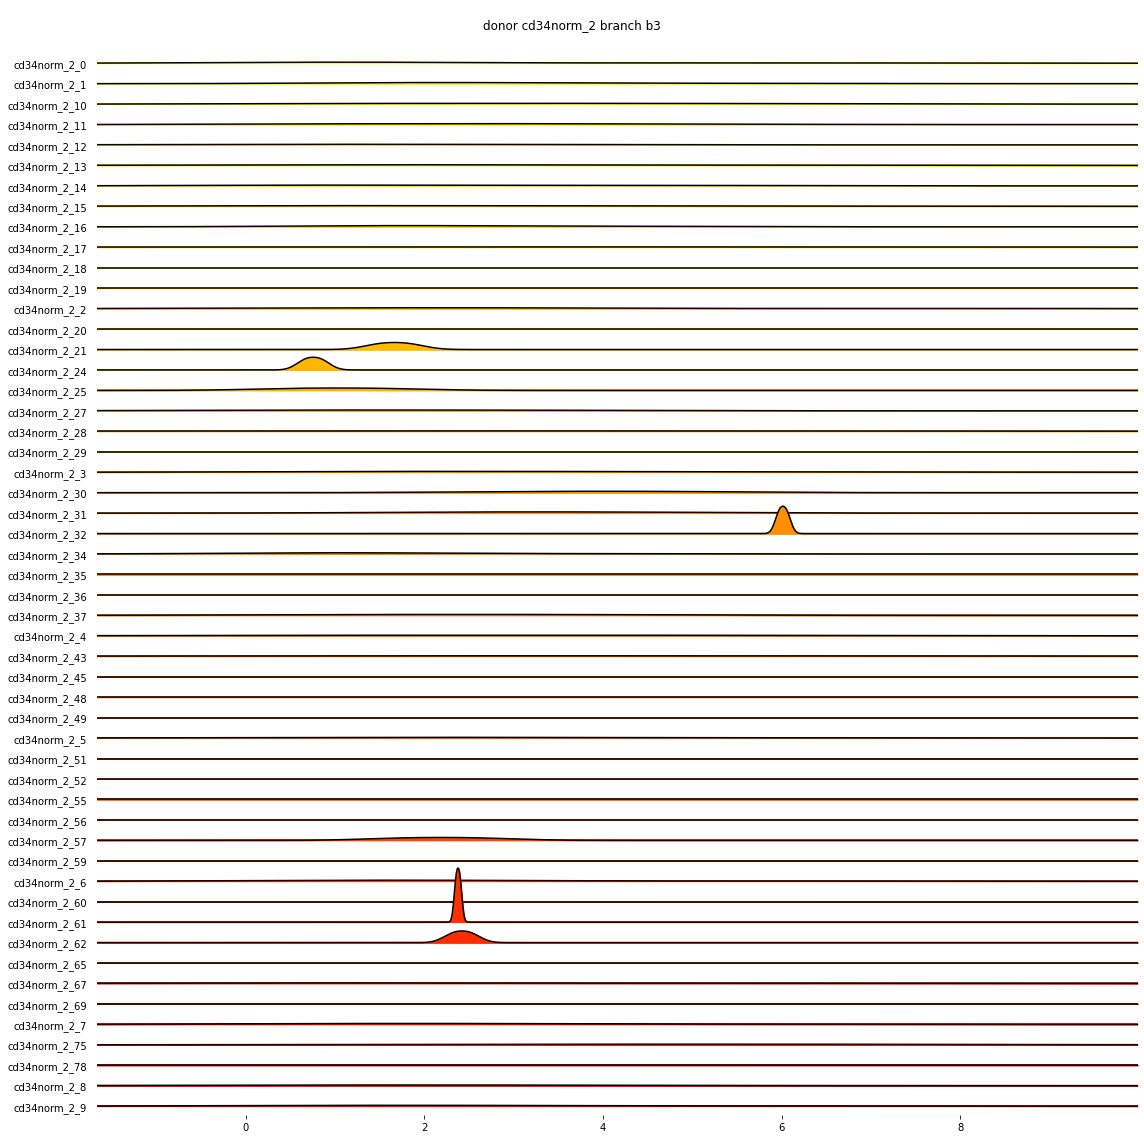

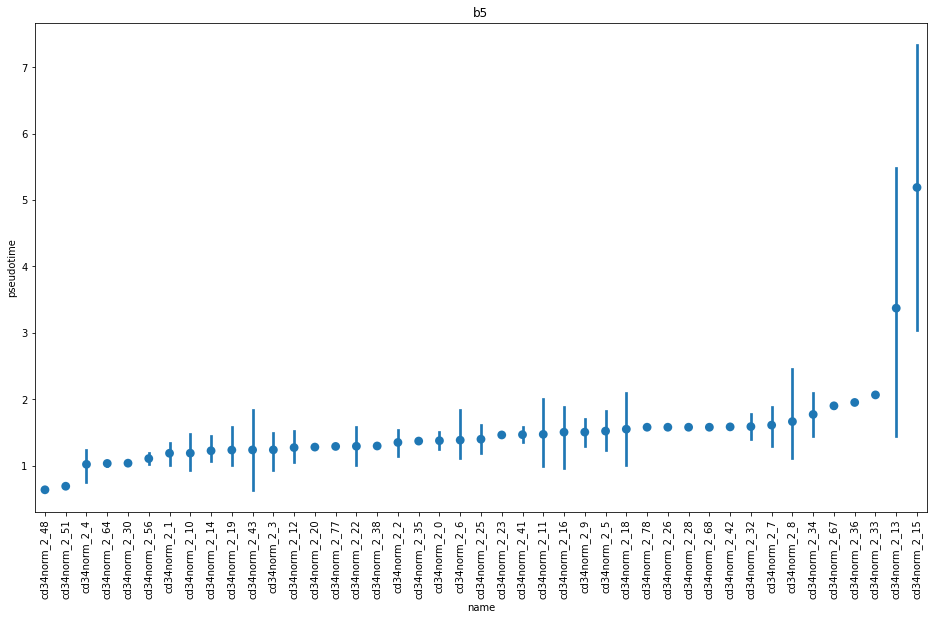

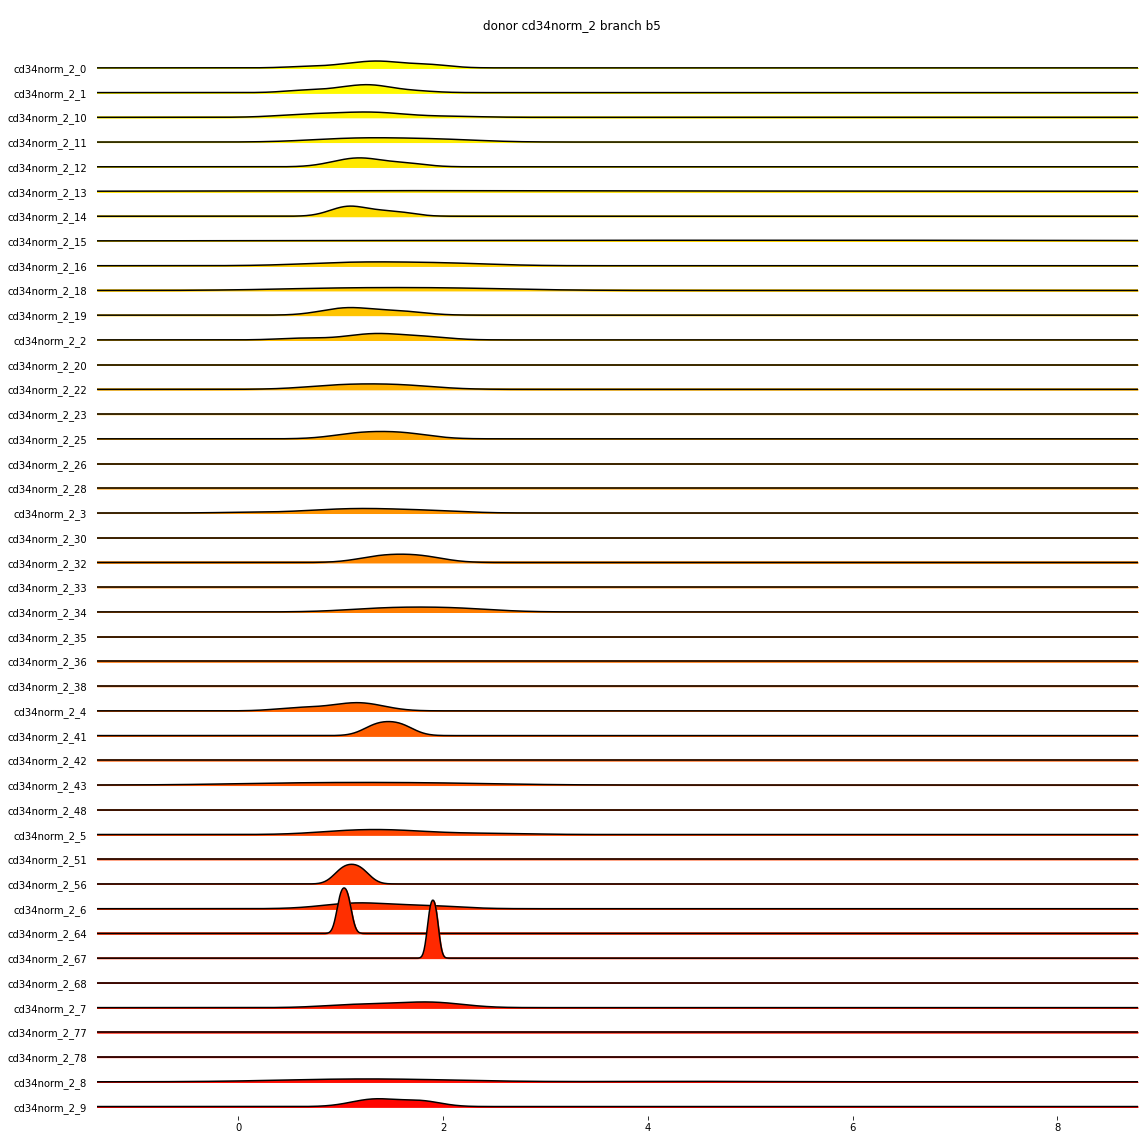

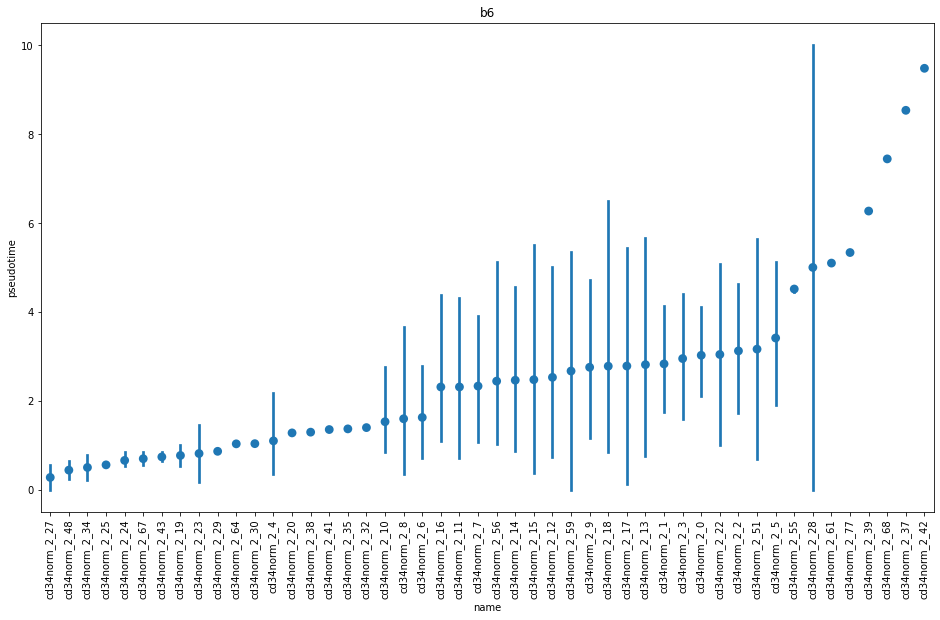

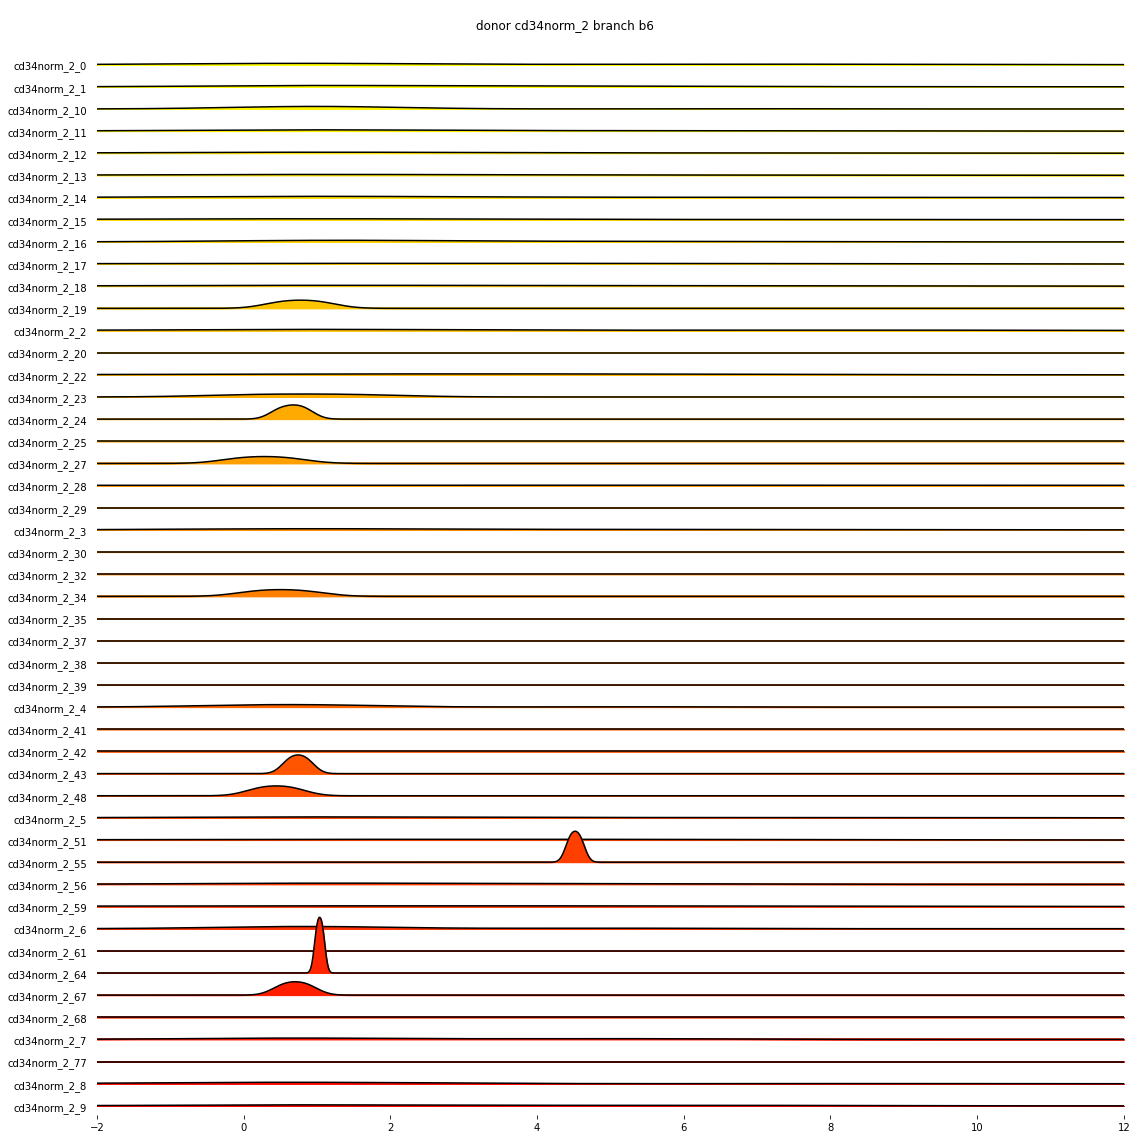

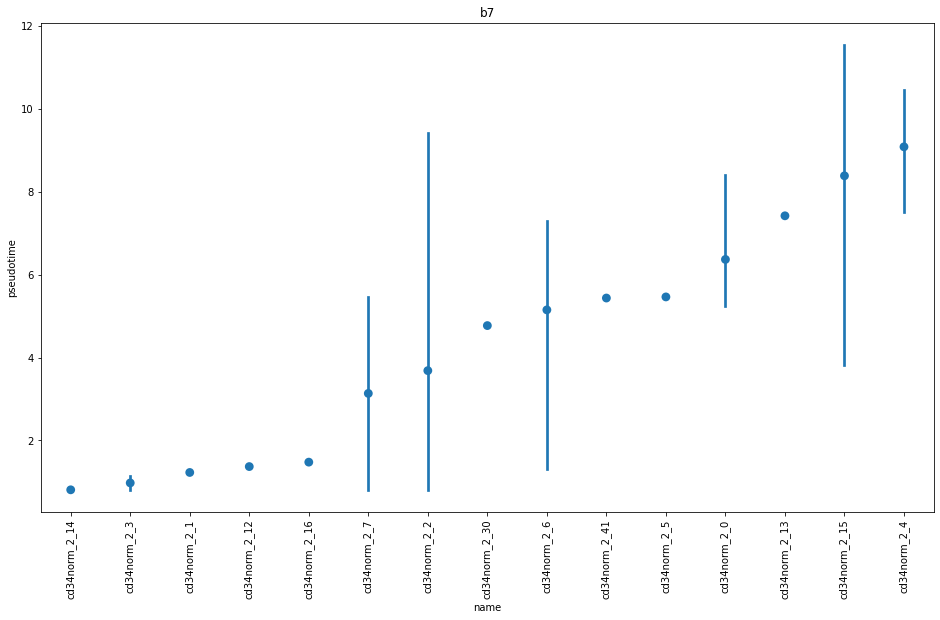

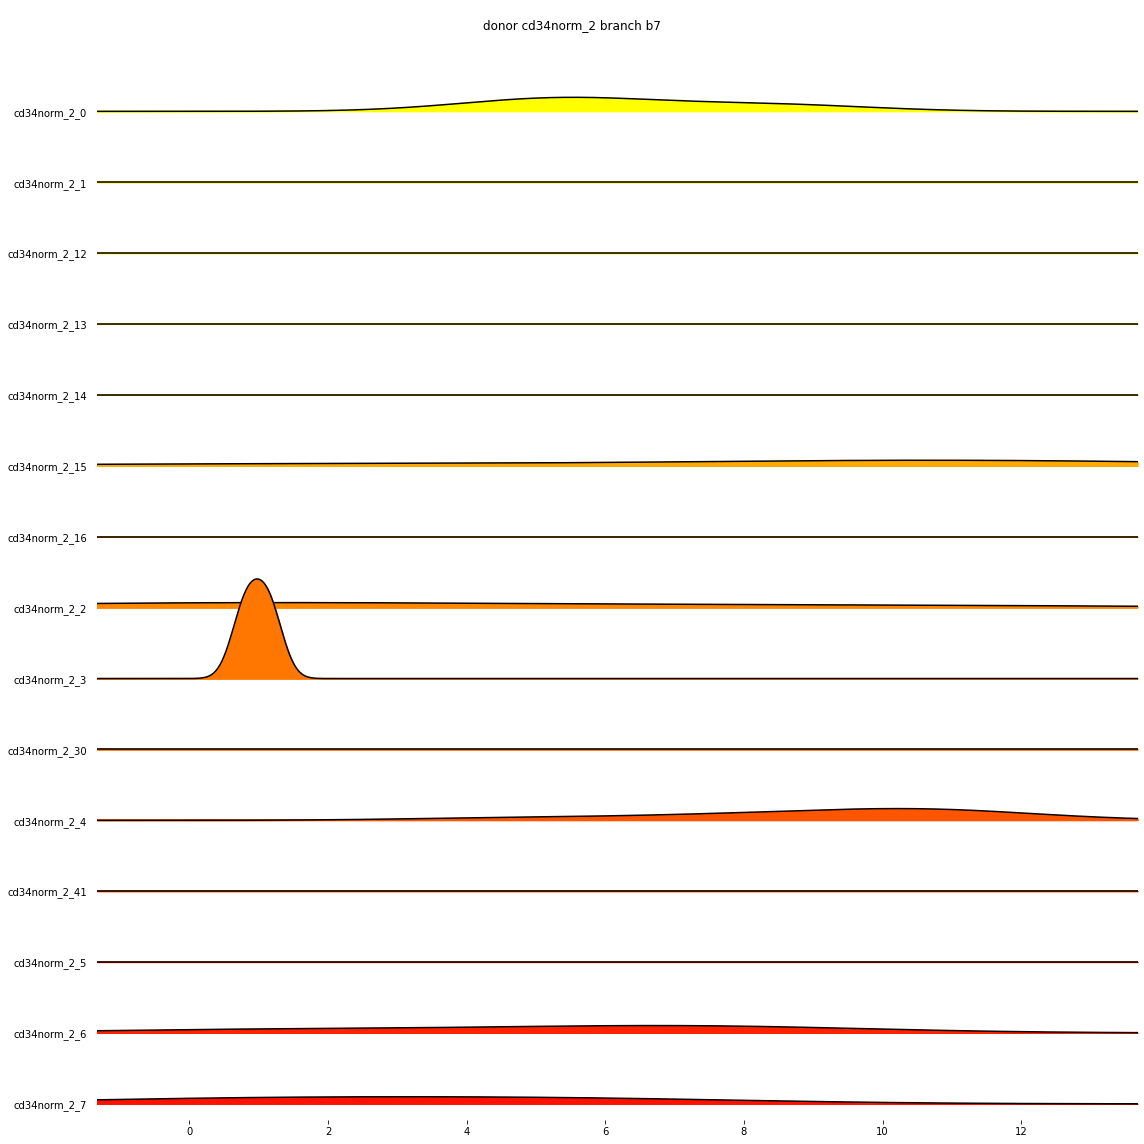

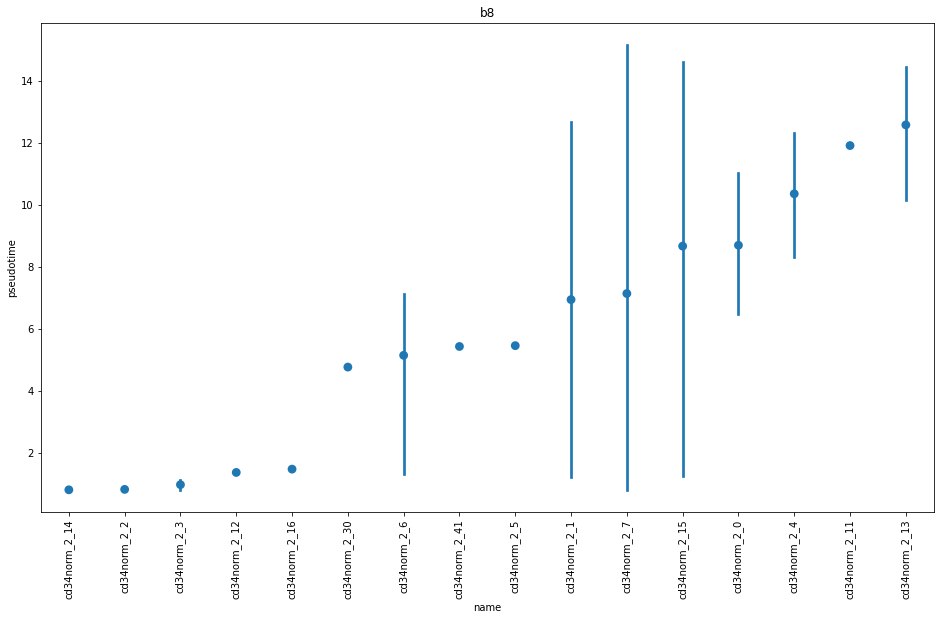

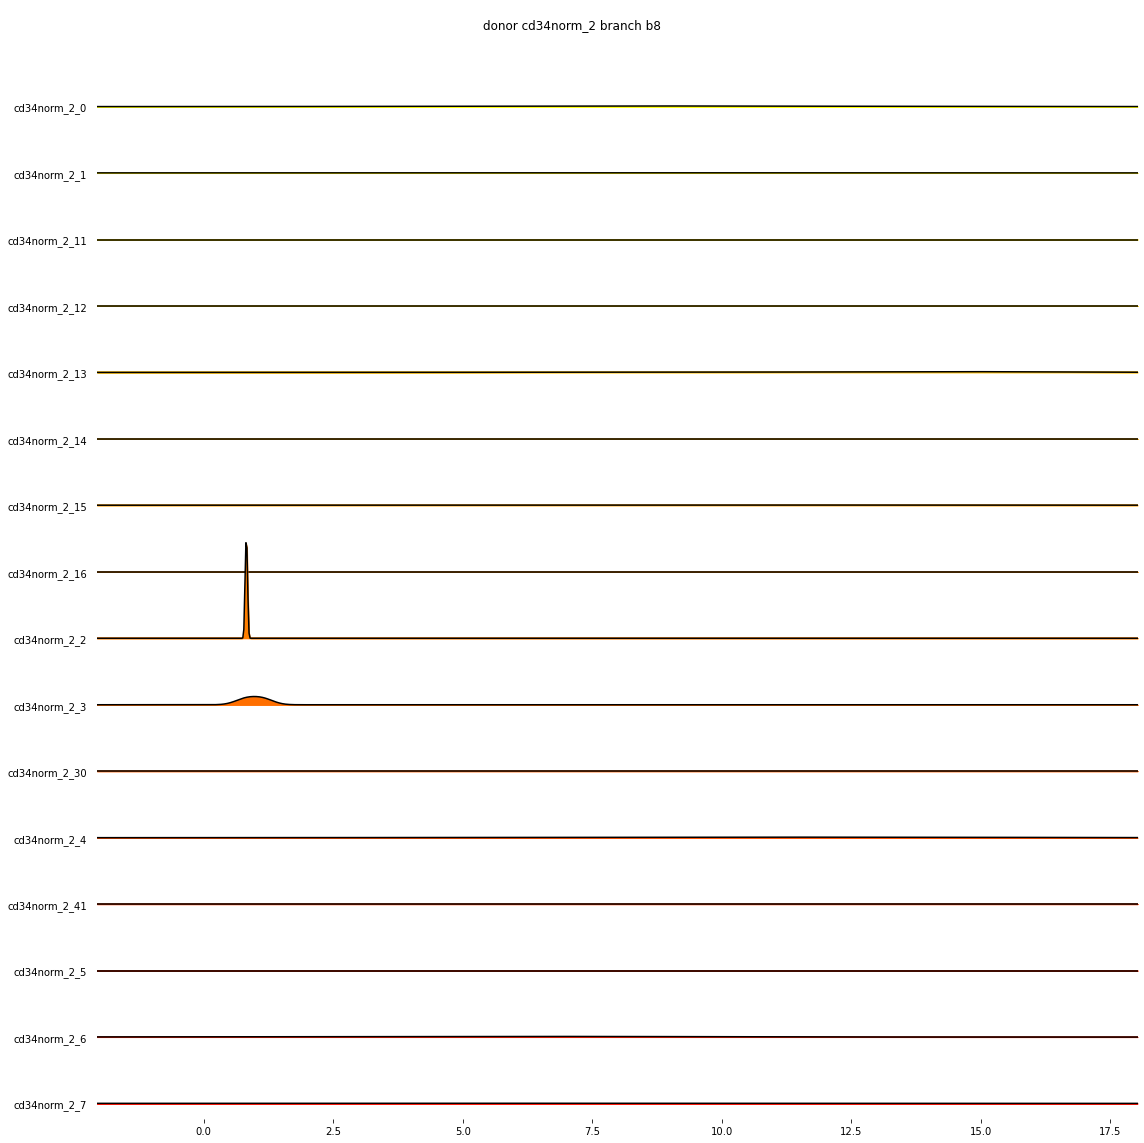

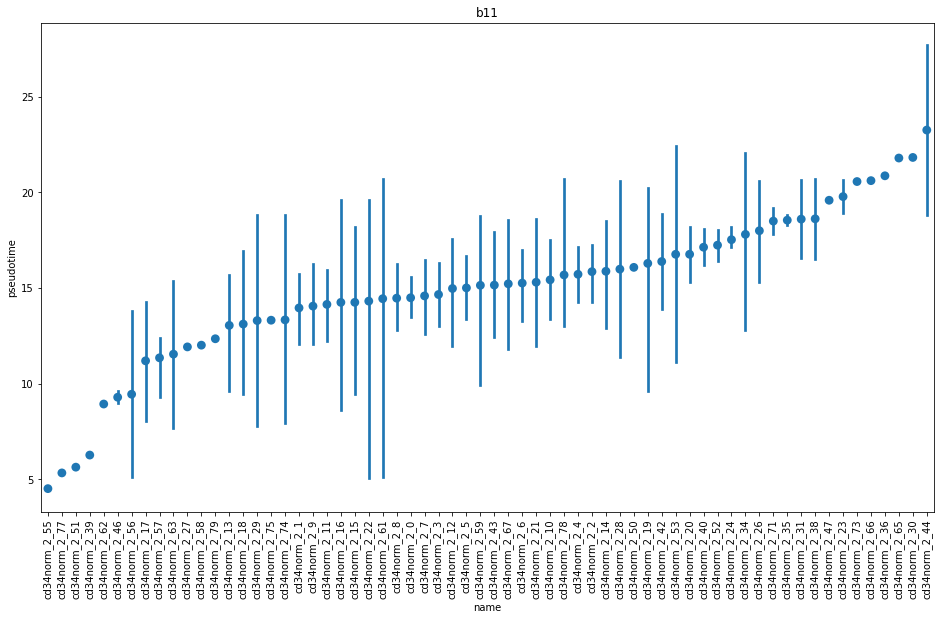

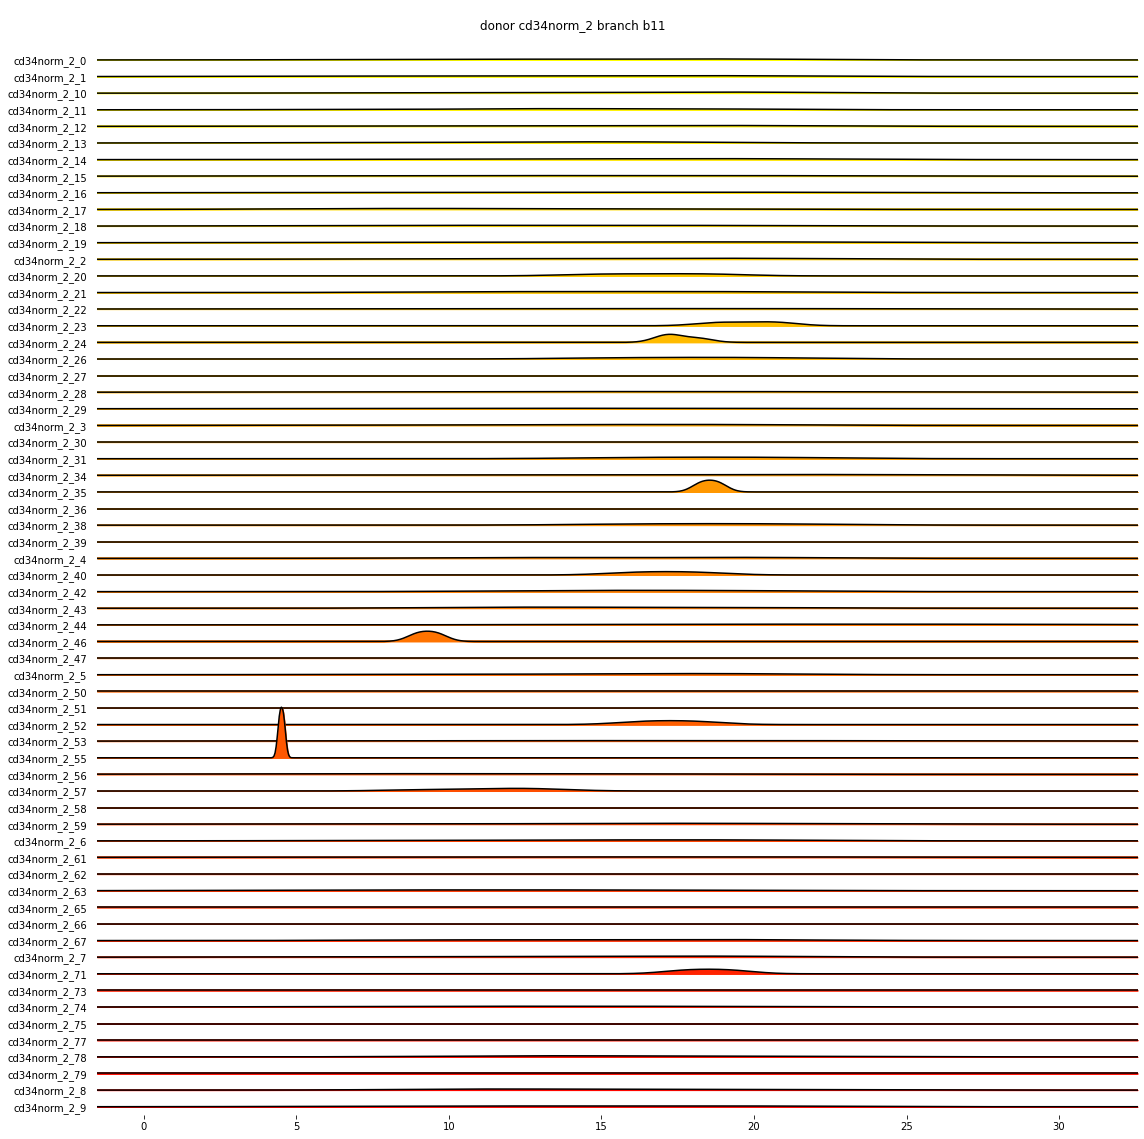

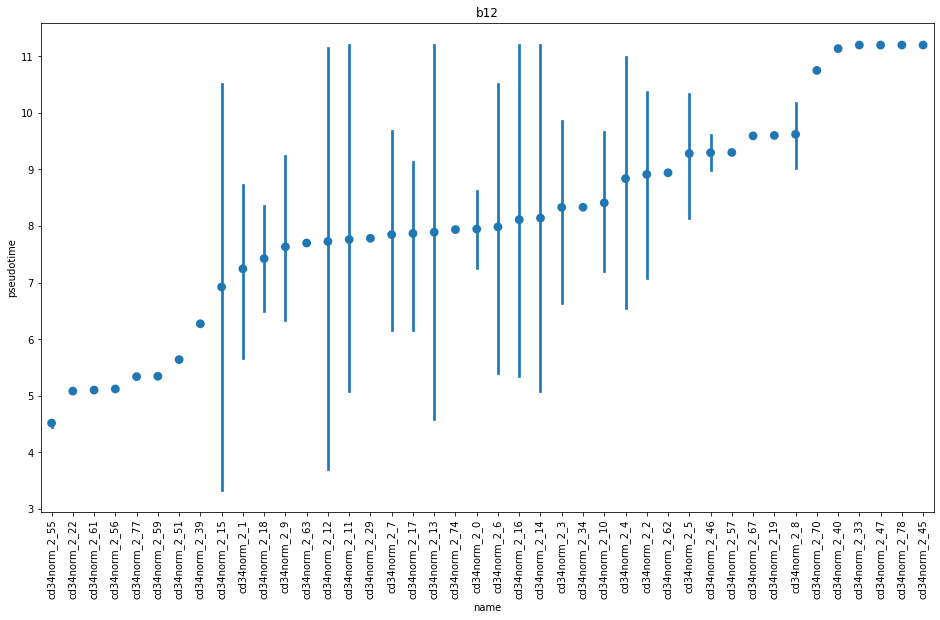

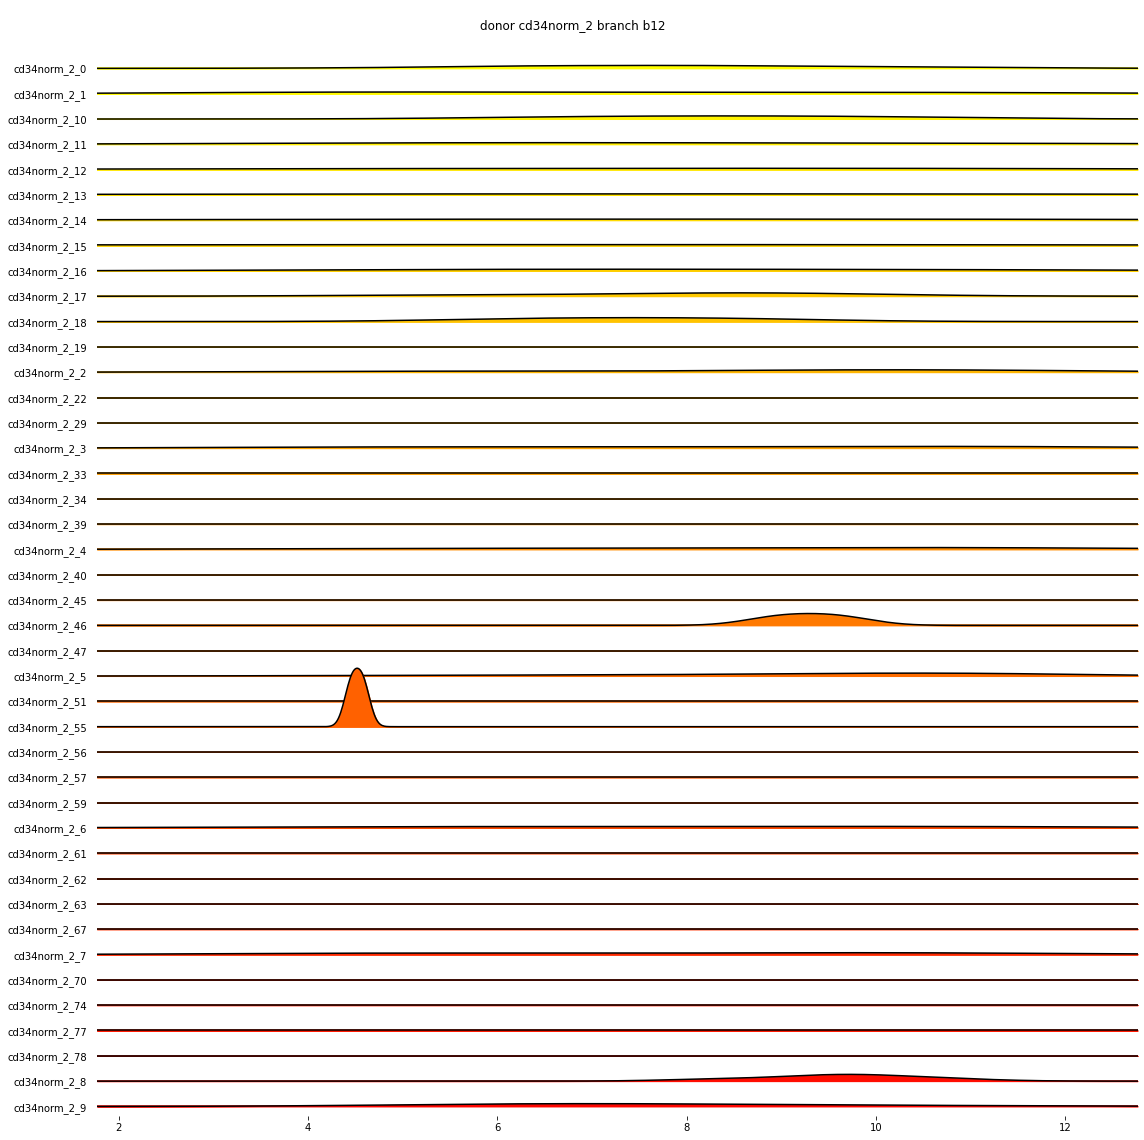

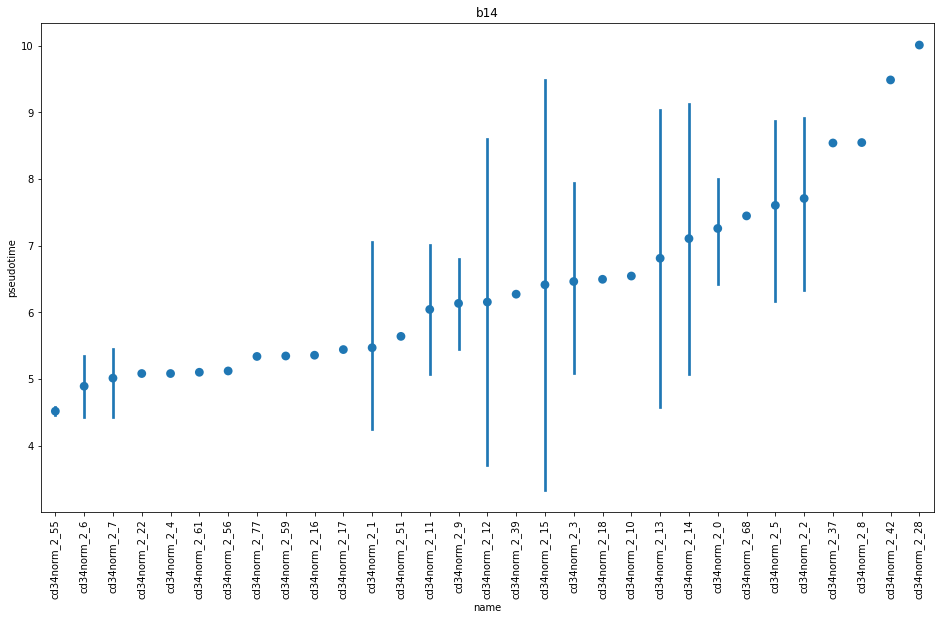

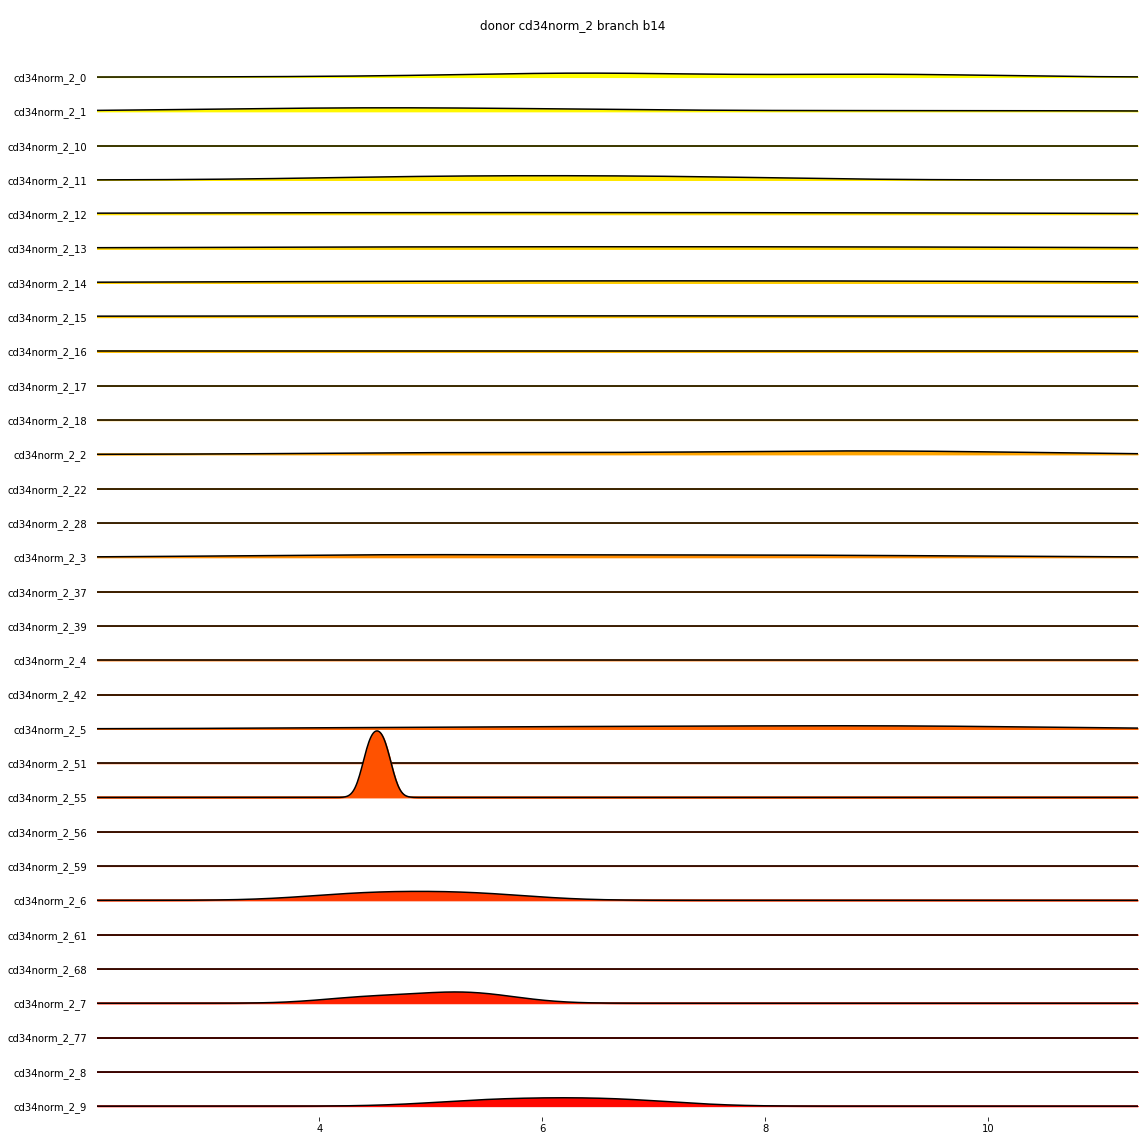

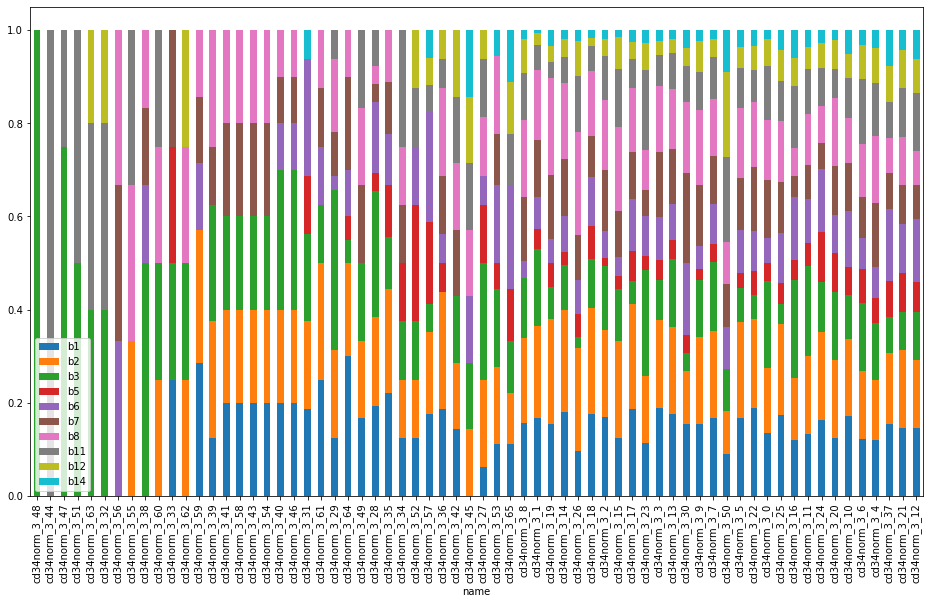

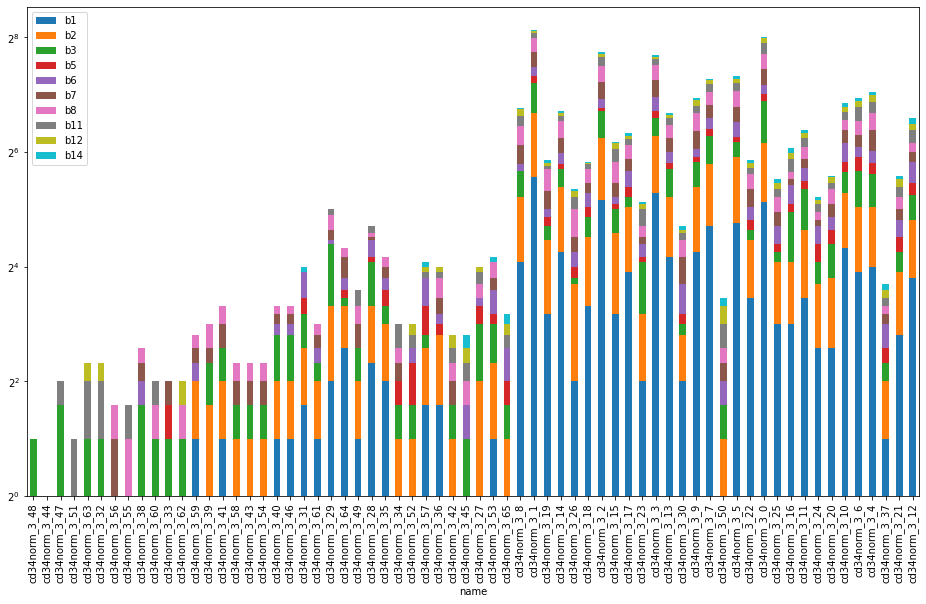

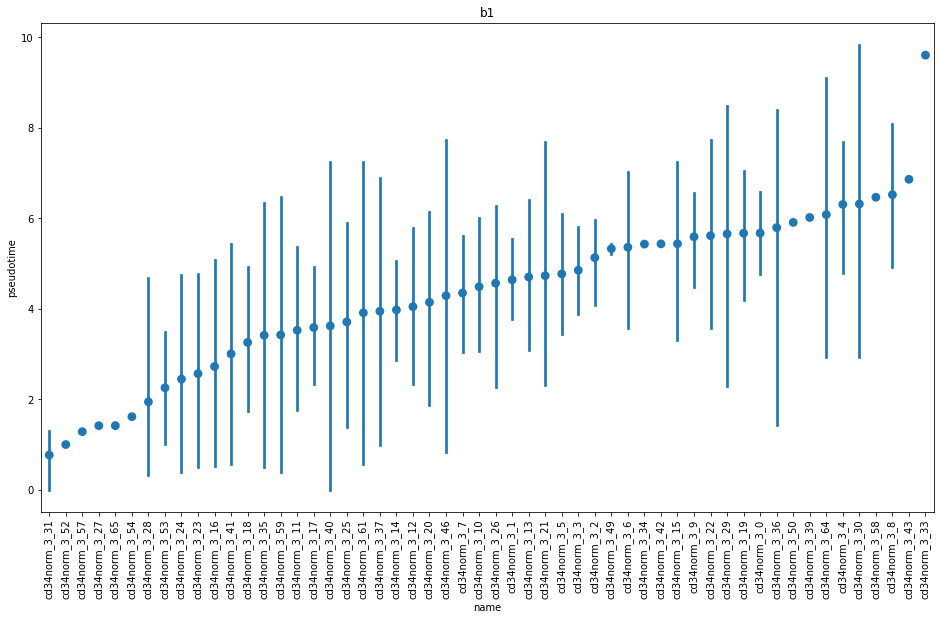

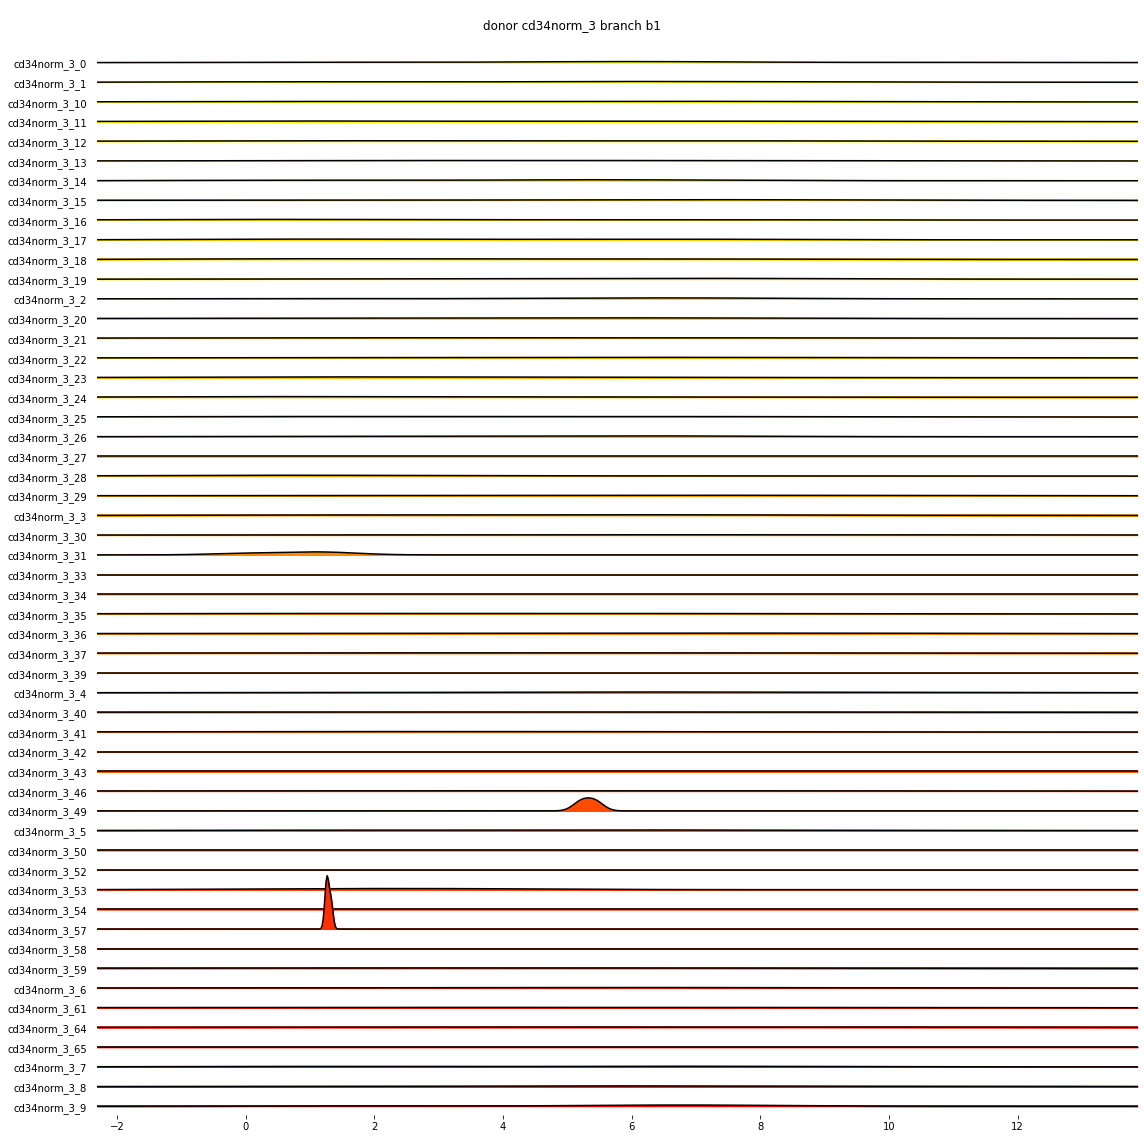

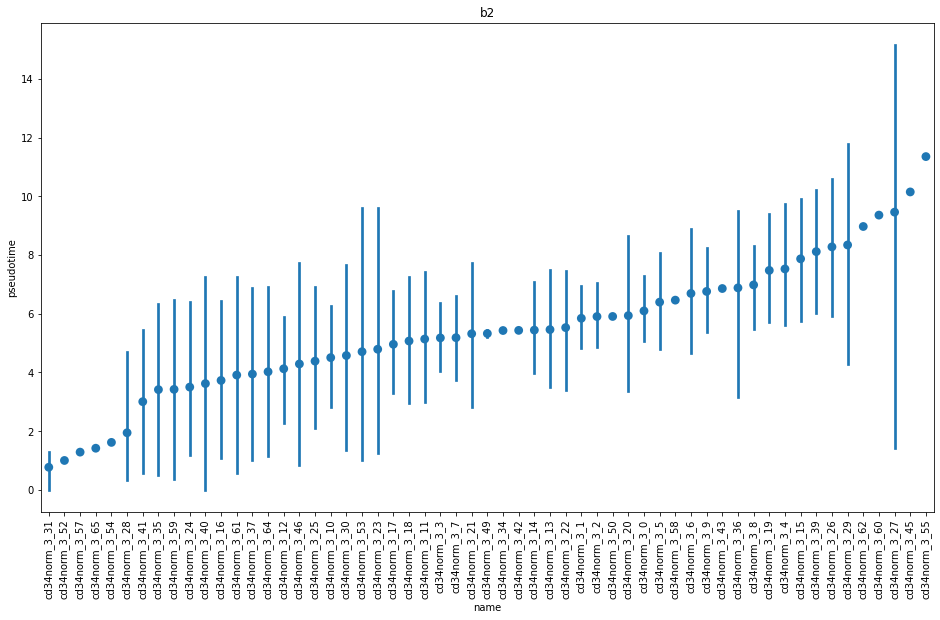

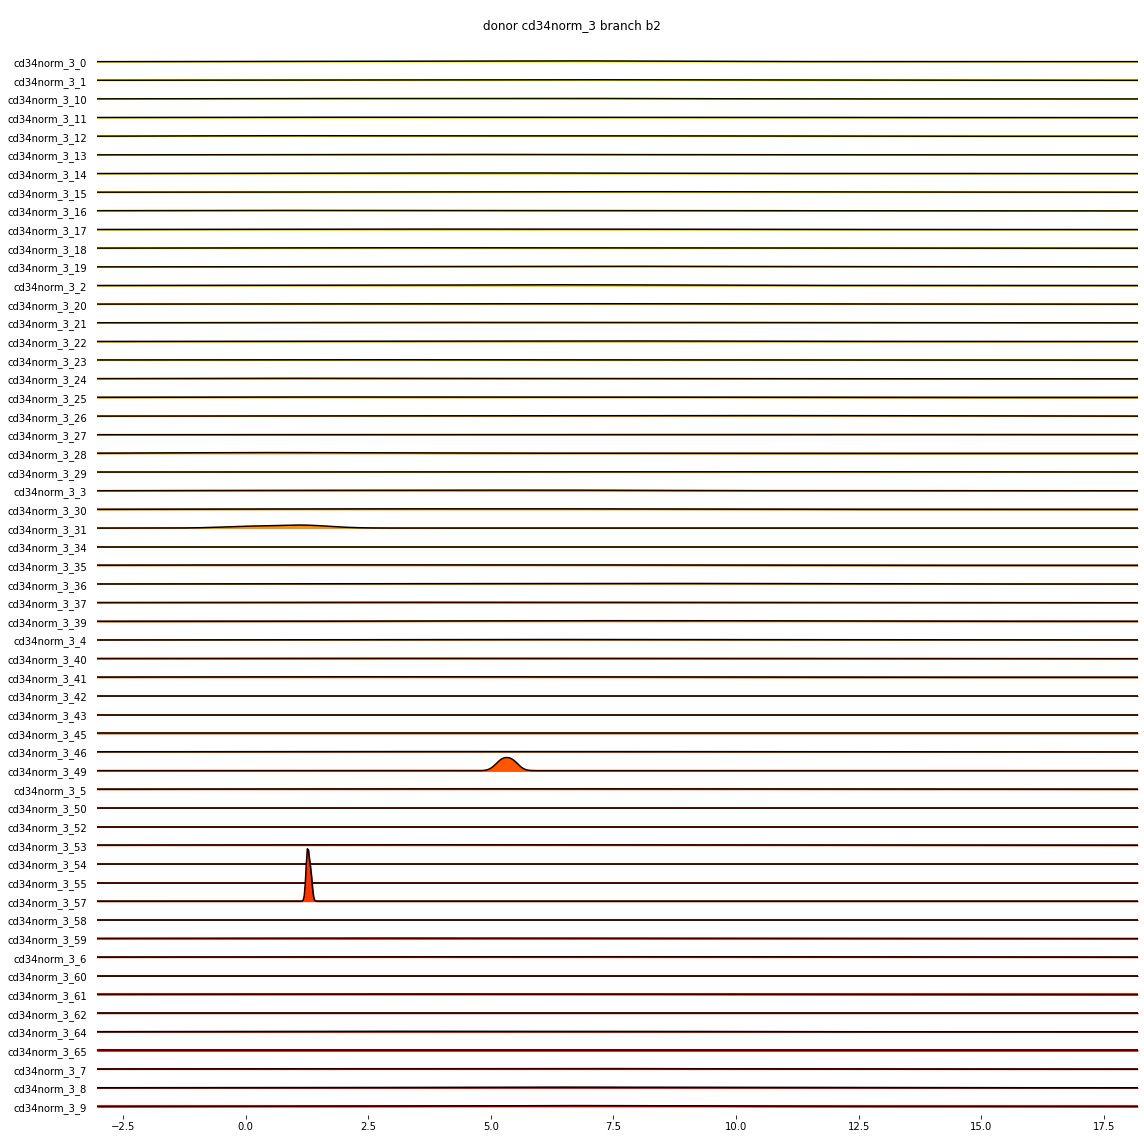

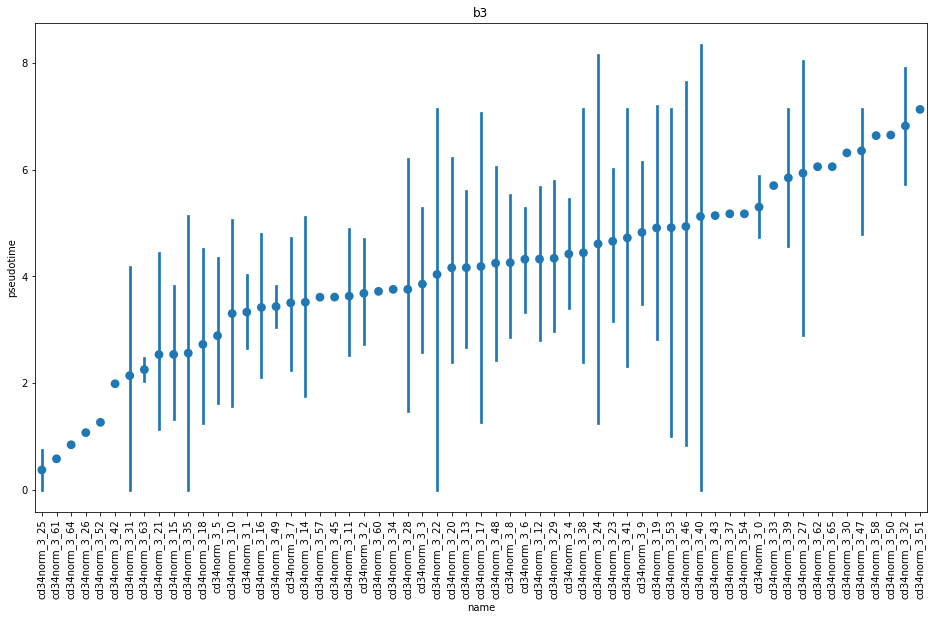

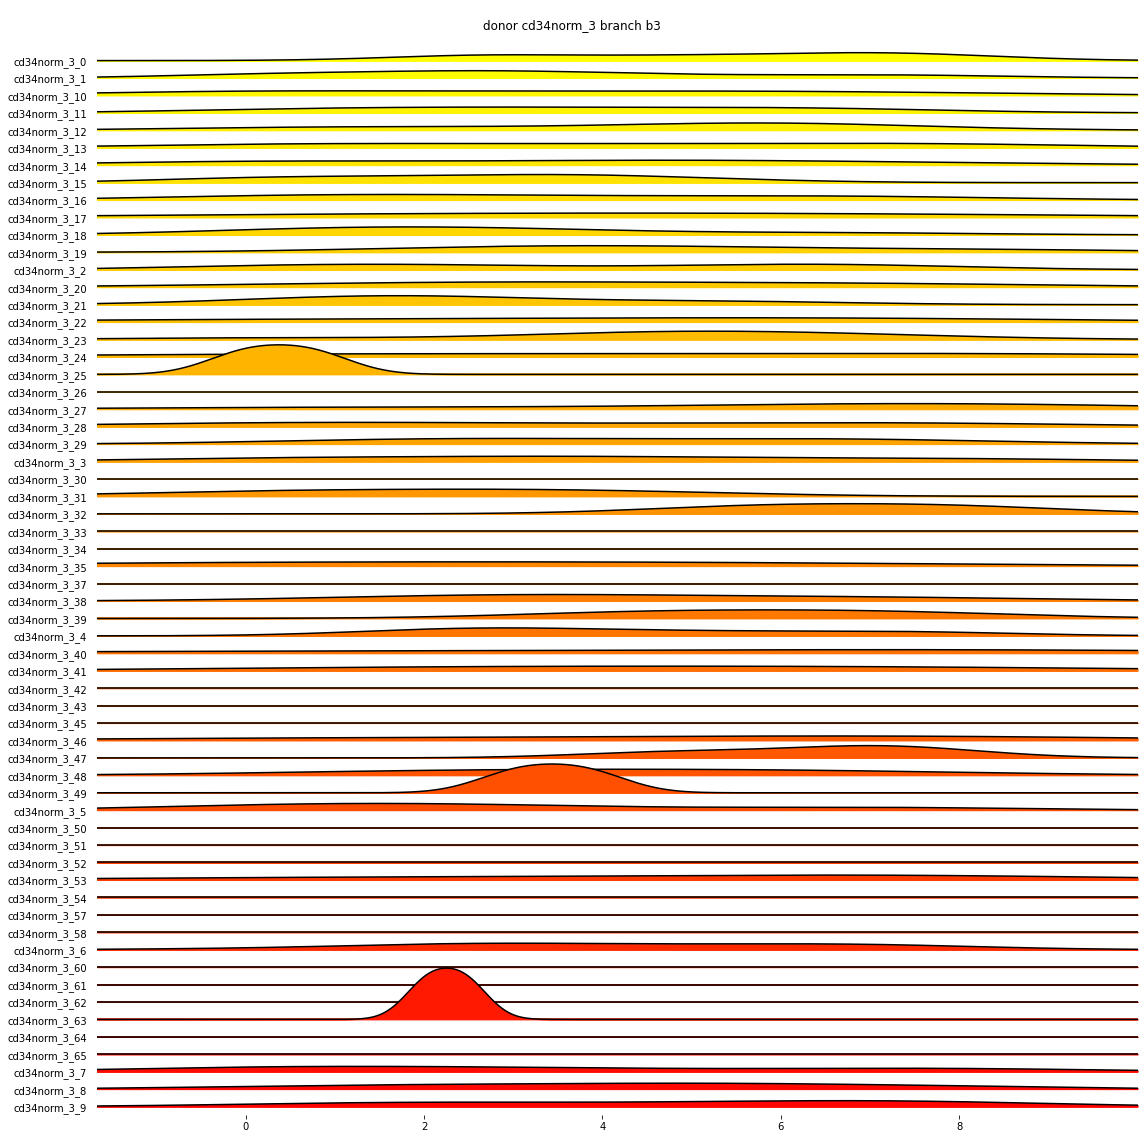

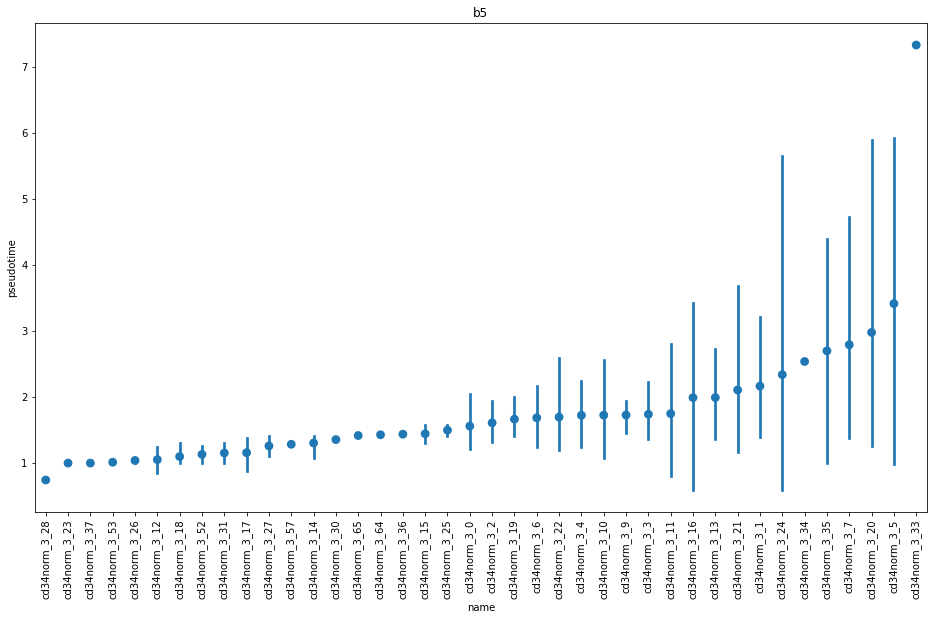

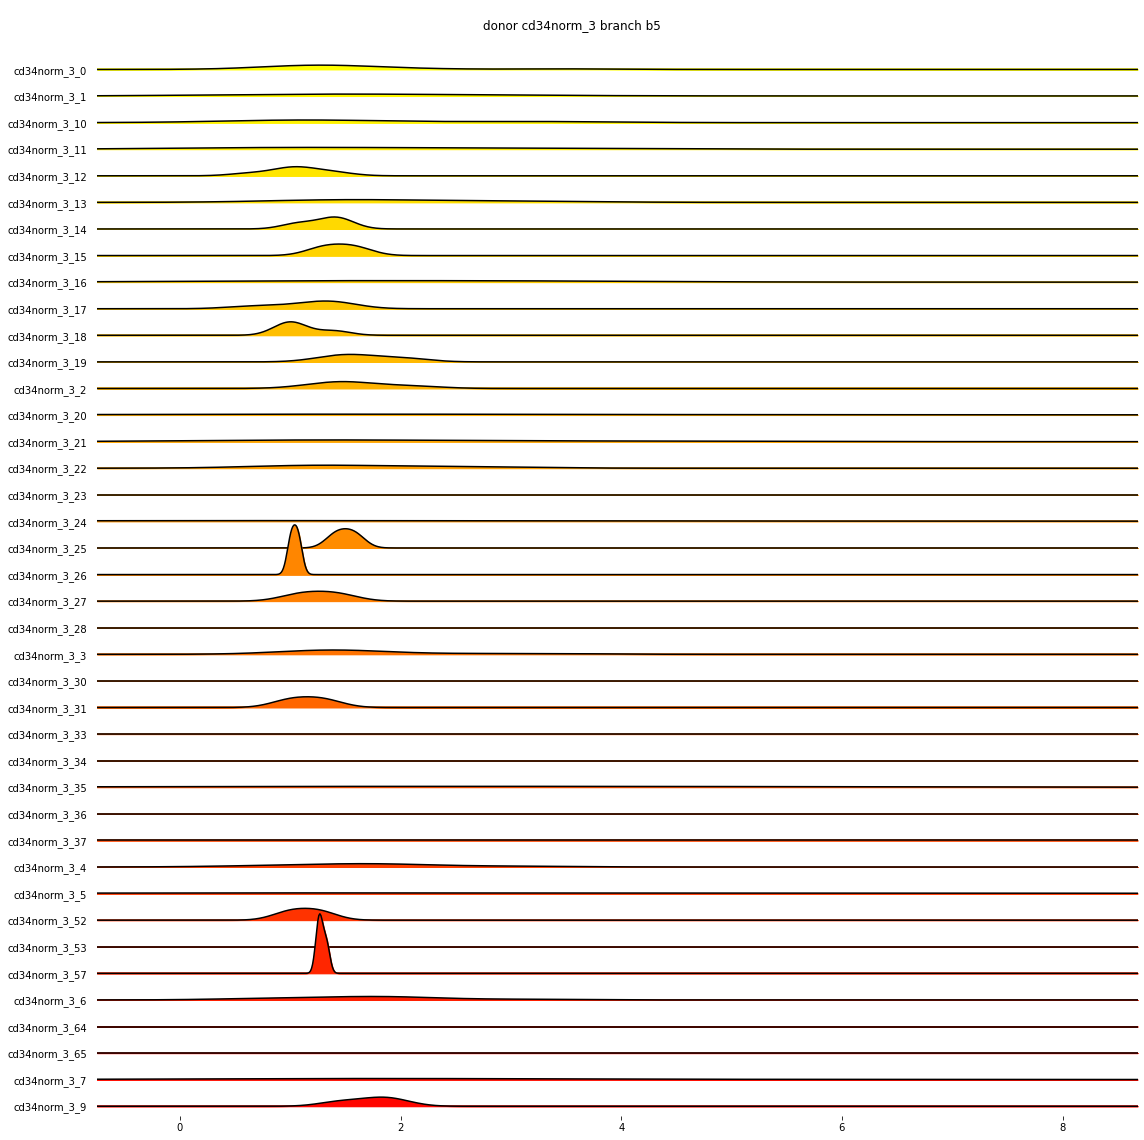

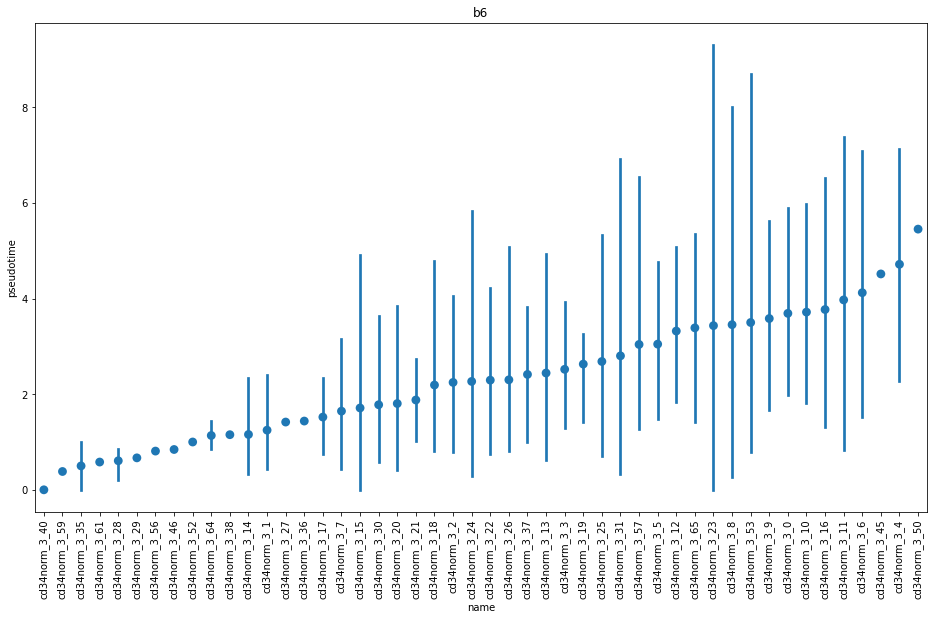

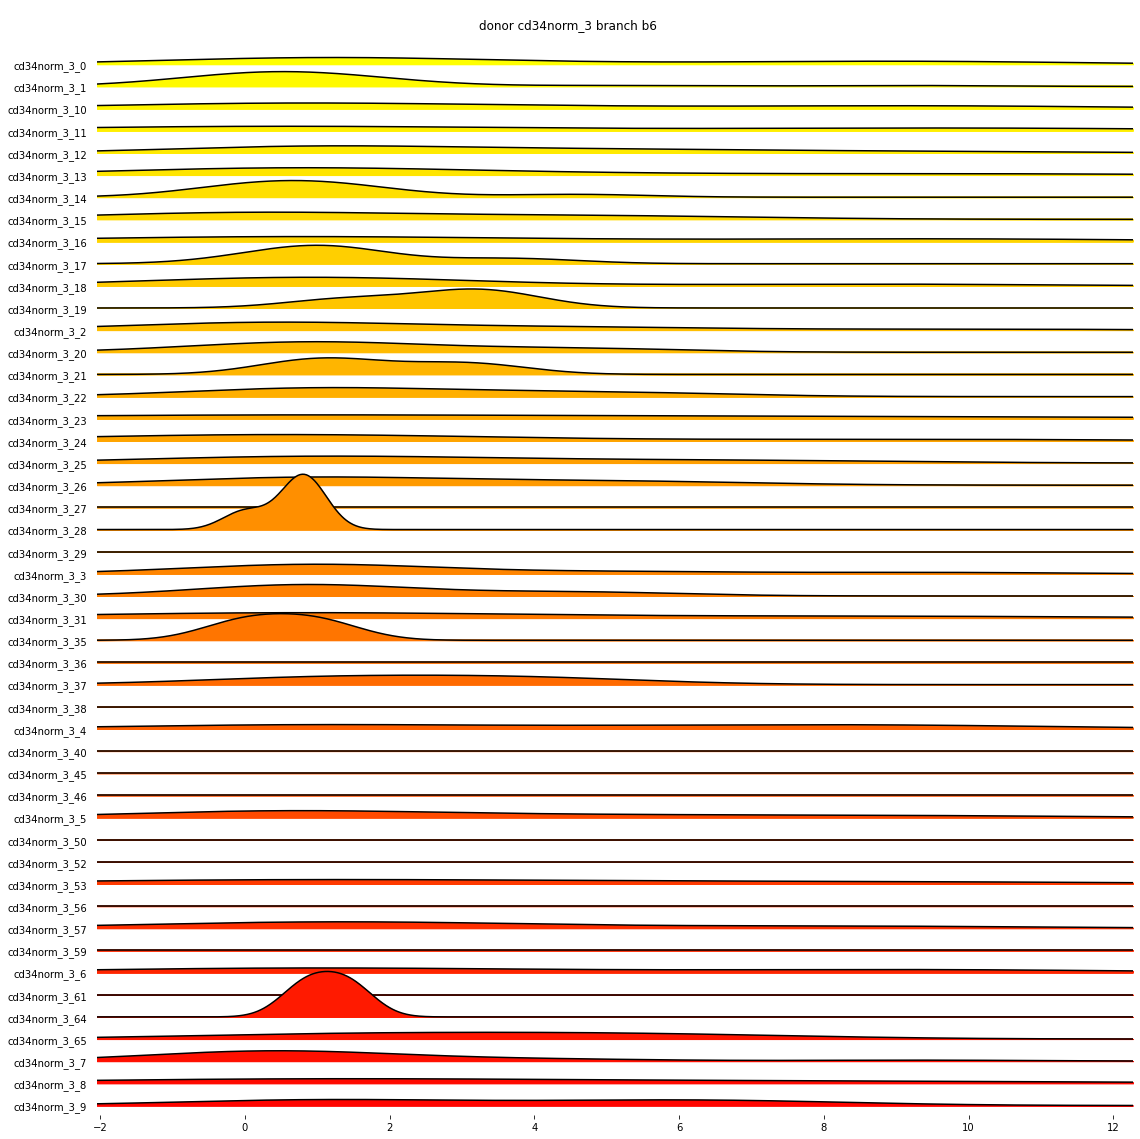

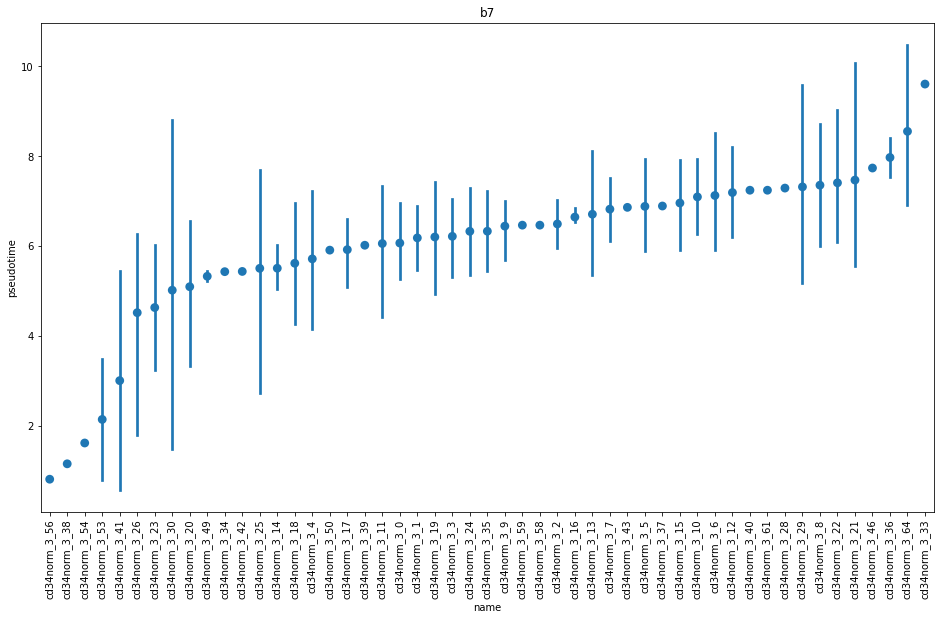

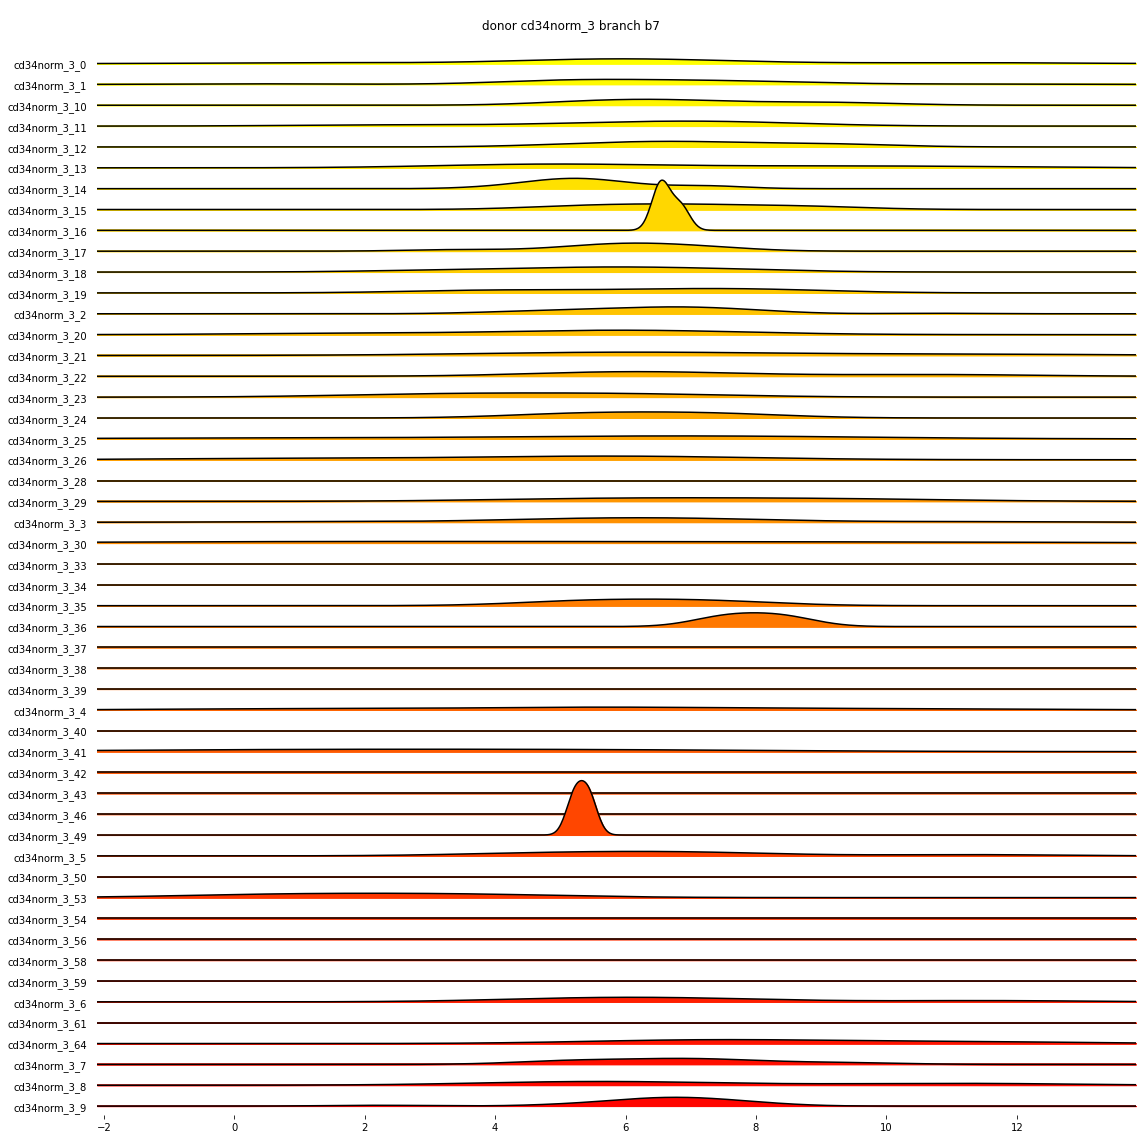

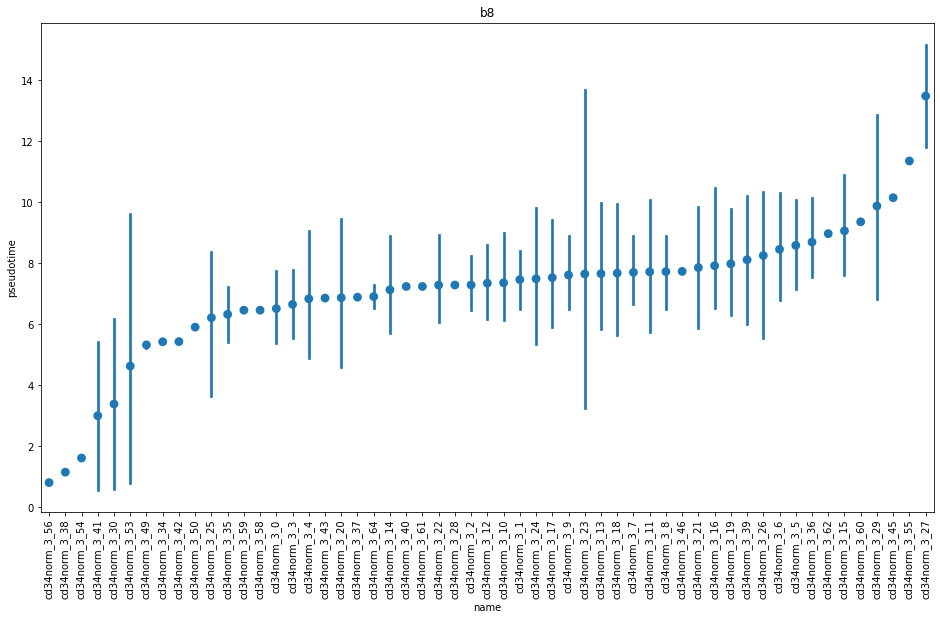

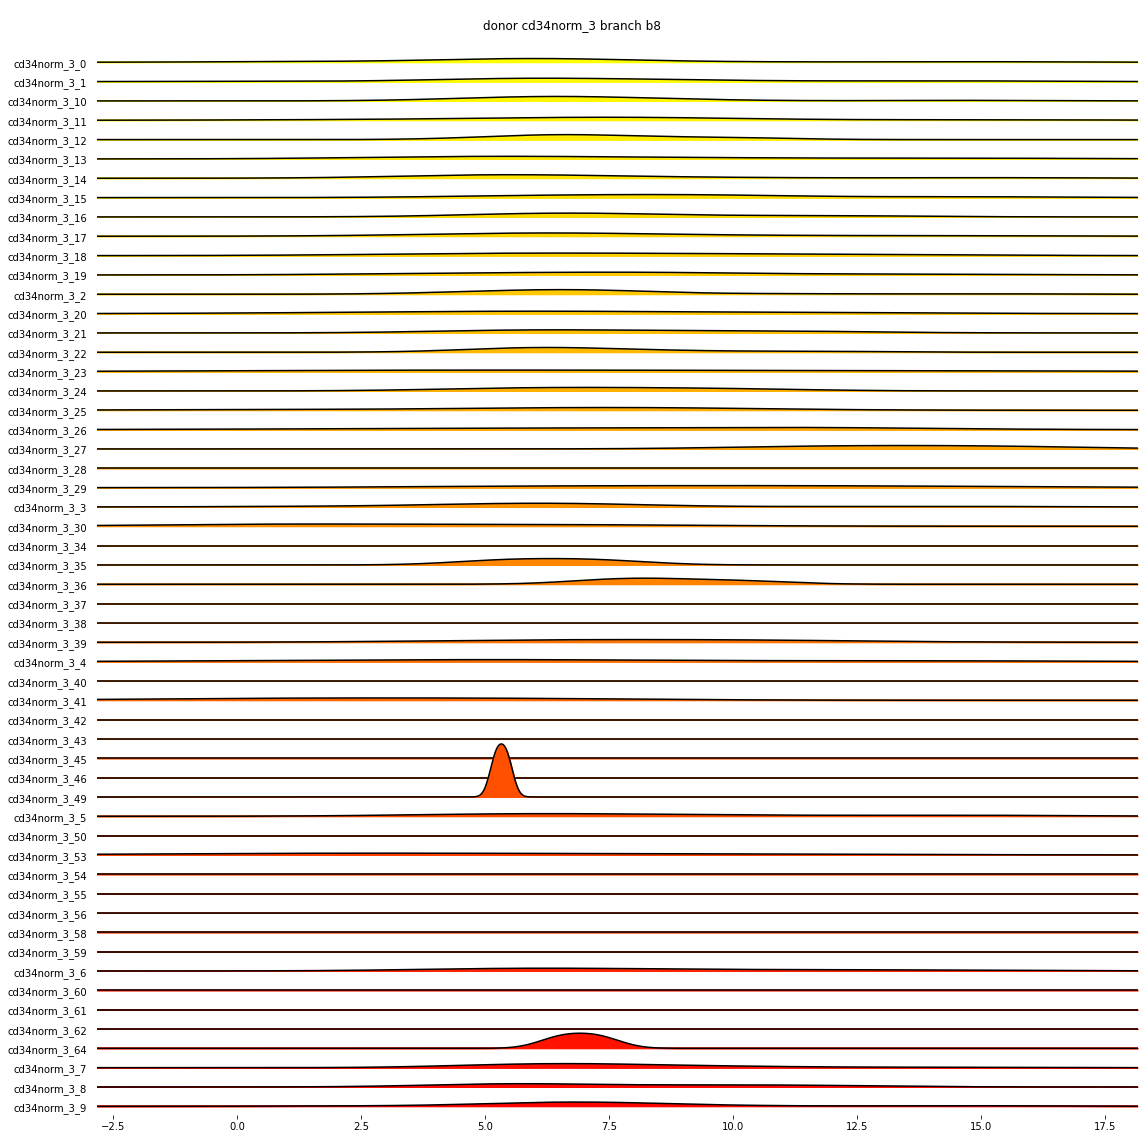

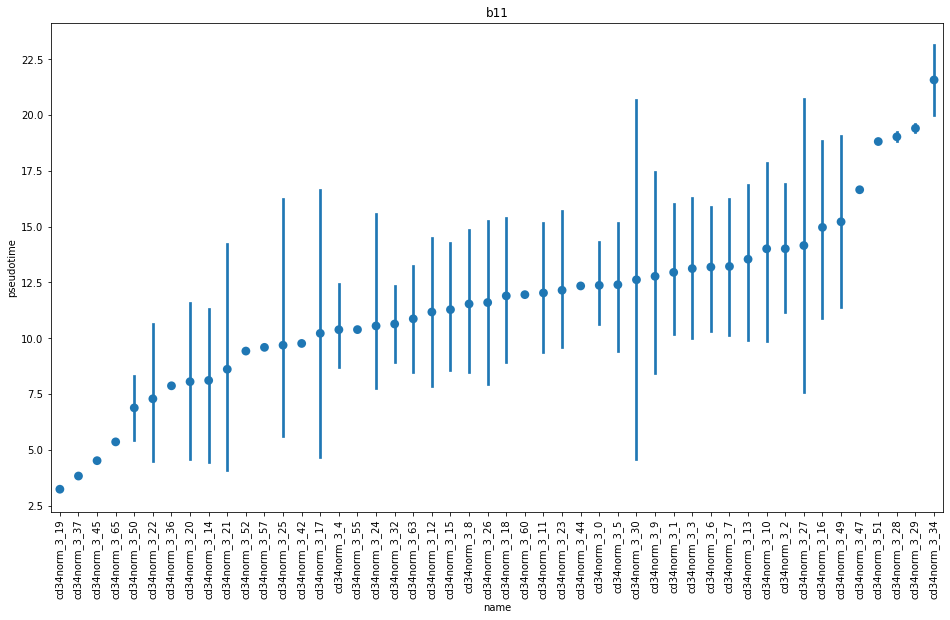

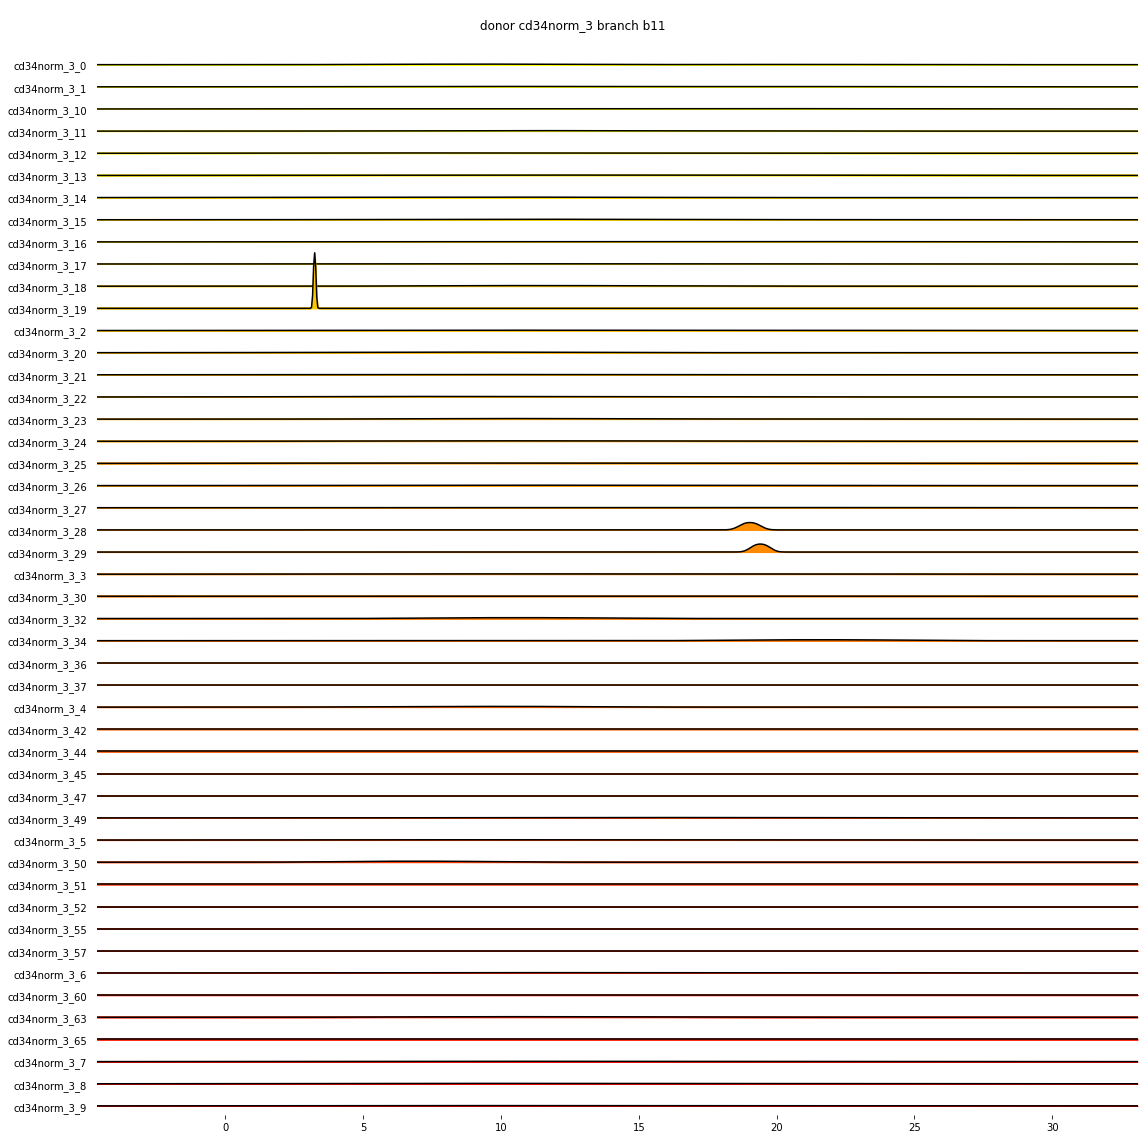

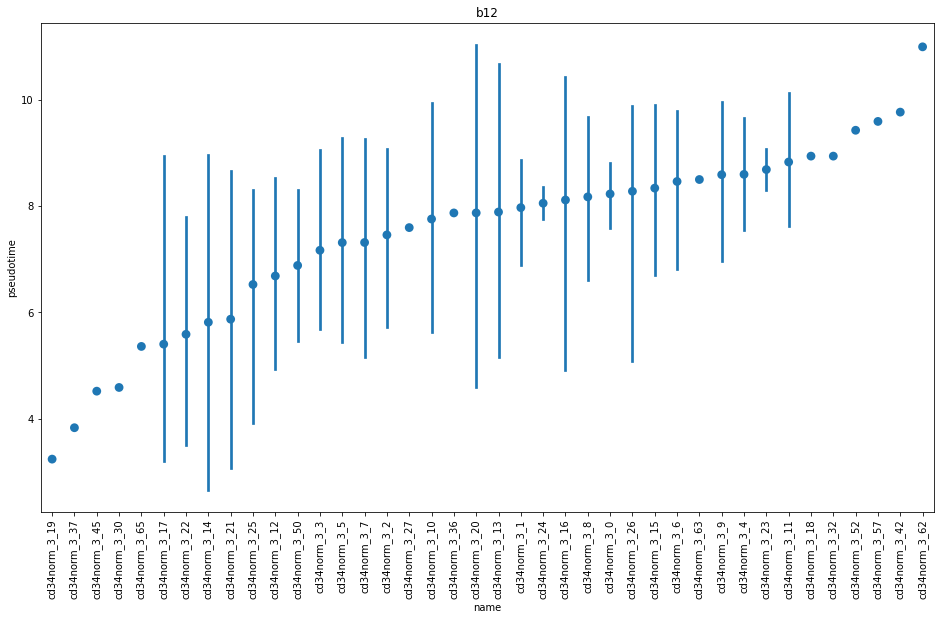

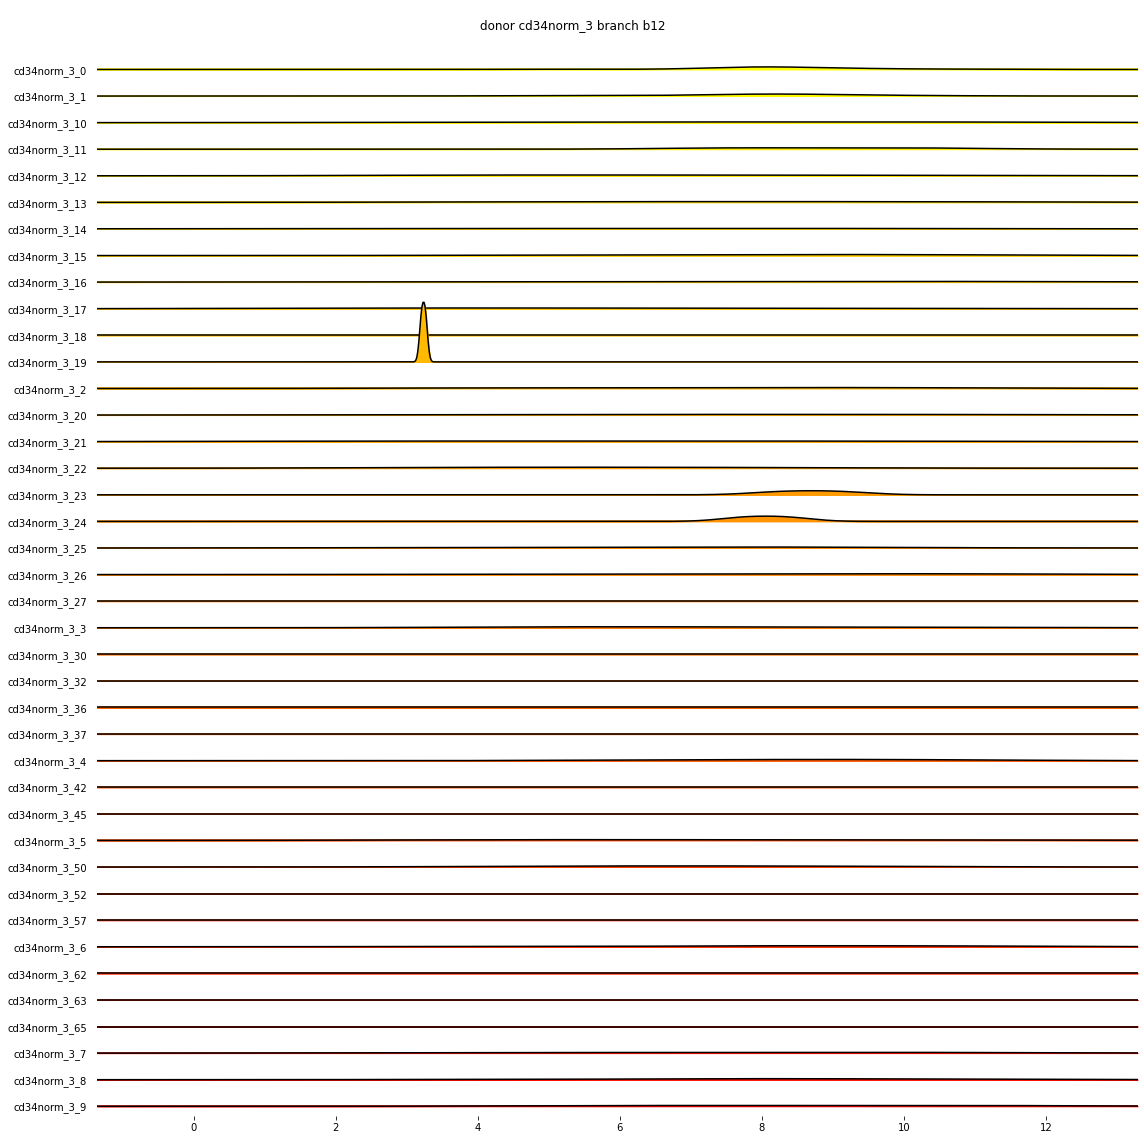

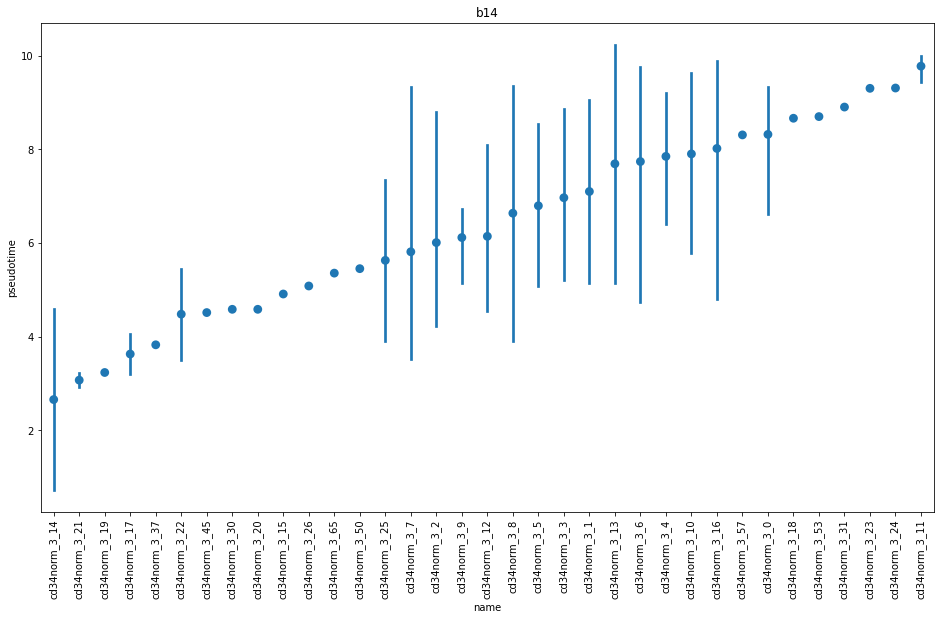

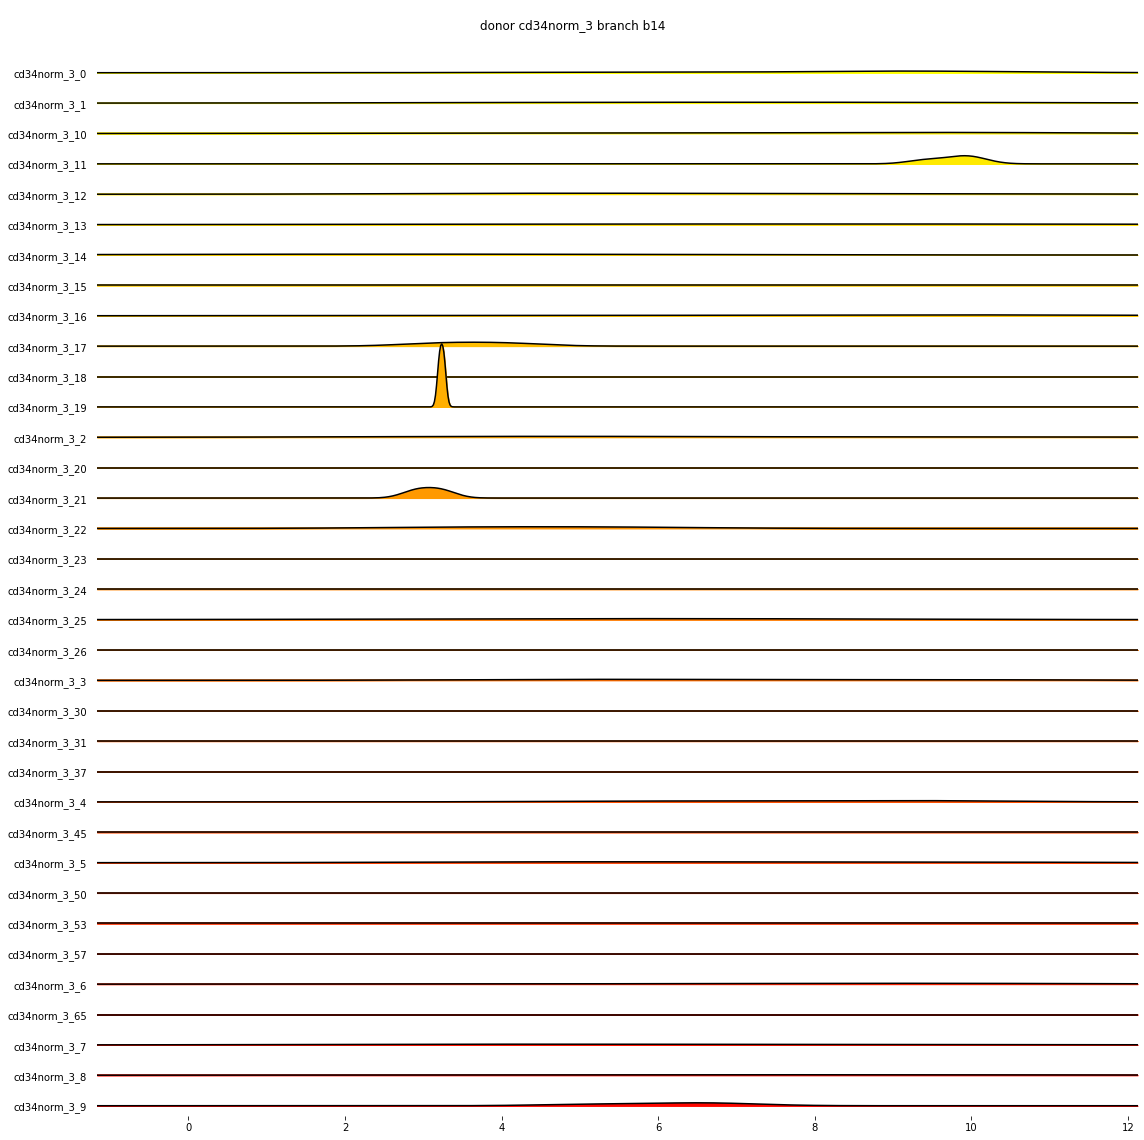

In [7]:
cells_meta = cells_meta.loc[cells_meta["donor"] !="None"]
for don, val in cells_meta.groupby("donor"):
    ## Normalize each clone to each branch
    cl_branches = val.groupby("name").sum()[branches]

    cl_branches_norm = (cl_branches.transpose()/cl_branches.sum(axis=1)).transpose()
    cl_branches_norm = cl_branches_norm.loc[cl_branches_norm.apply(entropy, axis=1).sort_values(ascending=True).index] 
    f, ax = plt.subplots(figsize=(16,9))
    cl_branches_norm.plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, f"{don}.clone_branches_norm.pdf"))
    
    f, ax = plt.subplots(figsize=(16,9))
    #np.log2(1+cl_branches).plot.bar(ax=ax)
    cl_branches.loc[cl_branches_norm.index].plot.bar(stacked=True, ax=ax)
    plt.yscale('log', base=2)
    plt.savefig(join(outdir, f"{don}.clone_branches.pdf"))
    
    for b in branches:
        curr_b = val[val[b]==True]
        f, ax = plt.subplots(figsize=(16,9))
        order = curr_b.groupby("name").mean()["pseudotime"].sort_values().index
        sns.pointplot(data=curr_b, x="name", y = "pseudotime", order=order, join=False)
        plt.xticks(rotation=90);
        plt.title(b)
        plt.savefig(join(outdir, f"{don}.branch.{b}.pseudotime.pdf"))
        
        fig, axes = joypy.joyplot(curr_b, column="pseudotime", by="name", 
                                  figsize=(16,16), colormap=cm.autumn_r) #, ylim='own')
        fig.suptitle(f"donor {don} branch {b}")

        plt.savefig(join(outdir, f"{don}.branch.{b}.pseudotime_distribution.pdf"))